# データセットの作成

## Settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math
from pprint import pprint
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'

In [2]:
# JCT token setting
jct_tokenId = '0x4a43540000000000000000000000000000000000000000000000000000000000'
jct_price = 1.0e+5

In [160]:
# Relative path to save data
from pathlib import Path

data_dir = Path('../data/data20230109')
data_dir.mkdir(parents=True, exist_ok=True)
data_relative_path = '../data/data20230109/'

## Sample csv format

In [4]:
sample_create_token_df = pd.read_csv('../data/sample/csv/createToken_decode.csv')
sample_create_token_df

,tokenId,tokenName,price,tokenTypeId,updateTime
0,0x20221110132152000000000000000000000000000000...,ST00001,10000000,0x30783030303031000000000000000000000000000000...,1668054112
1,0x20221110132152000000000000000000000000000000...,ST00002,10000000,0x30783030303031000000000000000000000000000000...,1668054112
2,0x20221110132152000000000000000000000000000000...,ST00003,10000000,0x30783030303031000000000000000000000000000000...,1668054112
3,0x20221110132152000000000000000000000000000000...,ST00004,10000000,0x30783030303031000000000000000000000000000000...,1668054112
4,0x20221110132152000000000000000000000000000000...,ST00005,10000000,0x30783030303031000000000000000000000000000000...,1668054112
...,...,...,...,...,...
351,0x20221110132152000000000000000000000000000000...,ST00352,10000000,0x30783030303031000000000000000000000000000000...,1668054112
352,0x20221110132152000000000000000000000000000000...,ST00353,10000000,0x30783030303031000000000000000000000000000000...,1668054112
353,0x20221110132152000000000000000000000000000000...,ST00354,10000000,0x30783030303031000000000000000000000000000000...,1668054112
354,0x20221110132152000000000000000000000000000000...,ST00355,10000000,0x30783030303031000000000000000000000000000000...,1668054112


In [5]:
sample_create_trading_df = pd.read_csv('../data/sample/csv/createTrading_decode.csv')
sample_create_trading_df

,tradingId,lender,borrowerTokenIds,lenderTokenIds,borrowerTokenAmounts,lenderTokenAmounts,startTime,finishTime,rate,adjustmentToken
0,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
1,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
2,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
3,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
4,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
...,...,...,...,...,...,...,...,...,...,...
8662,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
8663,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
8664,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
8665,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...


In [6]:
sample_update_token_df = pd.read_csv('../data/sample/csv/updateToken_decode.csv')
sample_update_token_df

,tokenId,price,updateTime
0,0x20221110132152000000000000000000000000000000...,9000000,1668054263
1,0x20221110132152000000000000000000000000000000...,9000000,1668054263
2,0x20221110132152000000000000000000000000000000...,9000000,1668054263
3,0x20221110132152000000000000000000000000000000...,9000000,1668054263
4,0x20221110132152000000000000000000000000000000...,9000000,1668054263
...,...,...,...
351,0x20221110132152000000000000000000000000000000...,9000000,1668054263
352,0x20221110132152000000000000000000000000000000...,9000000,1668054263
353,0x20221110132152000000000000000000000000000000...,9000000,1668054263
354,0x20221110132152000000000000000000000000000000...,9000000,1668054263


## Mock data distributions

### Number of Trade

In [8]:
ave_gc_trade_num = 438
ave_sc_trade_num = 2833
ave_bond_trade_num = 8667

stock_trade_term_list = [1, 5, 19, 60, 180, 2]
bond_trade_term_list = [1, 5, 19, 60, 180]
stock_trade_term_percent_list = [0.24, 0.38, 0.07, 0.02, 0.05, 0.24]
bond_trade_term_percent_list = [0.37, 0.15, 0.29, 0.16, 0.04]

max_gc_trade_num = math.ceil(np.dot(np.array(stock_trade_term_list), np.array(stock_trade_term_percent_list)) * ave_gc_trade_num)
max_sc_trade_num = math.ceil(np.dot(np.array(stock_trade_term_list), np.array(stock_trade_term_percent_list)) * ave_sc_trade_num)
max_bond_trade_num = math.ceil(np.dot(np.array(bond_trade_term_list), np.array(bond_trade_term_percent_list)) * ave_bond_trade_num)
print('max gc num: ', max_gc_trade_num)
print('max sc num: ', max_sc_trade_num)
print('max bond num: ', max_bond_trade_num)

max gc num:  6198
max sc num:  40087
max bond num:  203068


In [26]:
np.array([1758, 5020]) * 0.075

array([131.85, 376.5 ])

In [74]:
a_trade_num = 8667 + 3271

b_trade_nums = {
    '100%': {
        'gc': 6198,
        'sc': 40087,
        'bond': 203068,
    },
    '150%': {
        'gc': 9297,
        'sc': 60131,
        'bond': 304602,
    },
    '50%': {
        'gc': 3099,
        'sc': 20044,
        'bond': 101534,
    },
    '30%': {
        'gc': 1860,
        'sc': 12027,
        'bond': 60921,
    },
    '25%': {
        'gc': 1550,
        'sc': 10022,
        'bond': 50767,
    },
    '15%': {
        'gc': 928,
        'sc': 6014,
        'bond': 30461,
    },
    '7.5%': {
        'gc': 465,
        'sc': 3007,
        'bond': 15231,
    },
}

b_security_nums = {
    '100%': {
        'stock': 1758,
        'bond': 5020,
    },
    '150%': {
        'stock': 2637,
        'bond': 7530,
    },
    '50%': {
        'stock': 879,
        'bond': 2510,
    },
    '30%': {
        'stock': 528,
        'bond': 1506,
    },
    '25%': {
        'stock': 440,
        'bond': 1255,
    },
    '15%': {
        'stock': 264,
        'bond': 753,
    },
    '7.5%': {
        'stock': 132,
        'bond': 377,
    },
}

In [28]:
for key, value in b_security_nums.items():
    print(key, value)

100% {'stock': 1758, 'bond': 5020}
150% {'stock': 2637, 'bond': 7530}
50% {'stock': 879, 'bond': 2510}
30% {'stock': 528, 'bond': 1506}
25% {'stock': 440, 'bond': 1255}
15% {'stock': 264, 'bond': 753}
7.5% {'stock': 132, 'bond': 377}


### Price

In [77]:
# price_df を格納するobjの初期化
all_price_dfs = {
    '100%': {},
    '150%': {},
    '50%': {},
    '30%': {},
    '25%': {},
    '15%': {},
    '7.5%': {},
}

#### 株レポGC取引

株レポGC取引: 
             10億円以内         10億円超        100億円超        500億円超
ratio  1.500000e-01  6.000000e-01  2.000000e-01  5.000000e-02
min    1.000000e+08  1.000000e+09  1.000000e+10  5.000000e+10
max    1.000000e+09  1.000000e+10  5.000000e+10  1.000000e+11


<AxesSubplot:title={'center':'株レポGC取引: 概観'}>

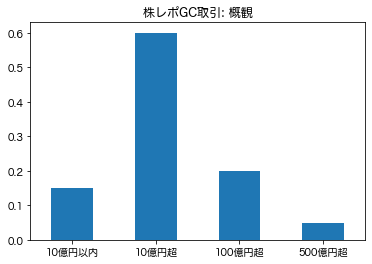

In [29]:
gc_price_column_labels = ['10億円以内', '10億円超', '100億円超', '500億円超']
gc_price_dist = pd.DataFrame([[0.15, 0.6, 0.2, 0.05], [1.0e+8, 1.0e+9, 1.0e+10, 5.0e+10], [1.0e+9, 1.0e+10, 5.0e+10, 1.0e+11]],
                             columns=gc_price_column_labels,
                             index=['ratio', 'min', 'max'])
gc_price_ave = 81.5e+8
print('株レポGC取引: ')
pprint(gc_price_dist)
print('='*50)

plt.title('株レポGC取引: 概観')
gc_price_dist.T['ratio'].plot(kind='bar', rot=0)

Text(0.5, 1.0, '株レポGC取引: ヒストグラム')

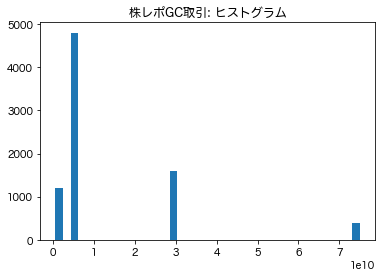

In [279]:
gc_trade_num = 8000
gc_ave_price_list = (gc_price_dist.T['min'] + gc_price_dist.T['max']) / 2
gc_sample = [[ave]*int(gc_price_dist.T['ratio'][index] * gc_trade_num)  for (index, ave) in enumerate(gc_ave_price_list)]

plt.hist(list(itertools.chain.from_iterable(gc_sample)), bins=40)
plt.title('株レポGC取引: ヒストグラム')

In [30]:
def get_gc_price_df(trade_num):
    gc_price_max = gc_price_dist['500億円超']['max']
    gc_price_min = gc_price_dist['10億円以内']['min']
    mock_gc_price_df = pd.DataFrame(np.random.triangular(gc_price_min, gc_price_ave, gc_price_max, trade_num)) * 1.0e+5
    mock_gc_price_df.hist(bins=100, figsize=(30, 20), xlabelsize=20, ylabelsize=20)
    plt.title(f'株レポGC取引: 擬似データ分布（三角分布, {trade_num}件）', fontsize=24)
    return mock_gc_price_df

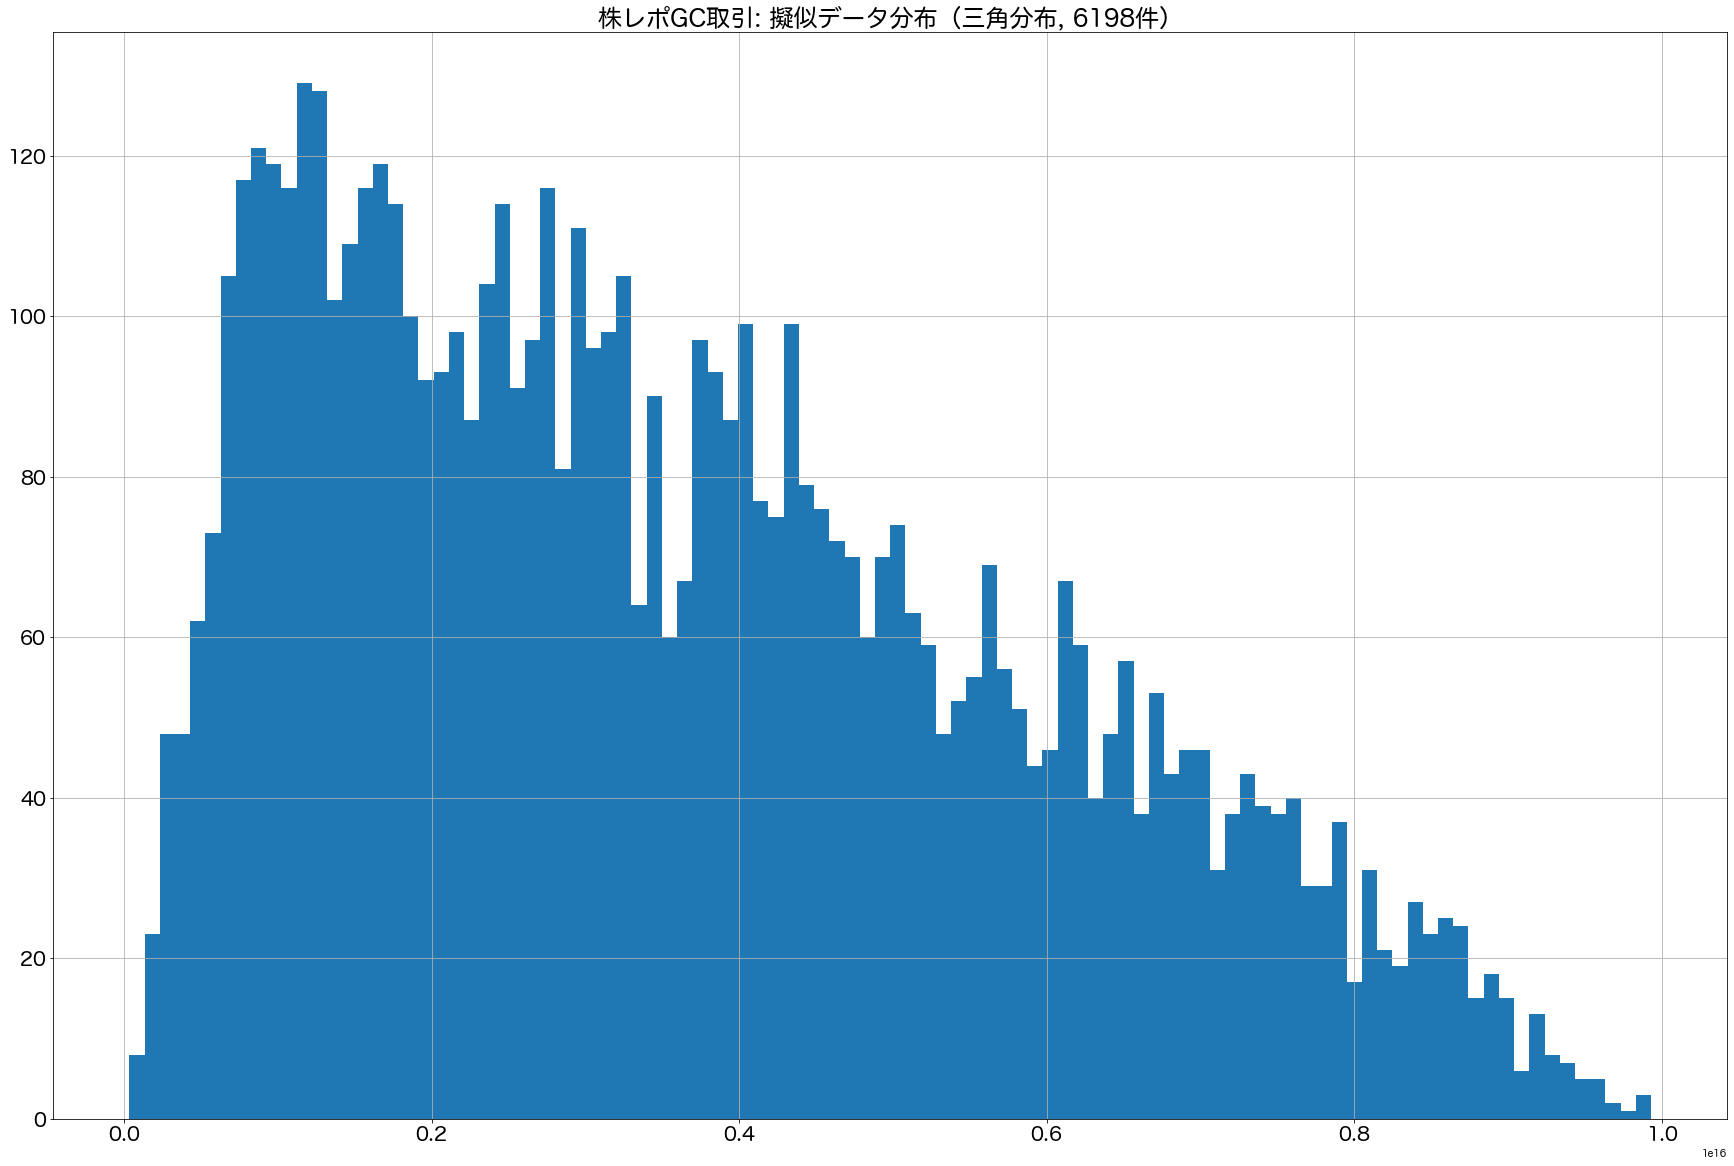

In [33]:
# 三角分布で類似分布を作成
# gc_price_max = gc_price_dist['500億円超']['max']
# gc_price_min = gc_price_dist['10億円以内']['min']
# mock_gc_price_df = pd.DataFrame(np.random.triangular(gc_price_min, gc_price_ave, gc_price_max, gc_trade_num)) * 1.0e+5
# mock_gc_price_df.hist(bins=100, figsize=(30, 20))
# plt.title('株レポGC取引: 擬似データ分布（三角分布）')
mock_gc_trade_8000_df = get_gc_price_df(b_trade_nums['100%']['gc'])

{'100%': {'gc':                  0
  0     4.772162e+15
  1     7.239525e+15
  2     3.441230e+15
  3     7.843045e+15
  4     3.022732e+15
  ...            ...
  6193  5.219749e+15
  6194  1.502039e+15
  6195  2.897166e+15
  6196  1.991822e+15
  6197  3.999879e+15
  
  [6198 rows x 1 columns]},
 '150%': {'gc':                  0
  0     4.974658e+15
  1     2.357697e+15
  2     2.472119e+15
  3     4.679377e+15
  4     3.060961e+15
  ...            ...
  9292  3.884095e+15
  9293  2.731210e+15
  9294  7.841276e+14
  9295  2.313380e+15
  9296  2.511538e+15
  
  [9297 rows x 1 columns]},
 '50%': {'gc':                  0
  0     4.755075e+15
  1     3.213118e+15
  2     1.200389e+15
  3     5.217886e+14
  4     4.769092e+15
  ...            ...
  3094  1.481646e+15
  3095  1.818938e+15
  3096  7.086821e+15
  3097  1.408404e+15
  3098  5.674650e+15
  
  [3099 rows x 1 columns]},
 '30%': {'gc':                  0
  0     1.561454e+15
  1     1.191199e+15
  2     1.925491e+15
  3     8.012

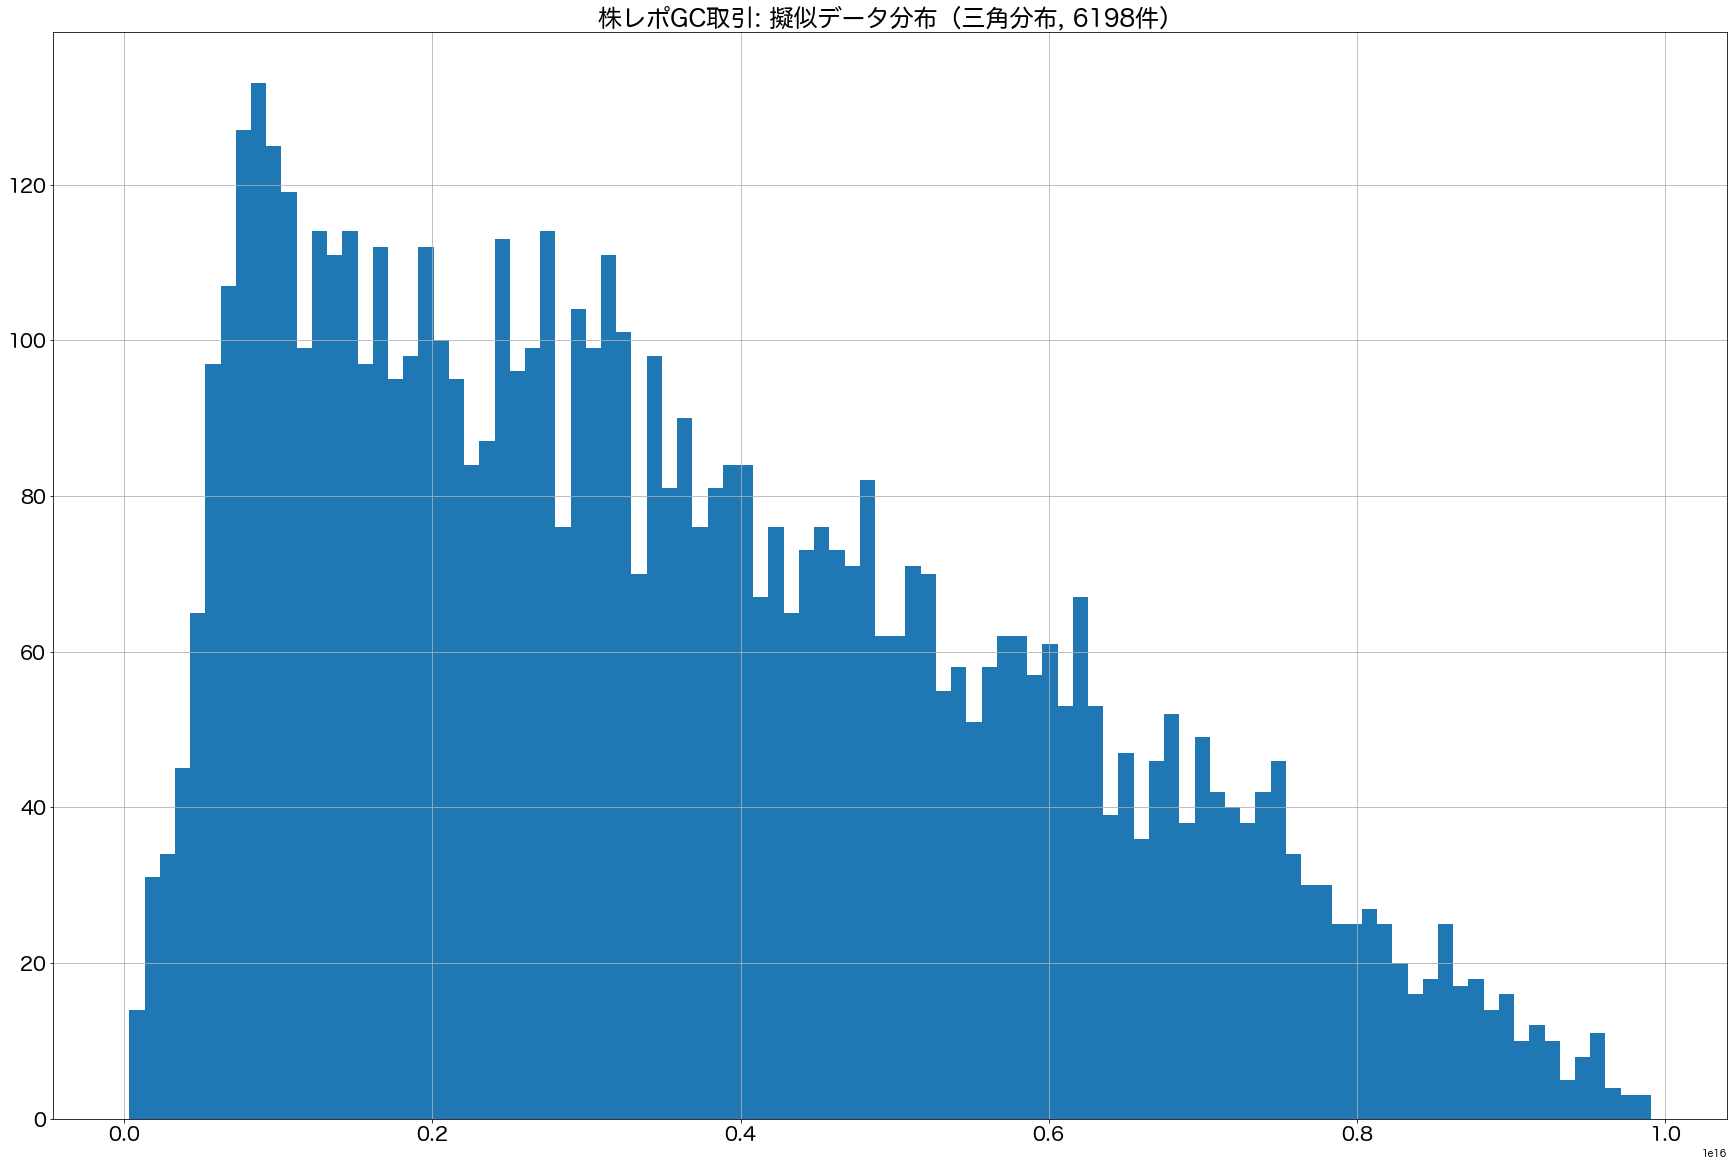

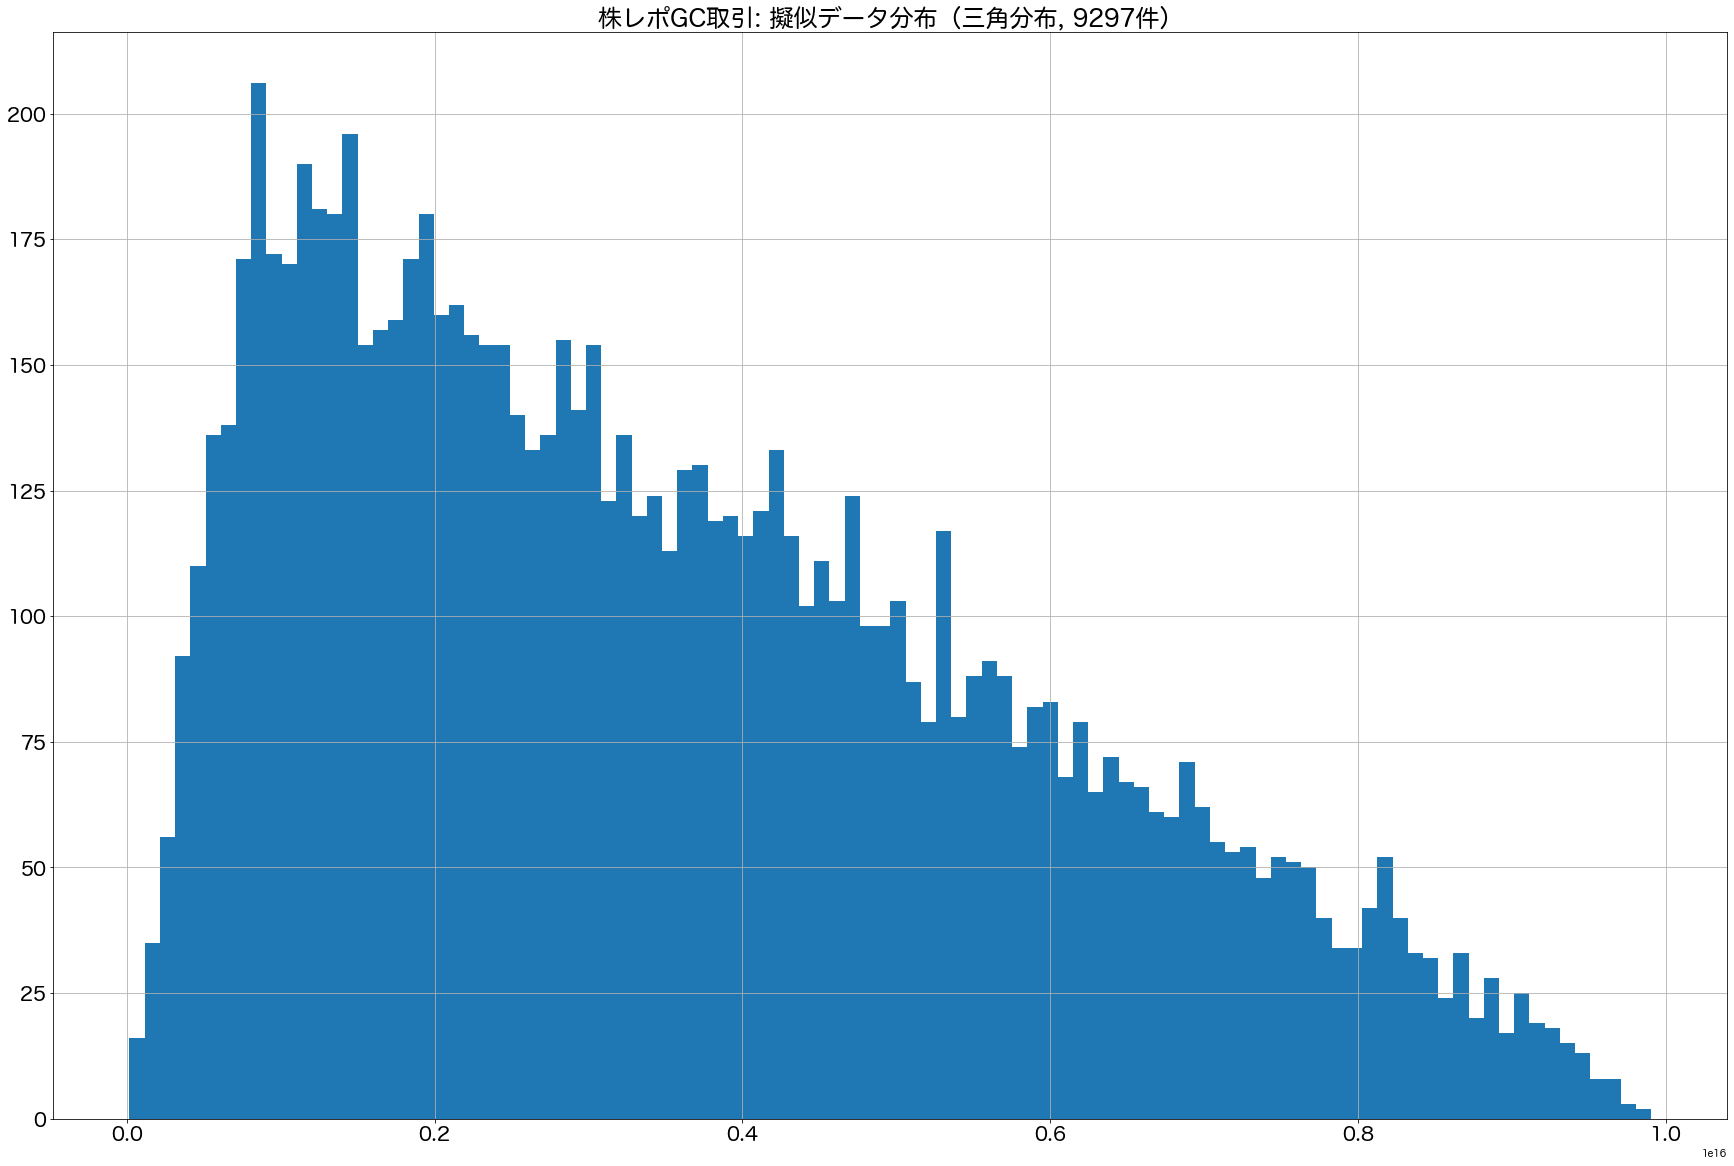

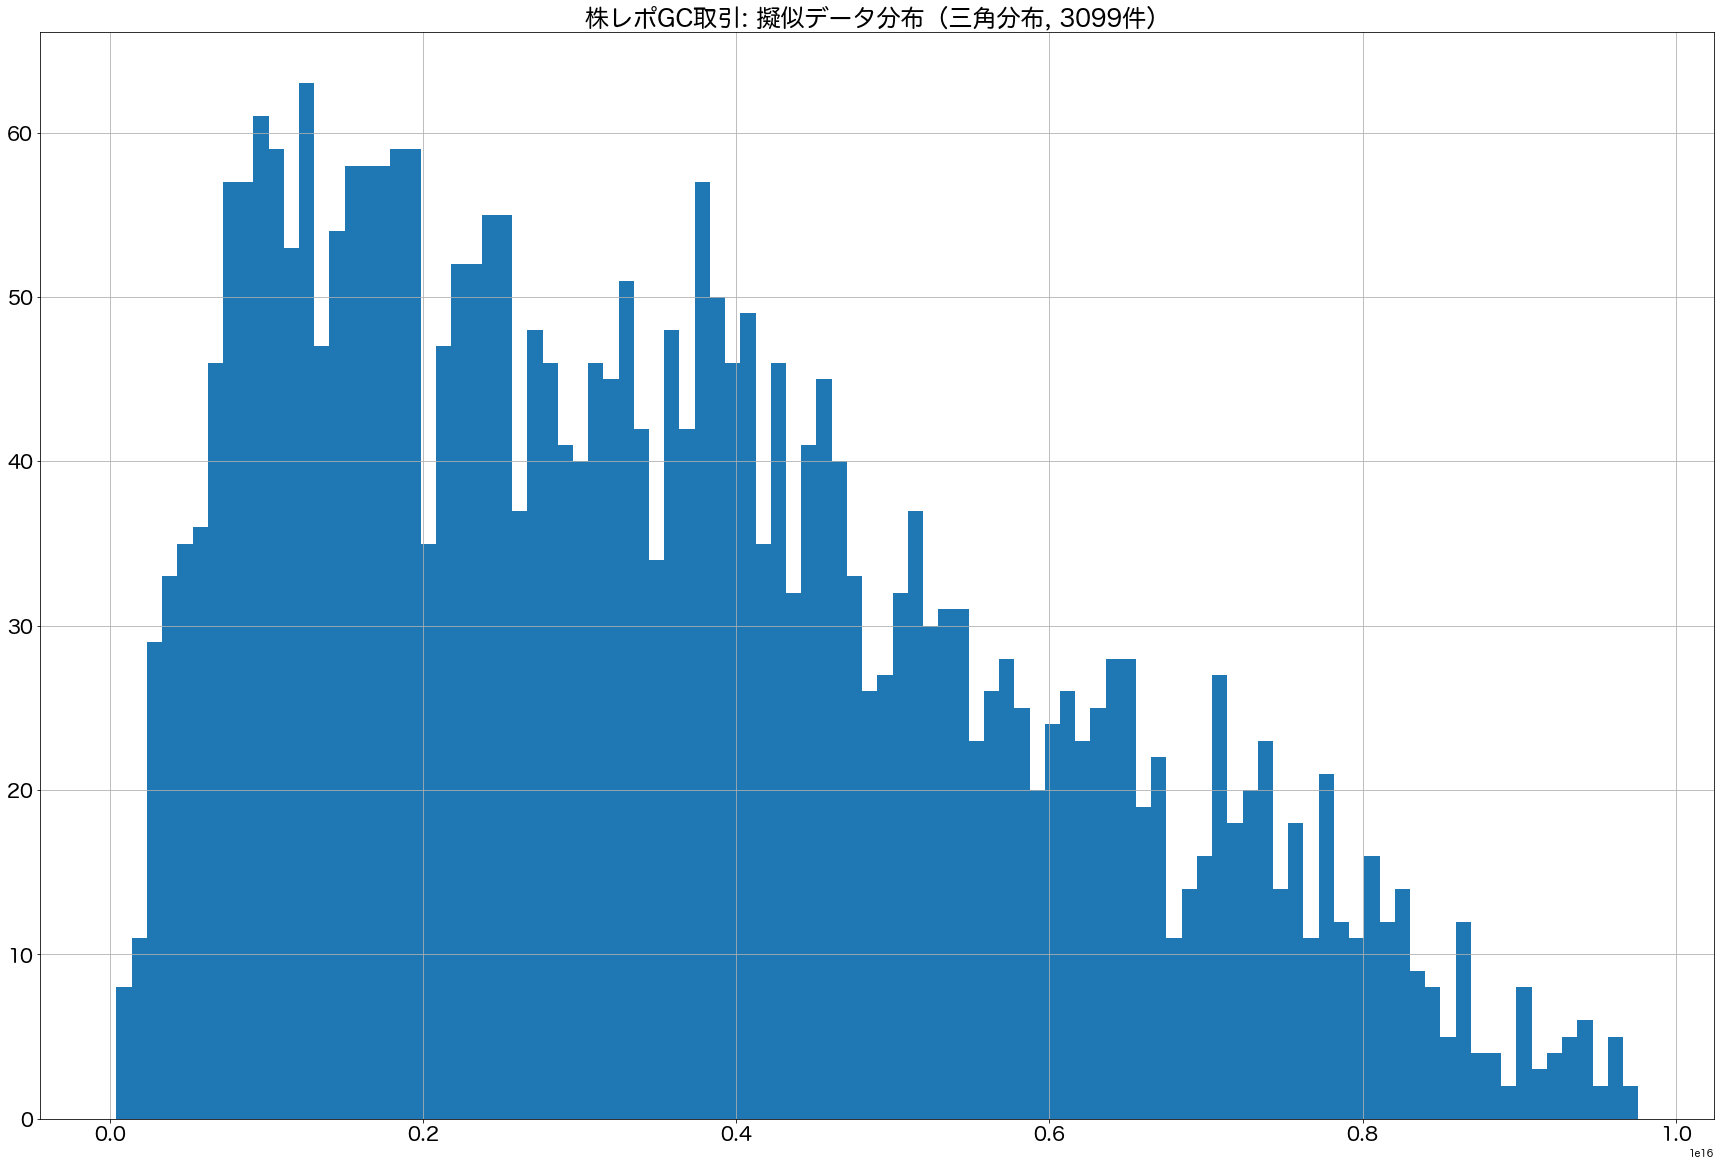

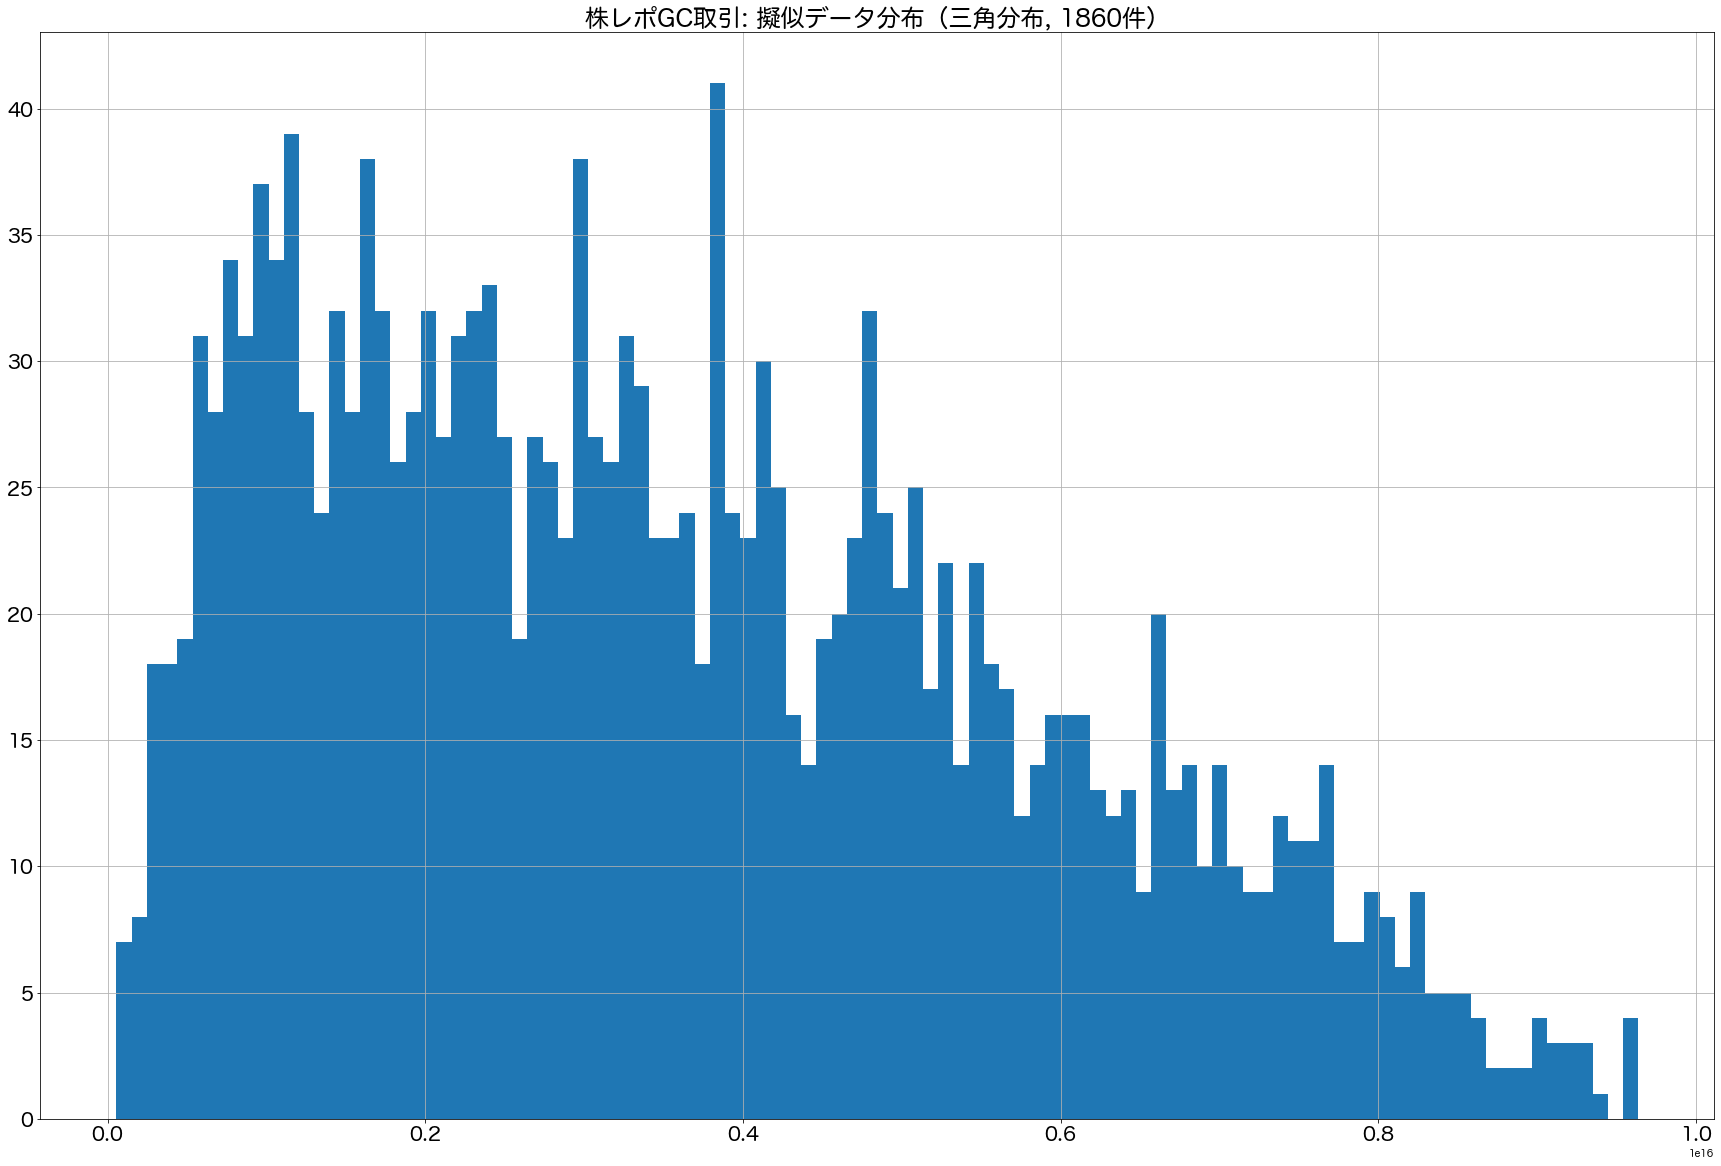

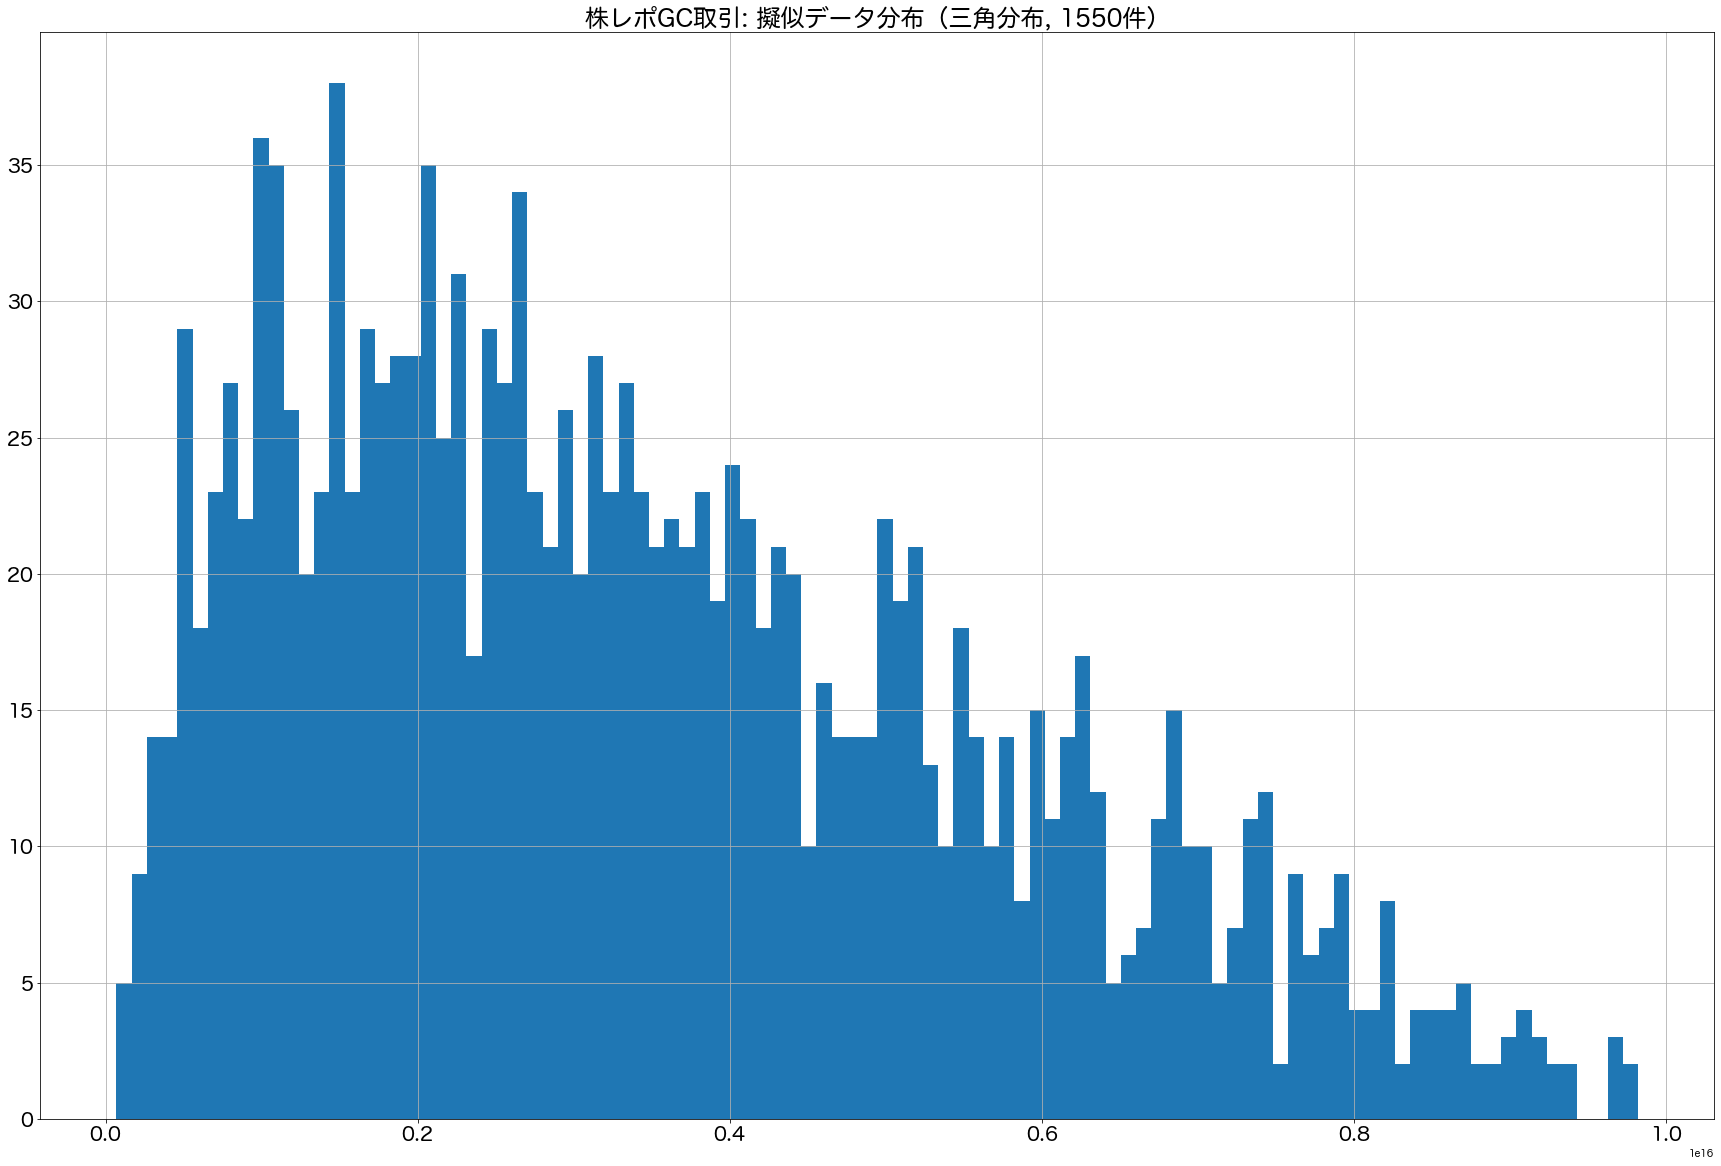

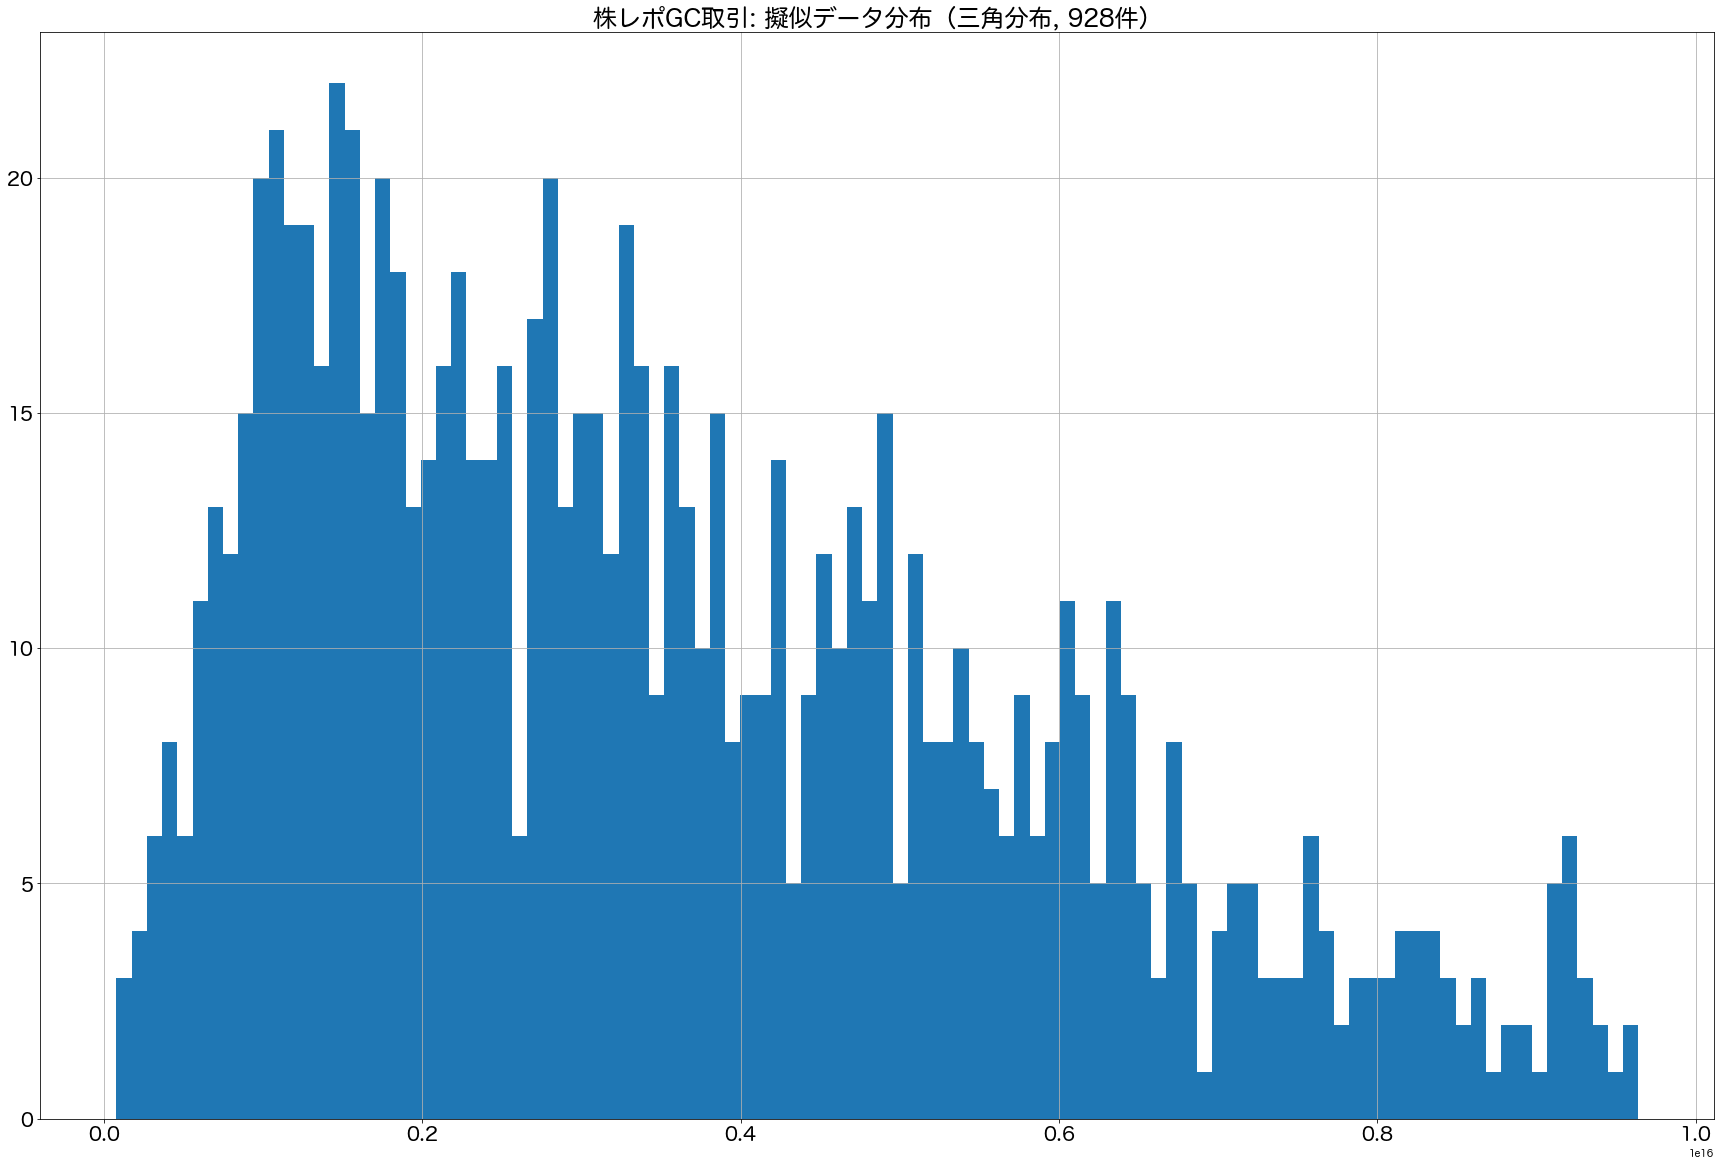

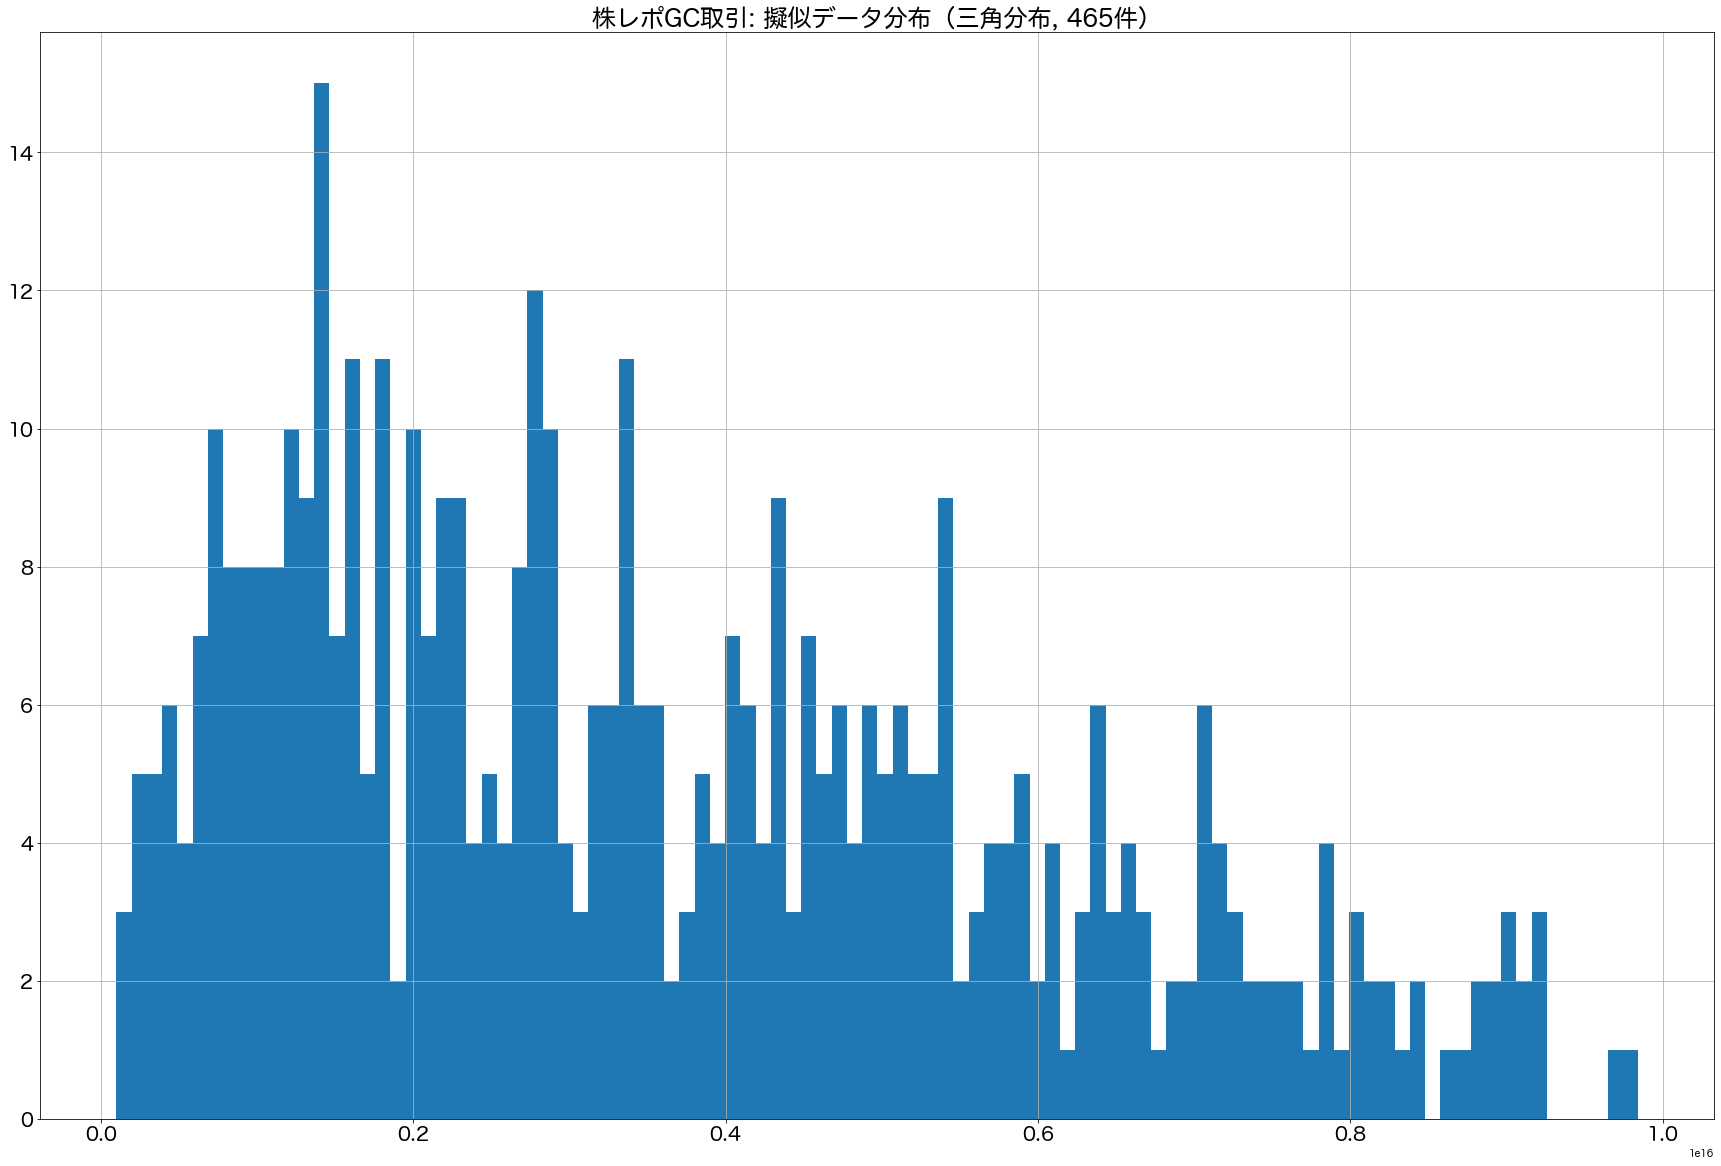

In [80]:
for _key, _value in b_trade_nums.items():
    _num = _value['gc']
    all_price_dfs[_key]['gc'] = get_gc_price_df(_num)
all_price_dfs

#### 株レポSC取引

株レポ: SC取引金額
              1億円以内          1億円超          2億円超          5億円超         10億円超
ratio  7.400000e-01  9.000000e-02  1.100000e-01  4.000000e-02  2.000000e-02
min    1.000000e+03  1.000000e+08  2.000000e+08  5.000000e+08  1.000000e+09
max    1.000000e+08  2.000000e+08  5.000000e+08  1.000000e+09  1.000000e+10
株レポ: SC取引金額概観


<AxesSubplot:>

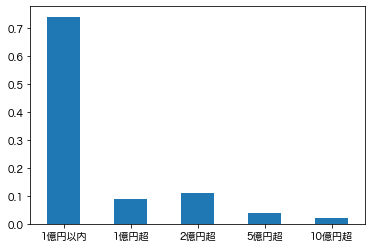

In [34]:
sc_price_column_labels = ['1億円以内', '1億円超', '2億円超', '5億円超', '10億円超']
sc_price_dist = pd.DataFrame([[0.74, 0.09, 0.11, 0.04, 0.02], [1.0e+3, 1.0e+8, 2.0e+8, 5.0e+8, 1.0e+9], [1.0e+8, 2.0e+8, 5.0e+8, 1.0e+9, 1.0e+10]],
                             columns=sc_price_column_labels,
                             index=['ratio', 'min', 'max'])
sc_price_ave = 1.34e+8
print('株レポ: SC取引金額')
pprint(sc_price_dist)
print('='*50)
print('株レポ: SC取引金額概観')
sc_price_dist.T['ratio'].plot(kind='bar', rot=0)

株レポ: SC取引金額ヒストグラム


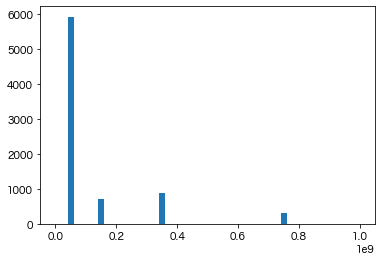

In [283]:
sc_trade_num = 8000
sc_ave_price_list = (sc_price_dist.T['min'] + sc_price_dist.T['max']) / 2
sc_sample = [[ave]*int(sc_price_dist.T['ratio'][index] * sc_trade_num)  for (index, ave) in enumerate(sc_ave_price_list)]
plt.hist(list(itertools.chain.from_iterable(sc_sample)), bins=50, range=(0, 1.0e+9))
print('株レポ: SC取引金額ヒストグラム')

In [35]:
def get_sc_price_df(trade_num):
    sc_price_max = sc_price_dist['10億円超']['max']
    sc_price_min = sc_price_dist['1億円以内']['min']
    mock_sc_price_df = pd.DataFrame(np.random.triangular(sc_price_min, sc_price_ave, sc_price_max, trade_num)) * 1.0e+5
    mock_sc_price_df.hist(bins=100, figsize=(30, 20))
    plt.title(f'株レポSC取引: 擬似データ分布（三角分布, {trade_num}件）', fontsize=24)
    return mock_sc_price_df

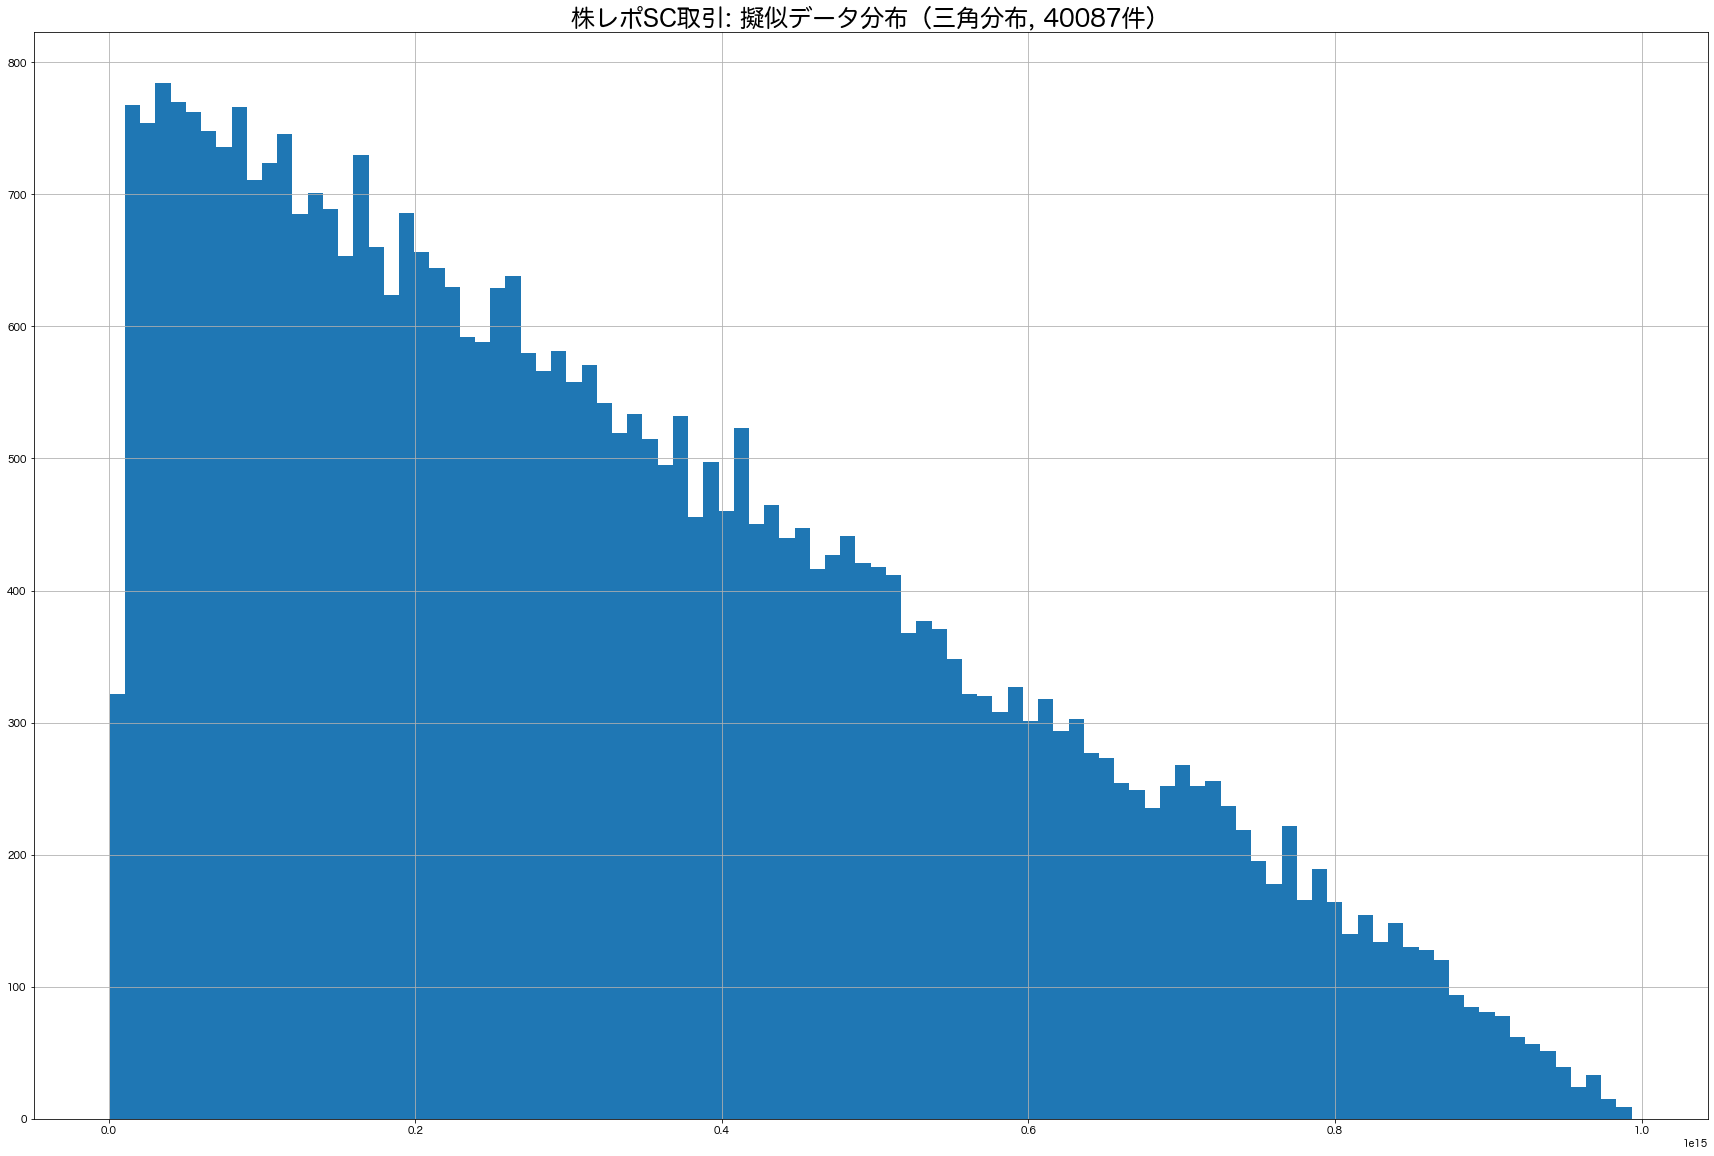

In [36]:
mock_sc_trade_8000_df = get_sc_price_df(b_trade_nums['100%']['sc'])

{'gc':                  0
 0     4.772162e+15
 1     7.239525e+15
 2     3.441230e+15
 3     7.843045e+15
 4     3.022732e+15
 ...            ...
 6193  5.219749e+15
 6194  1.502039e+15
 6195  2.897166e+15
 6196  1.991822e+15
 6197  3.999879e+15
 
 [6198 rows x 1 columns],
 'sc':                   0
 0      4.723997e+14
 1      2.505563e+14
 2      2.875350e+14
 3      1.584304e+13
 4      3.261217e+14
 ...             ...
 40082  2.533551e+14
 40083  9.696089e+13
 40084  2.875506e+14
 40085  3.925992e+14
 40086  2.462781e+14
 
 [40087 rows x 1 columns]}

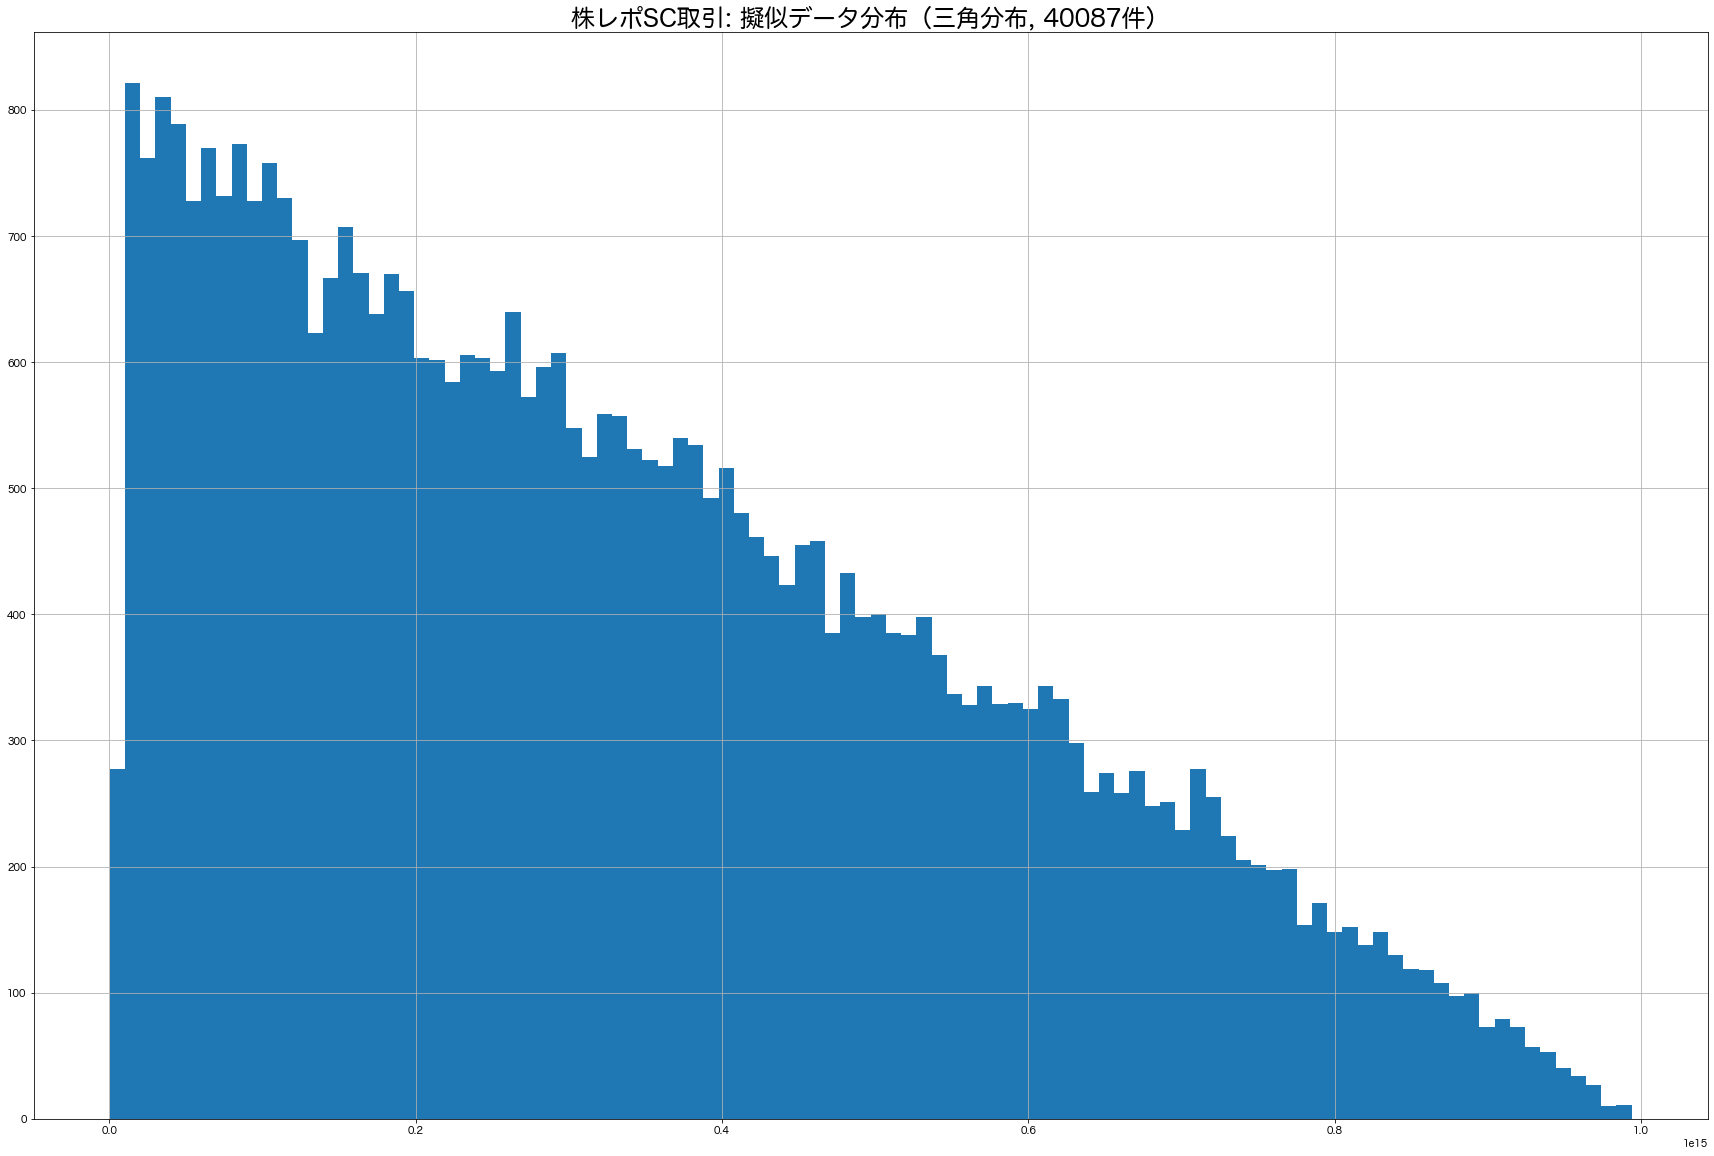

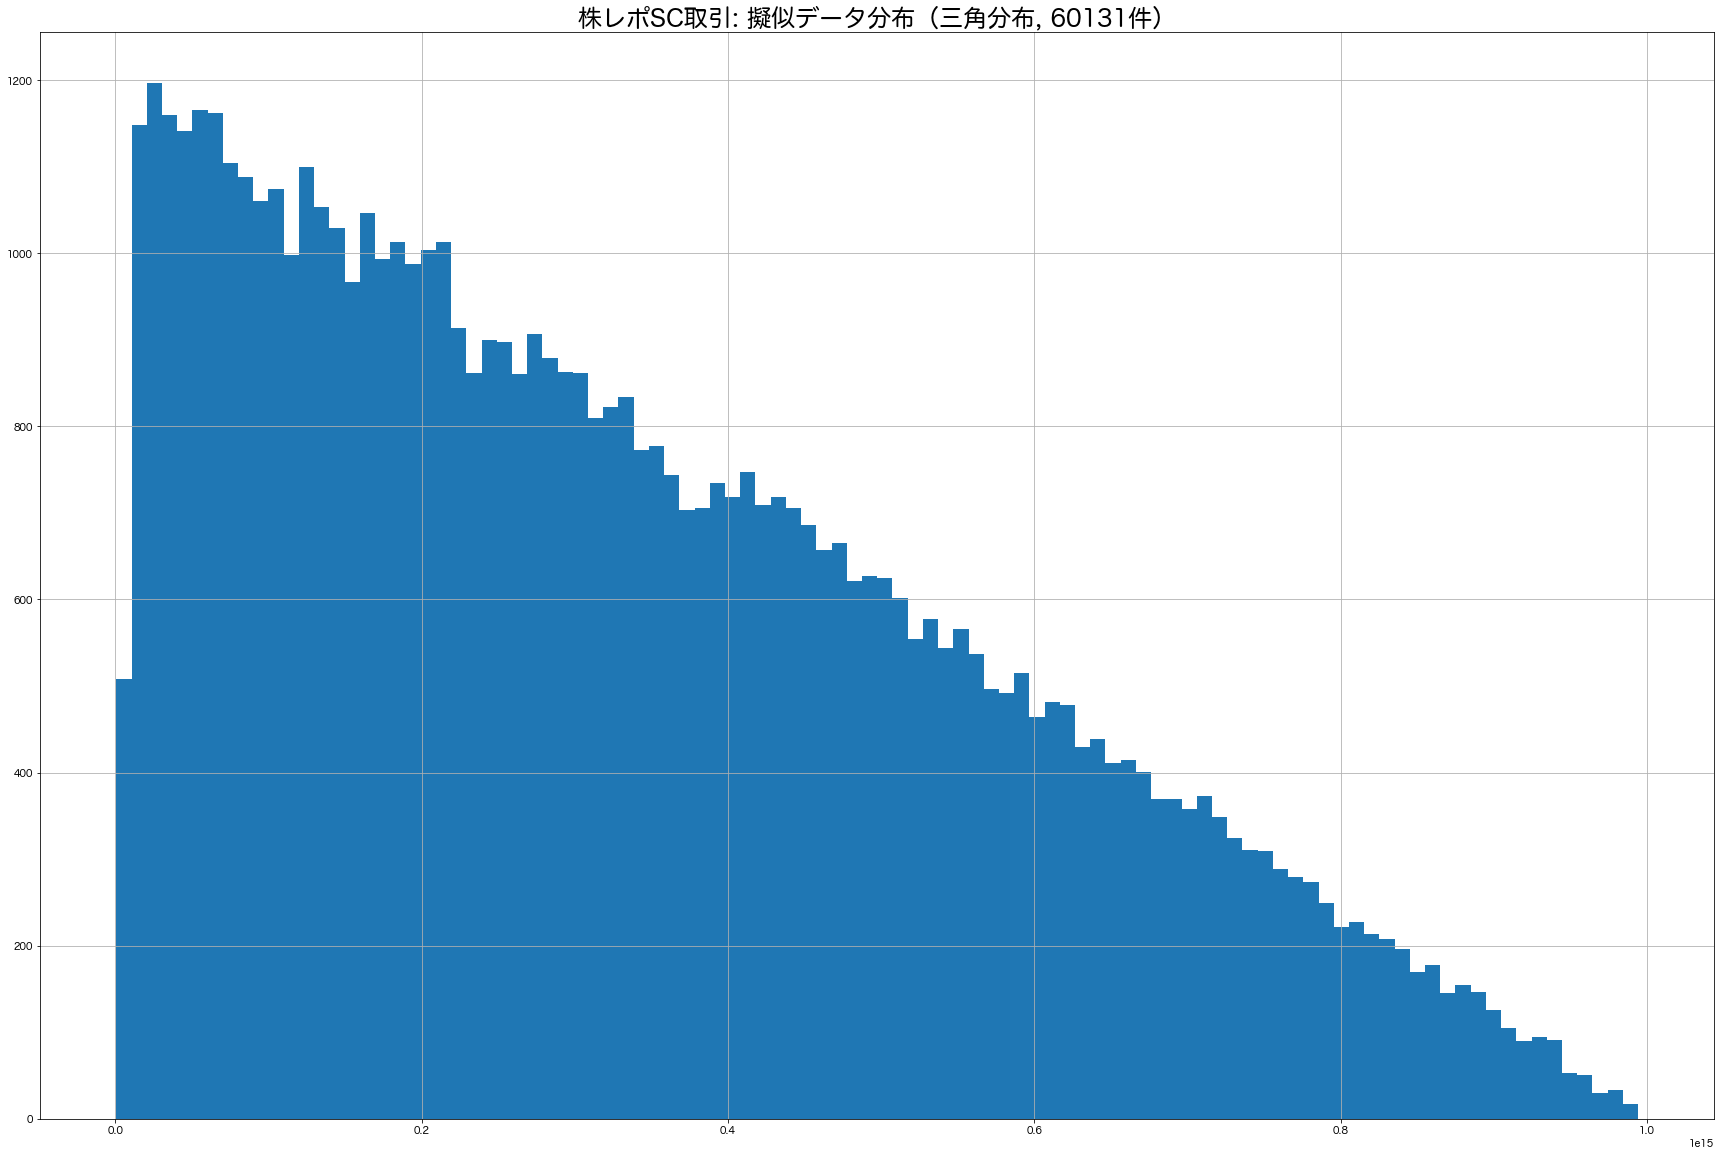

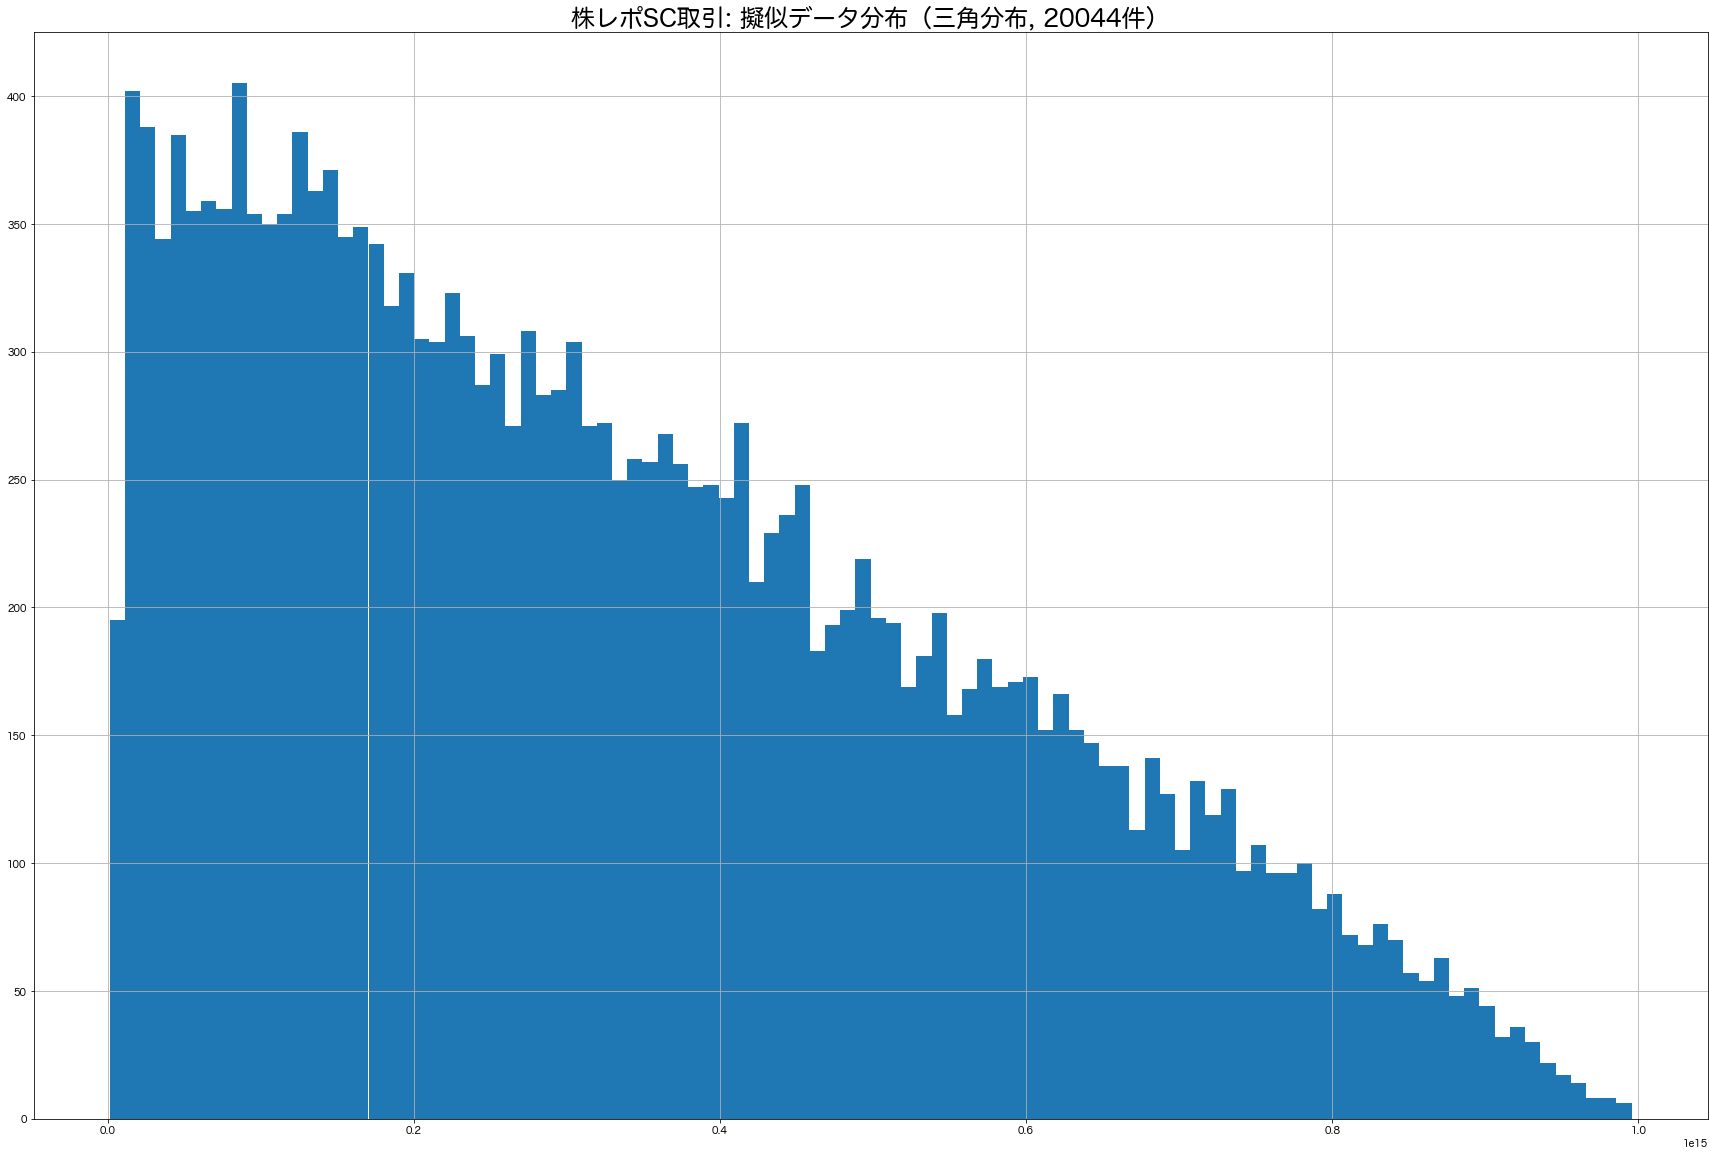

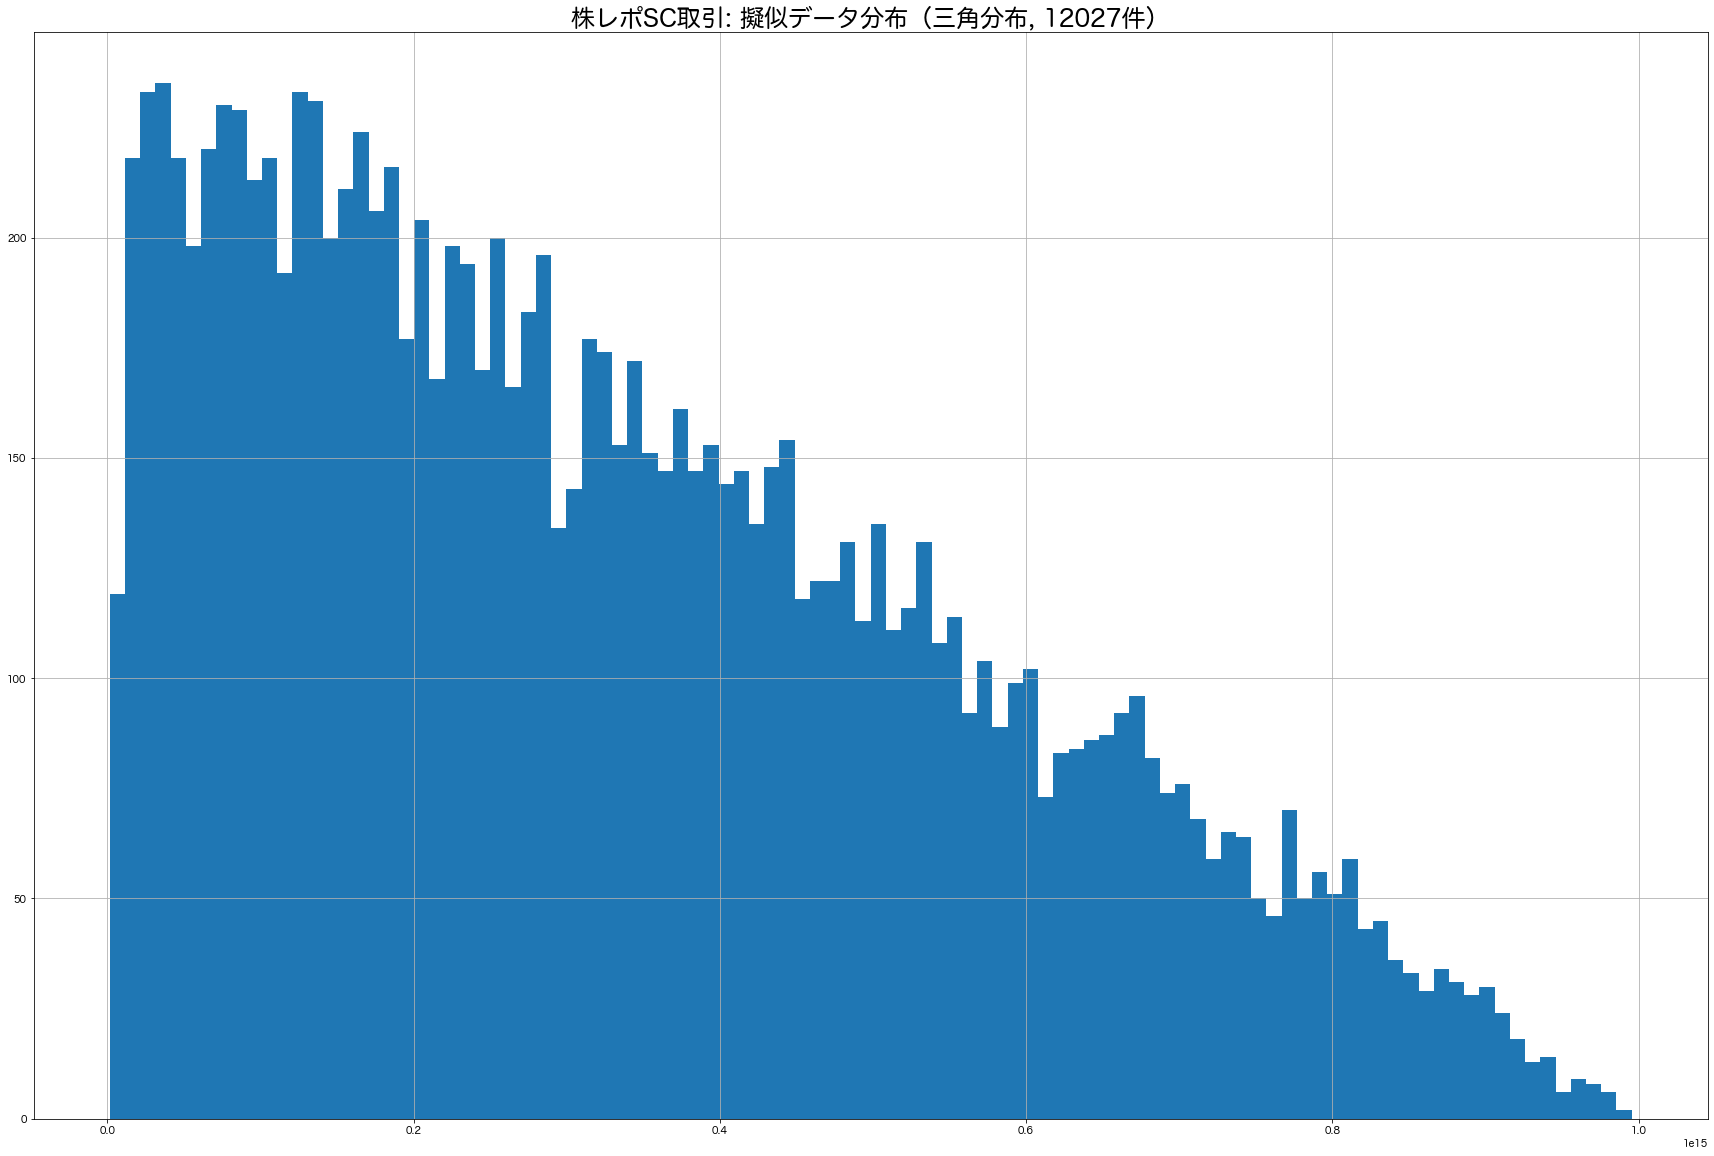

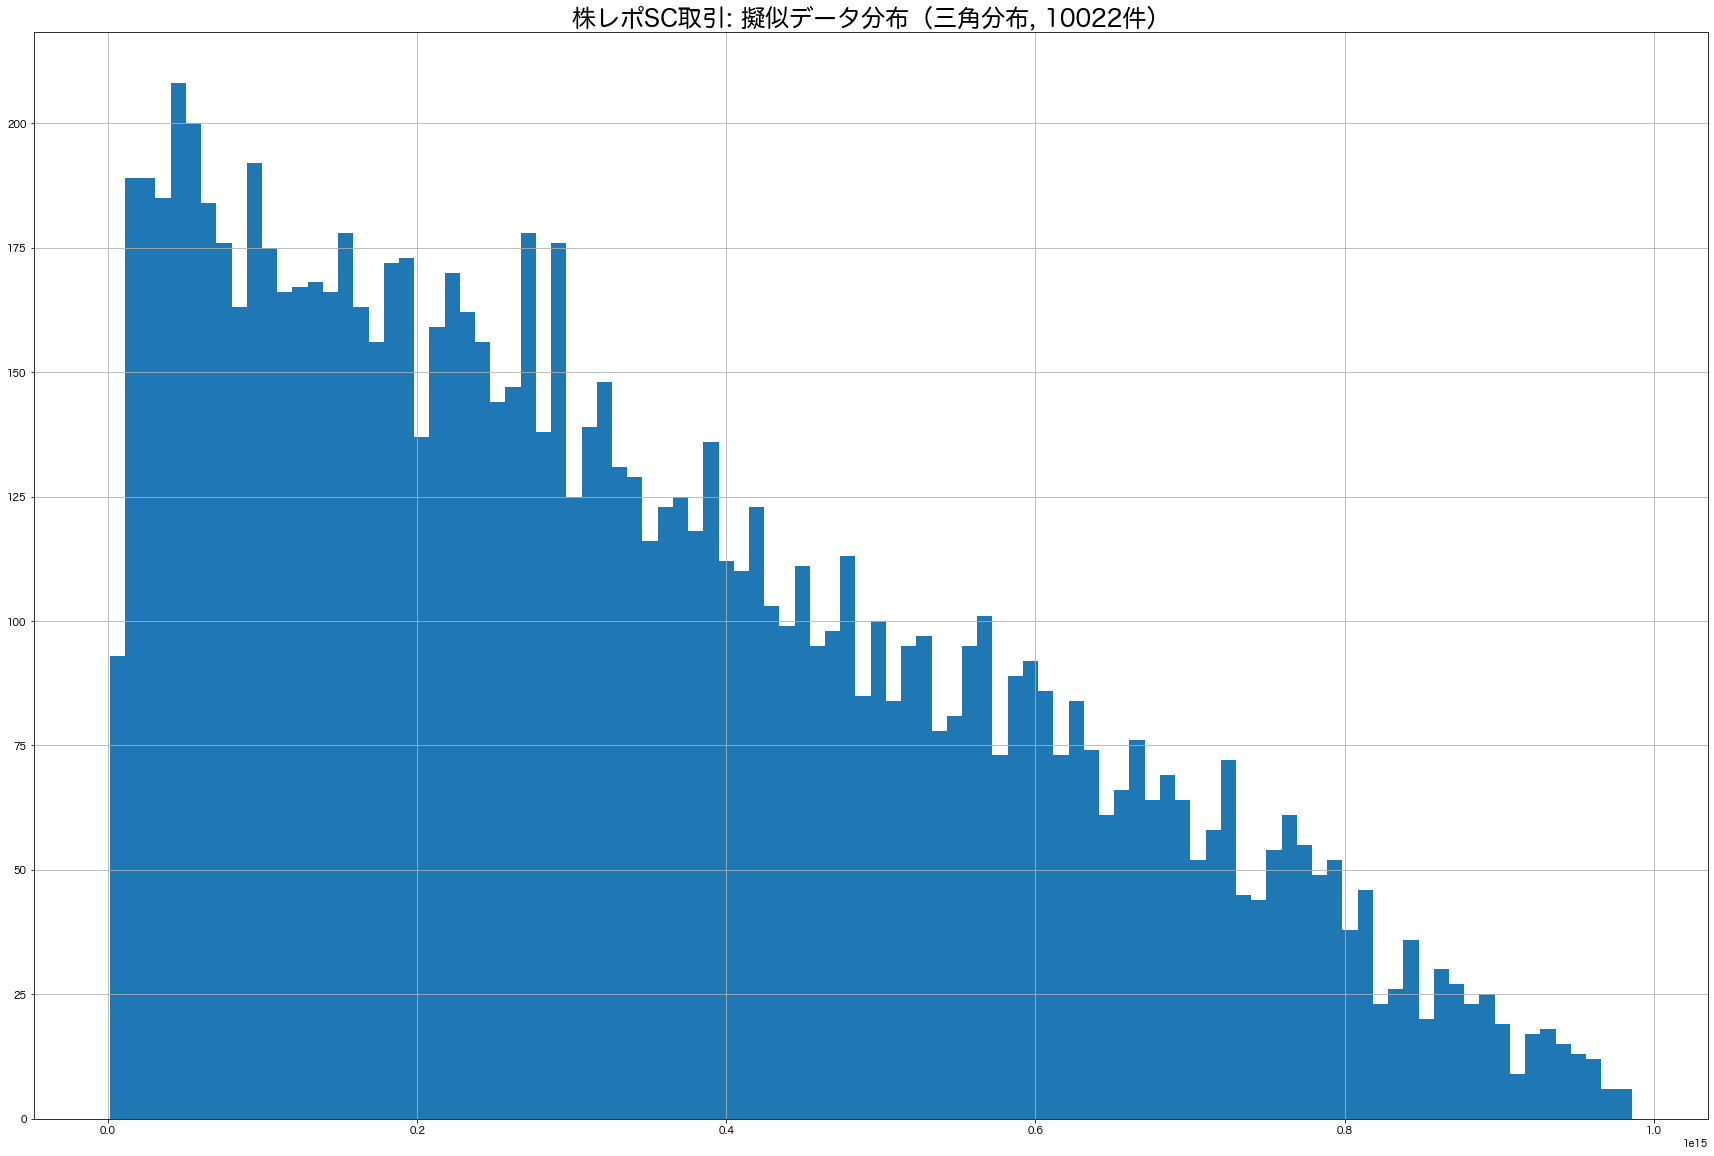

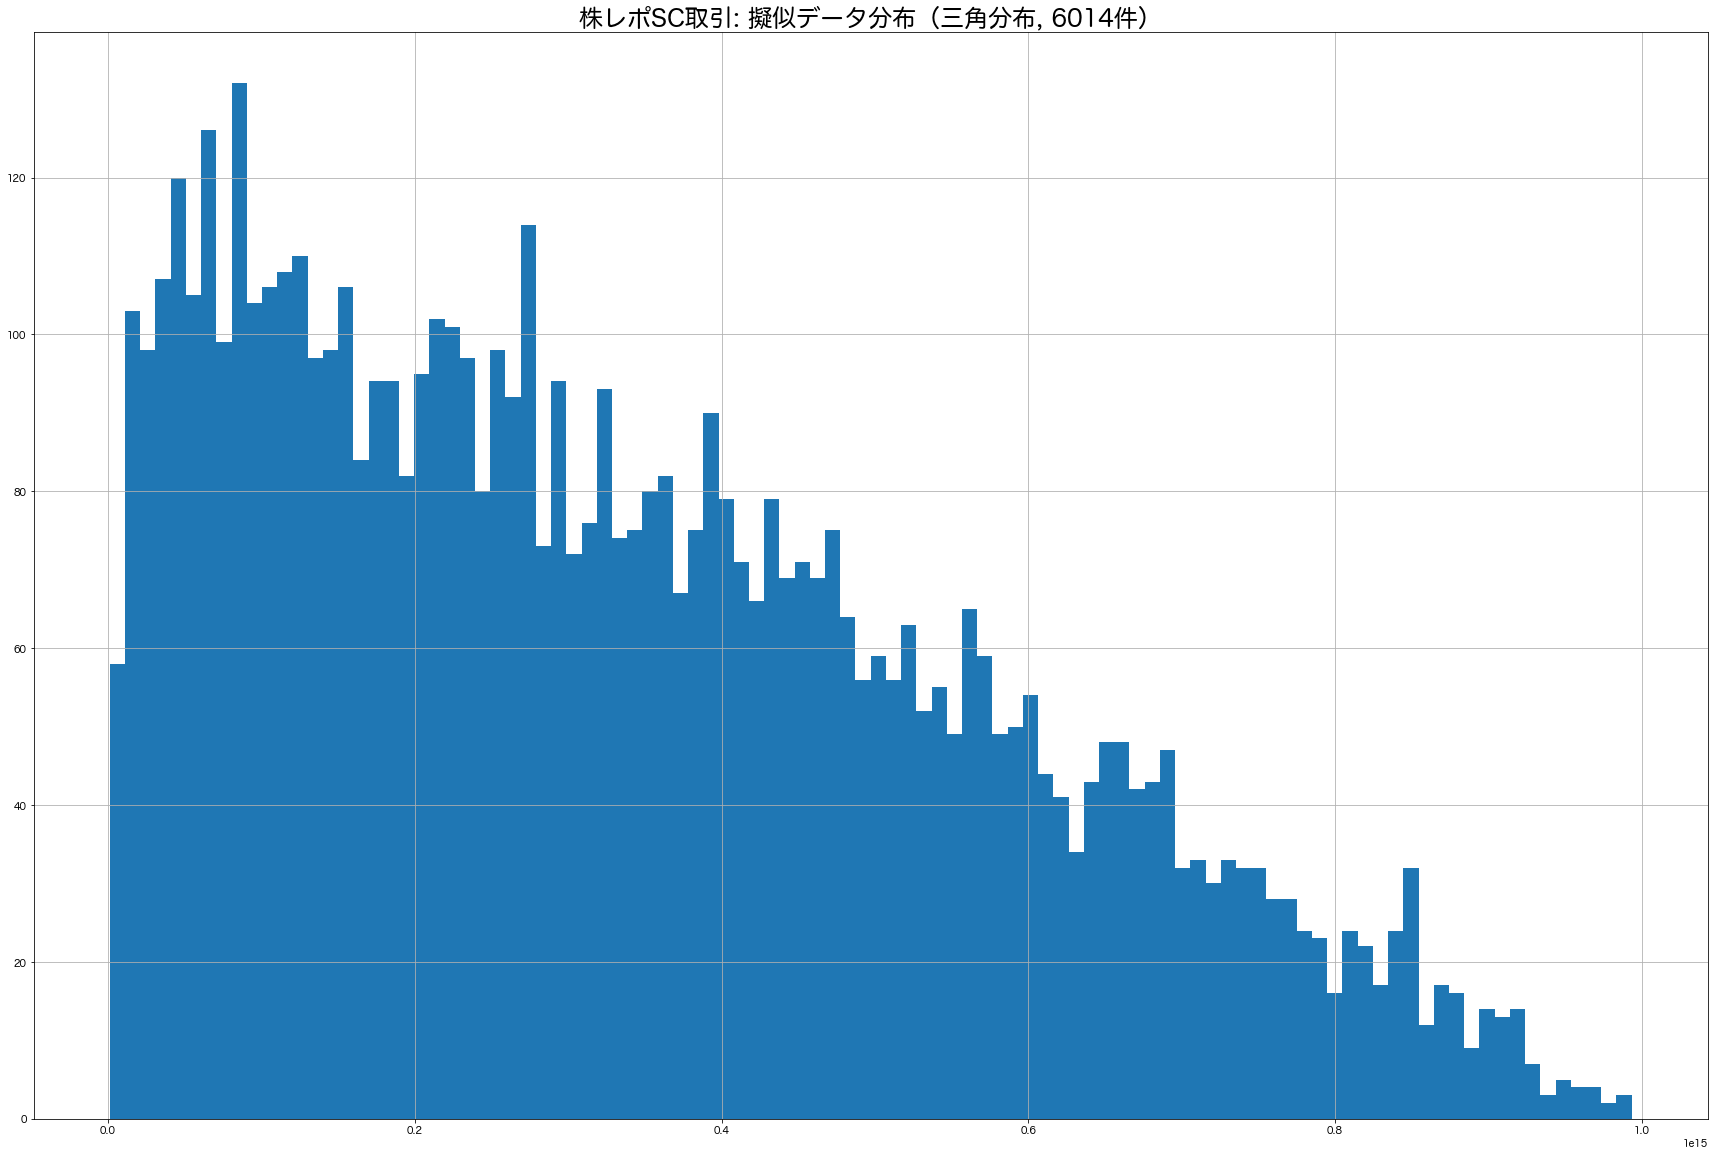

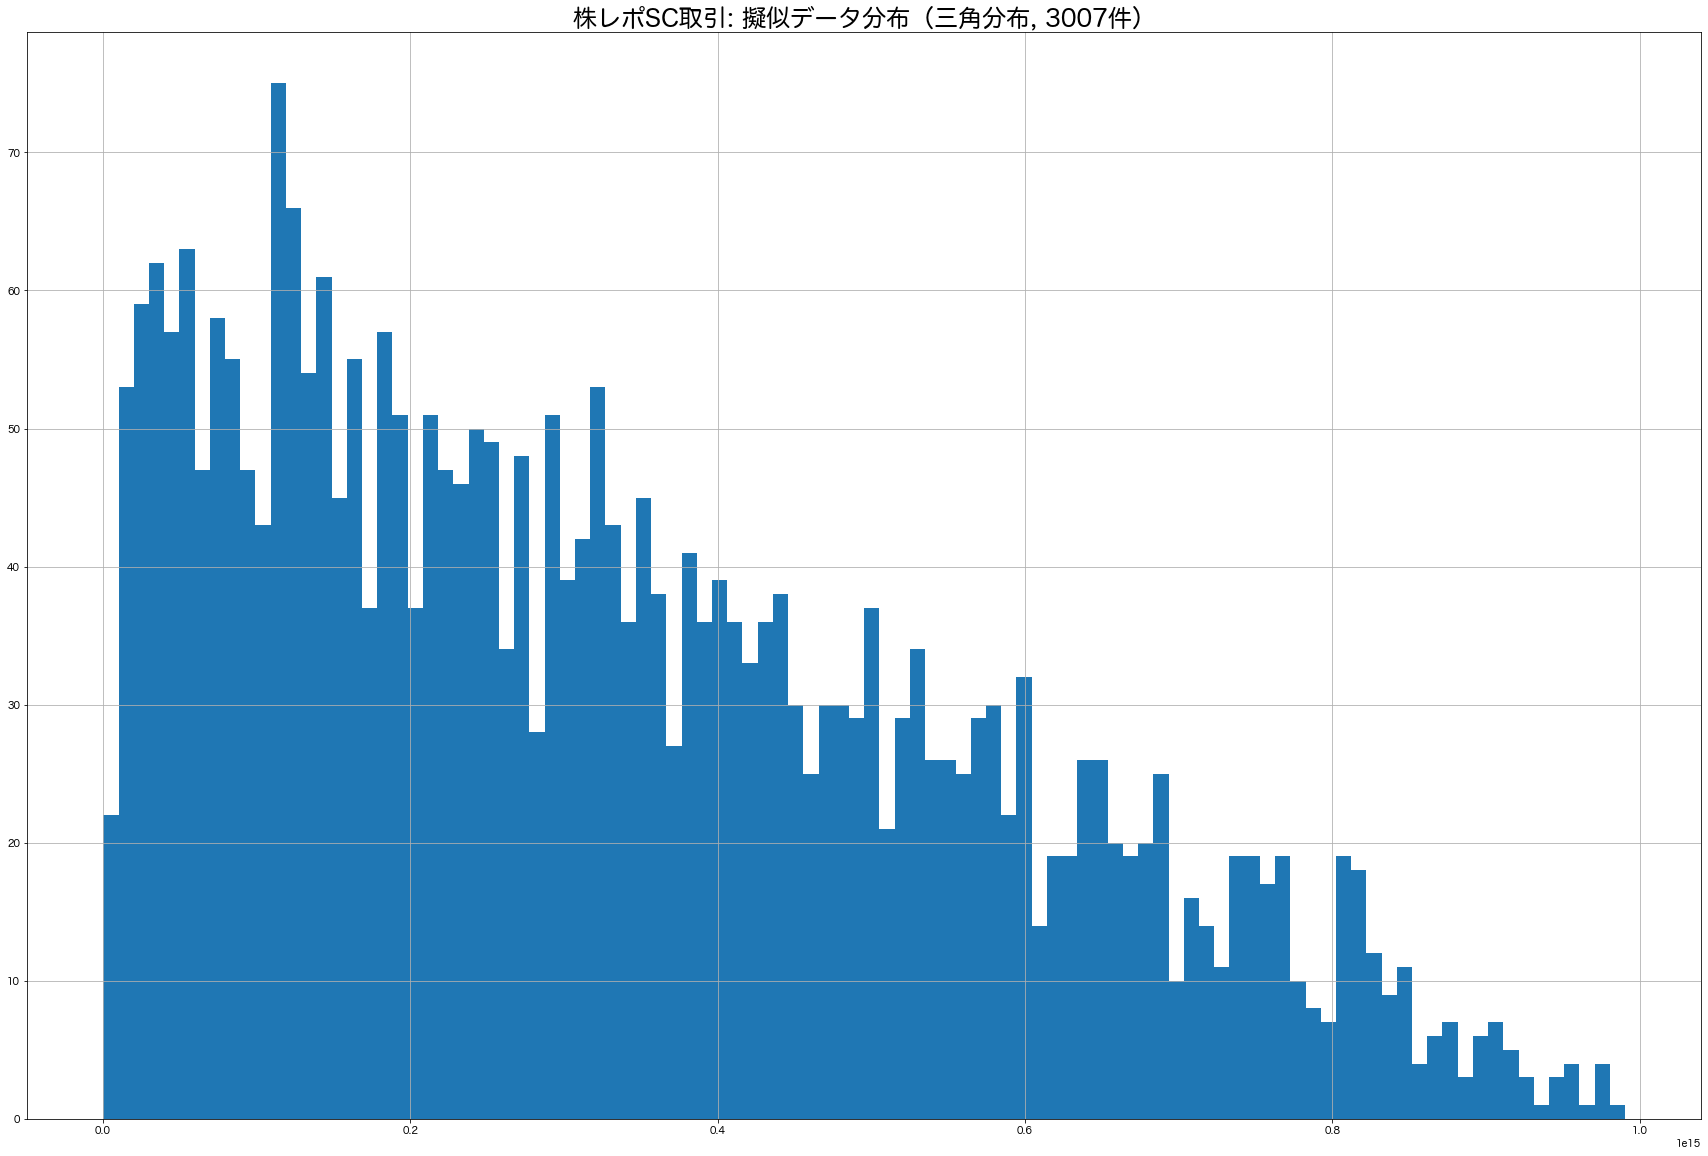

In [82]:
for _key, _value in b_trade_nums.items():
    _num = _value['sc']
    all_price_dfs[_key]['sc'] = get_sc_price_df(_num)
all_price_dfs['100%']

#### 債券

債券レポ取引: 
             10億円以内         10億円超         50億円超        100億円超        500億円超
ratio  1.200000e-01  3.100000e-01  1.900000e-01  3.100000e-01  7.000000e-02
min    1.000000e+08  1.000000e+09  5.000000e+09  1.000000e+10  5.000000e+10
max    1.000000e+09  5.000000e+09  1.000000e+10  5.000000e+10  5.000000e+11


<AxesSubplot:title={'center':'債券レポ取引: 概観'}>

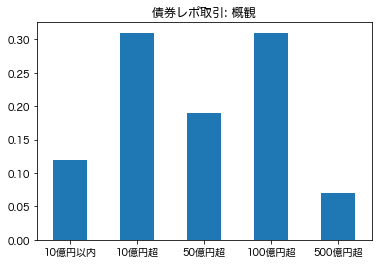

In [37]:
bond_price_column_labels = ['10億円以内', '10億円超', '50億円超', '100億円超', '500億円超']
bond_price_dist = pd.DataFrame([[0.12, 0.31, 0.19, 0.31, 0.07], [1.0e+8, 1.0e+9, 5.0e+9, 1.0e+10, 5.0e+10], [1.0e+9, 5.0e+9, 1.0e+10, 5.0e+10, 5.0e+11]],
                             columns=bond_price_column_labels,
                             index=['ratio', 'min', 'max'])
bond_price_ave = 113.0e+8
print('債券レポ取引: ')
pprint(bond_price_dist)
print('='*50)

plt.title('債券レポ取引: 概観')
bond_price_dist.T['ratio'].plot(kind='bar', rot=0)

債券レポ: 取引金額ヒストグラム


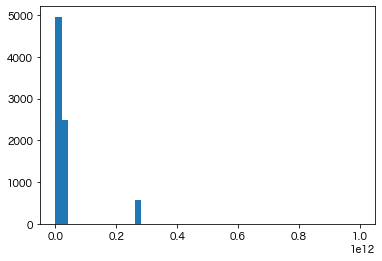

In [38]:
bond_trade_num = 8000
bond_ave_price_list = (bond_price_dist.T['min'] + bond_price_dist.T['max']) / 2
bond_sample = [[ave]*int(bond_price_dist.T['ratio'][index] * bond_trade_num)  for (index, ave) in enumerate(bond_ave_price_list)]
plt.hist(list(itertools.chain.from_iterable(bond_sample)), bins=50, range=(0, 1.0e+12))
print('債券レポ: 取引金額ヒストグラム')

In [39]:
def get_bond_price_df(trade_num):
    bond_price_max = bond_price_dist['500億円超']['max']
    bond_price_min = bond_price_dist['10億円以内']['min']
    mock_bond_price_df = pd.DataFrame(np.random.triangular(bond_price_min, bond_price_ave, bond_price_max, trade_num)) * 1.0e+5
    mock_bond_price_df.hist(bins=100, figsize=(30, 20))
    plt.title(f'債券レポ取引: 擬似データ分布（三角分布, {trade_num}件）', fontsize=24)
    return mock_bond_price_df

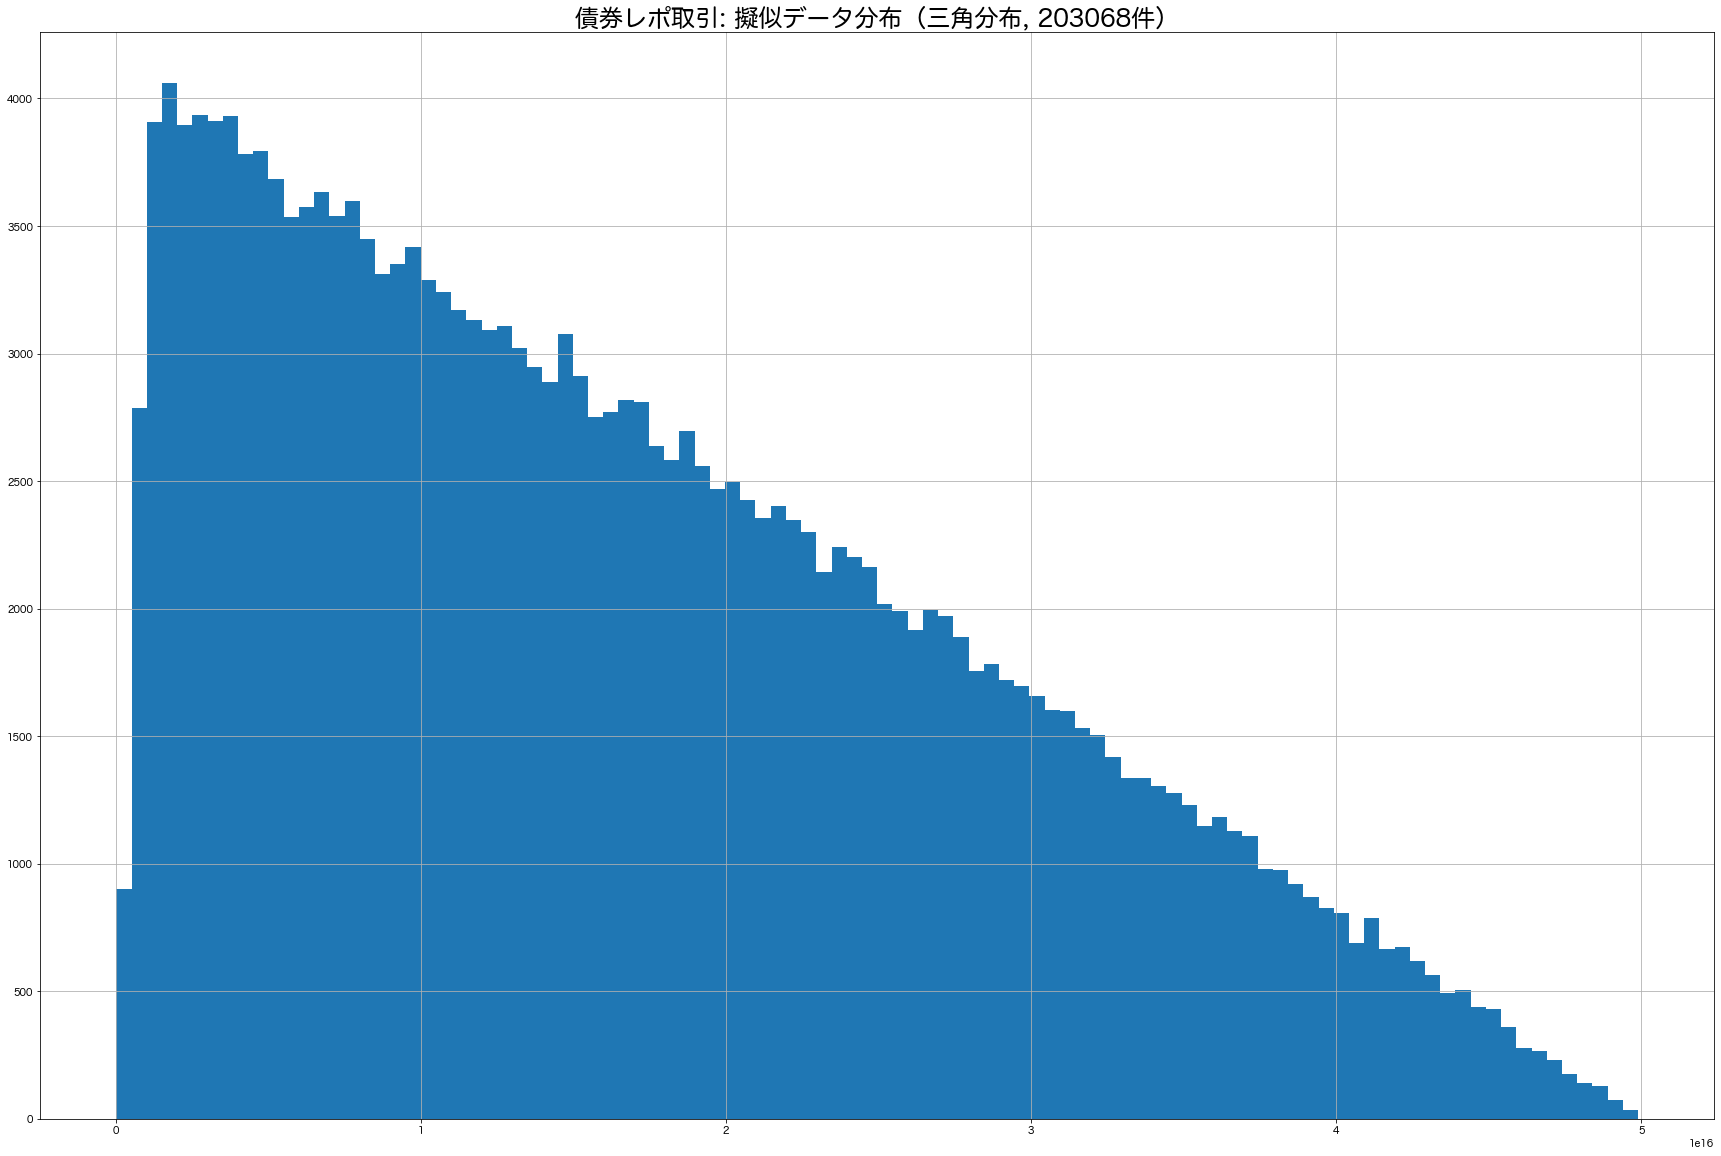

In [40]:
mock_bond_trade_8000_df = get_bond_price_df(b_trade_nums['100%']['bond'])

{'gc':                  0
 0     4.772162e+15
 1     7.239525e+15
 2     3.441230e+15
 3     7.843045e+15
 4     3.022732e+15
 ...            ...
 6193  5.219749e+15
 6194  1.502039e+15
 6195  2.897166e+15
 6196  1.991822e+15
 6197  3.999879e+15
 
 [6198 rows x 1 columns],
 'sc':                   0
 0      4.723997e+14
 1      2.505563e+14
 2      2.875350e+14
 3      1.584304e+13
 4      3.261217e+14
 ...             ...
 40082  2.533551e+14
 40083  9.696089e+13
 40084  2.875506e+14
 40085  3.925992e+14
 40086  2.462781e+14
 
 [40087 rows x 1 columns],
 'bond':                    0
 0       1.672574e+16
 1       3.413722e+16
 2       1.234834e+16
 3       3.584579e+16
 4       2.875239e+16
 ...              ...
 203063  6.134229e+15
 203064  2.645564e+16
 203065  1.274055e+16
 203066  1.763712e+16
 203067  1.268690e+16
 
 [203068 rows x 1 columns]}

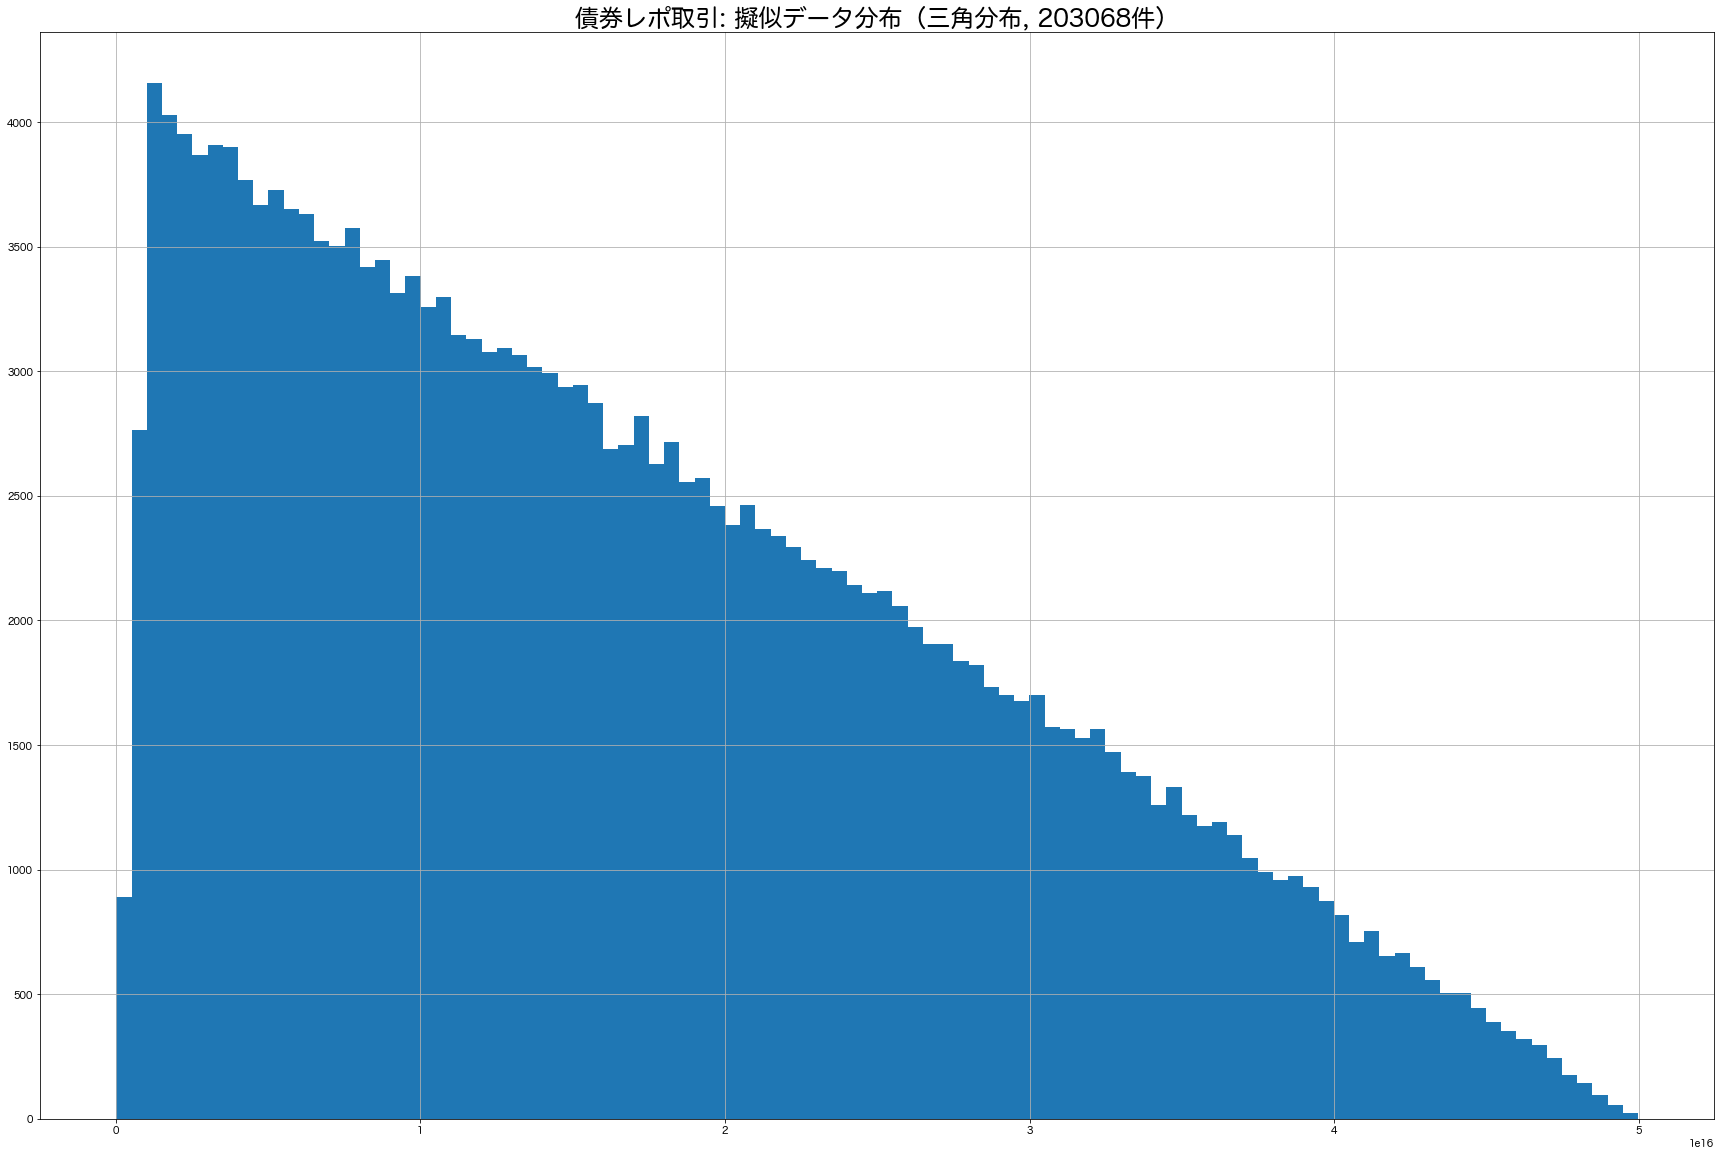

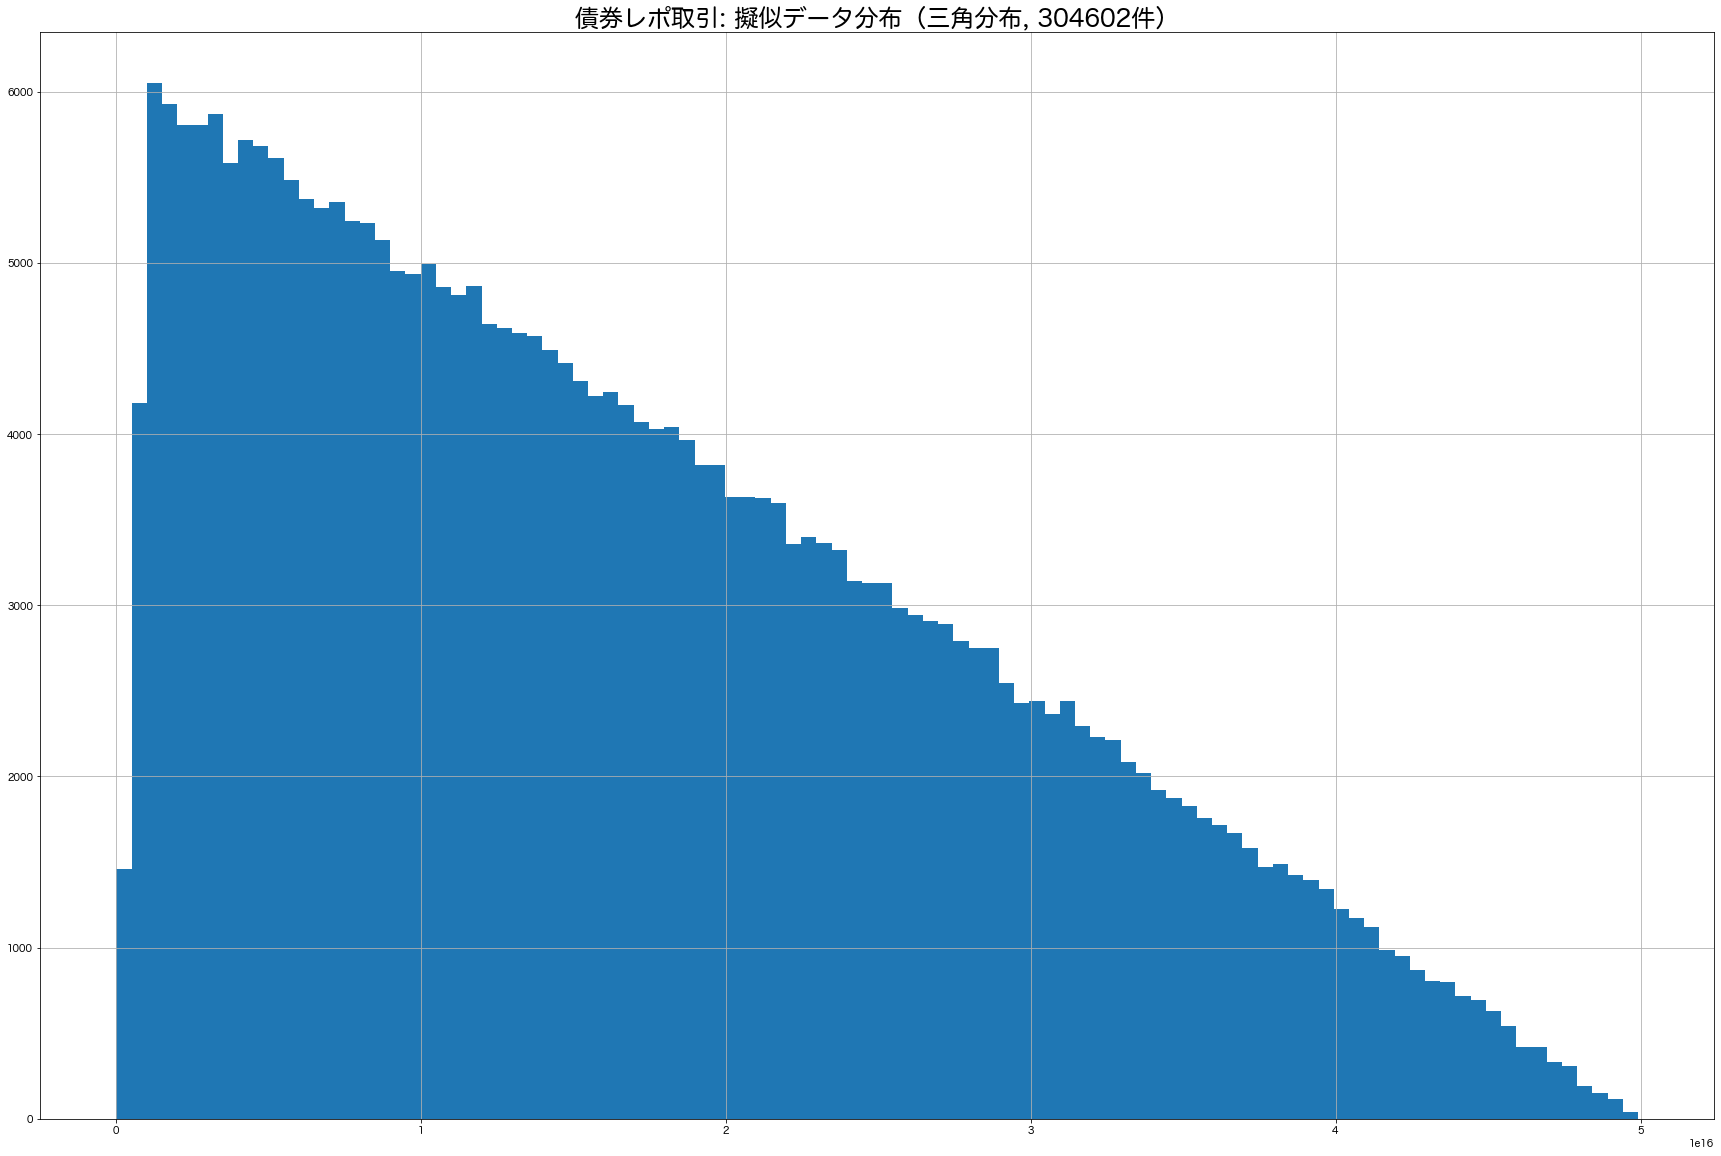

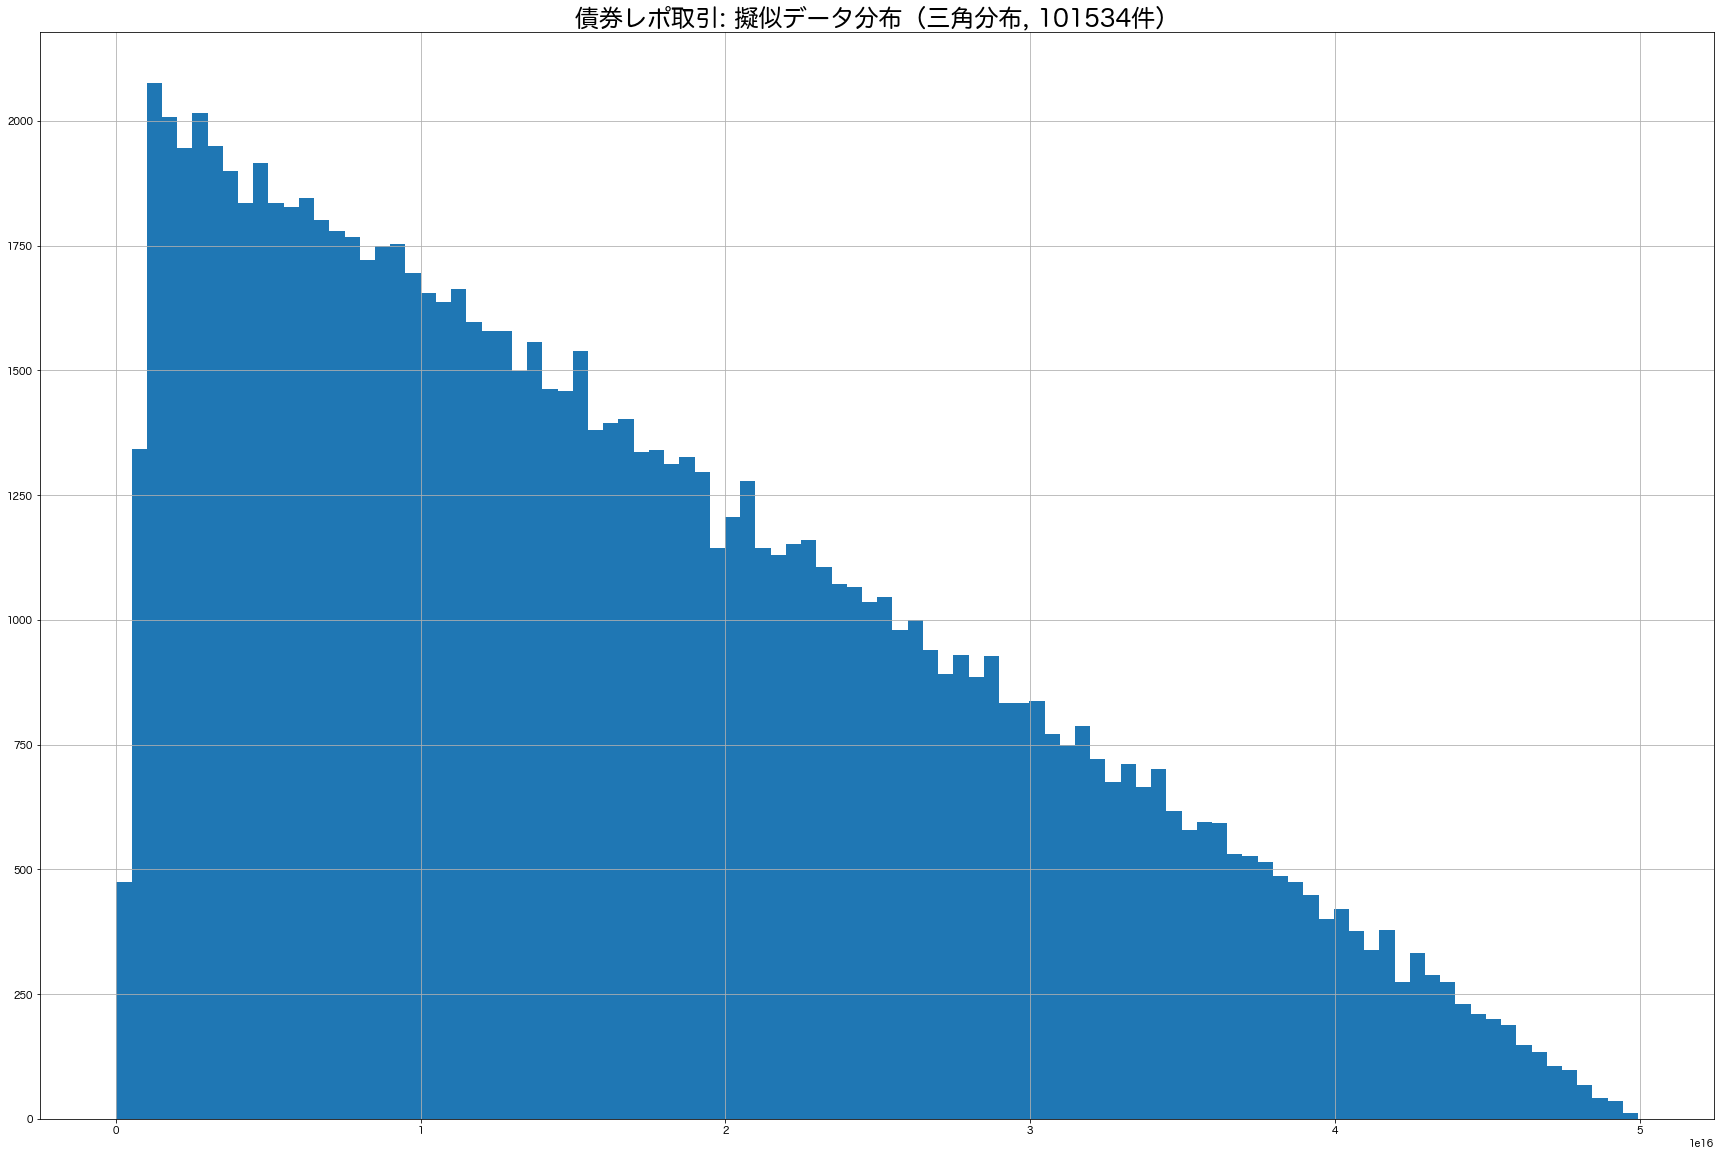

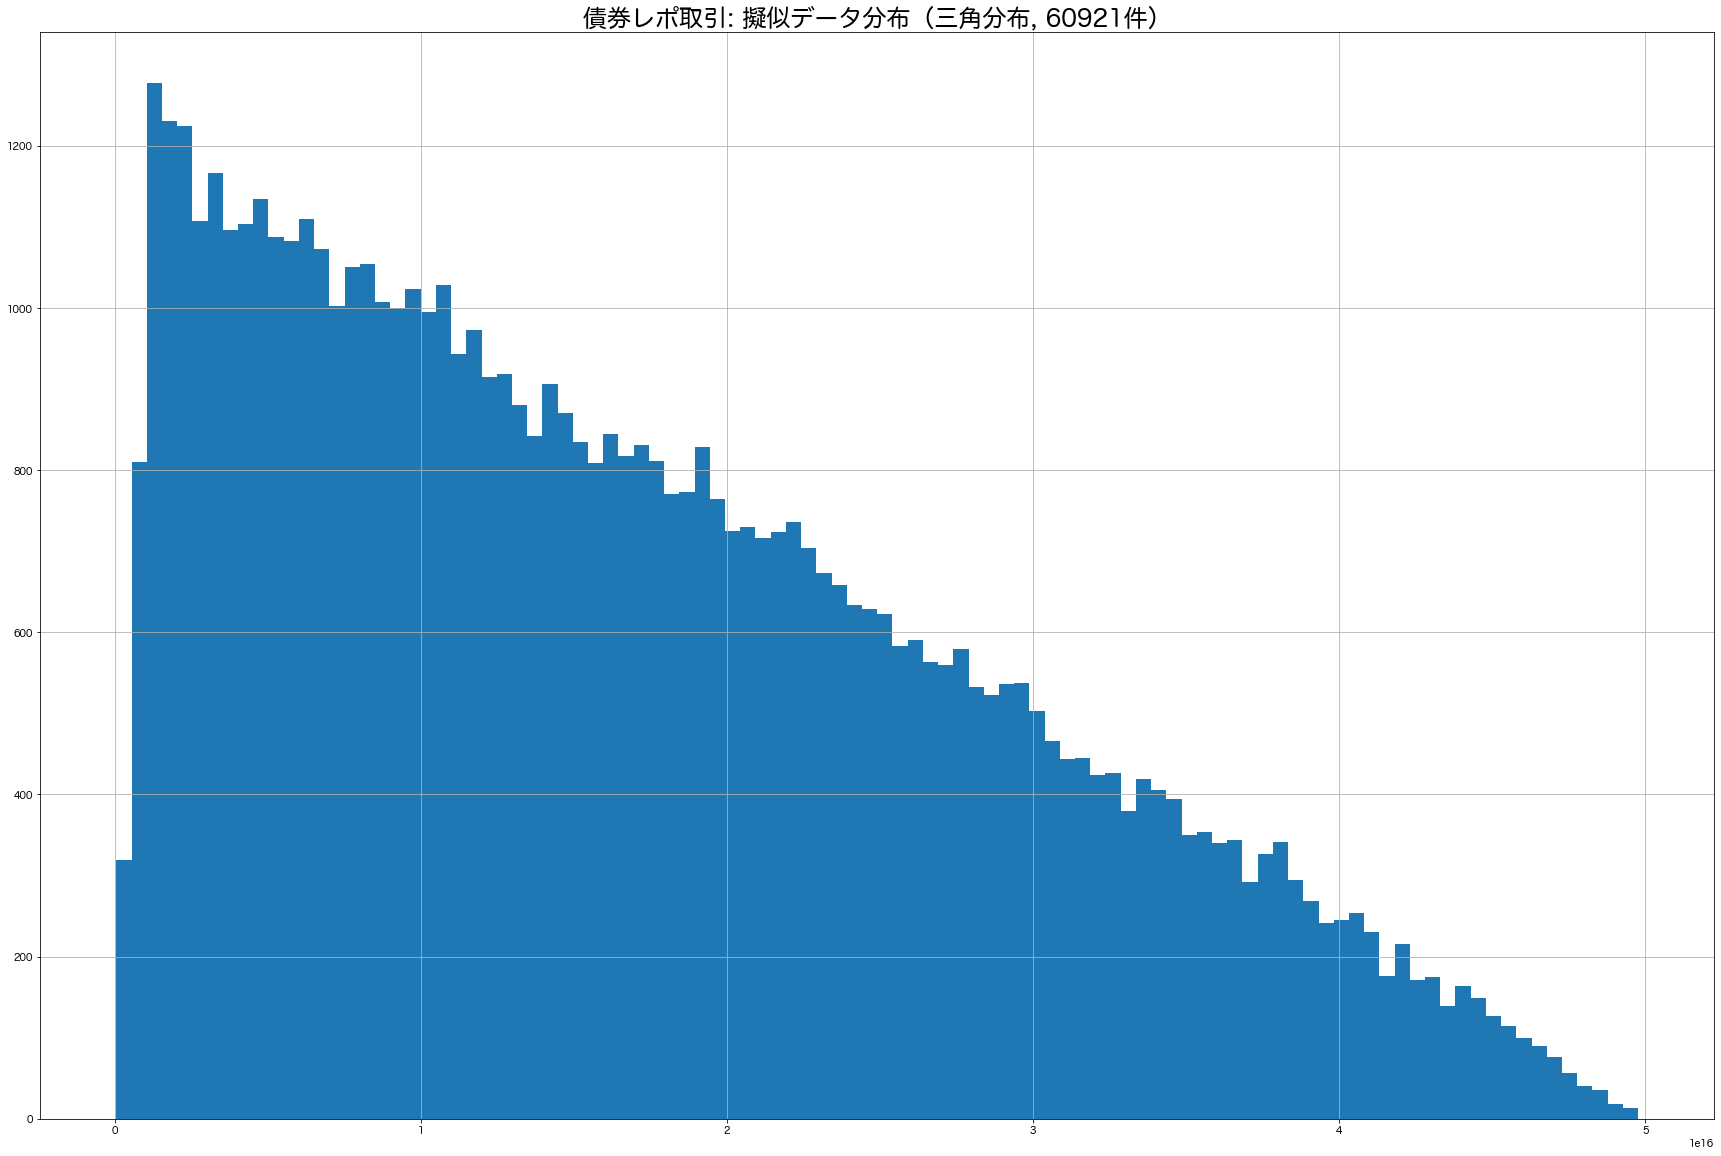

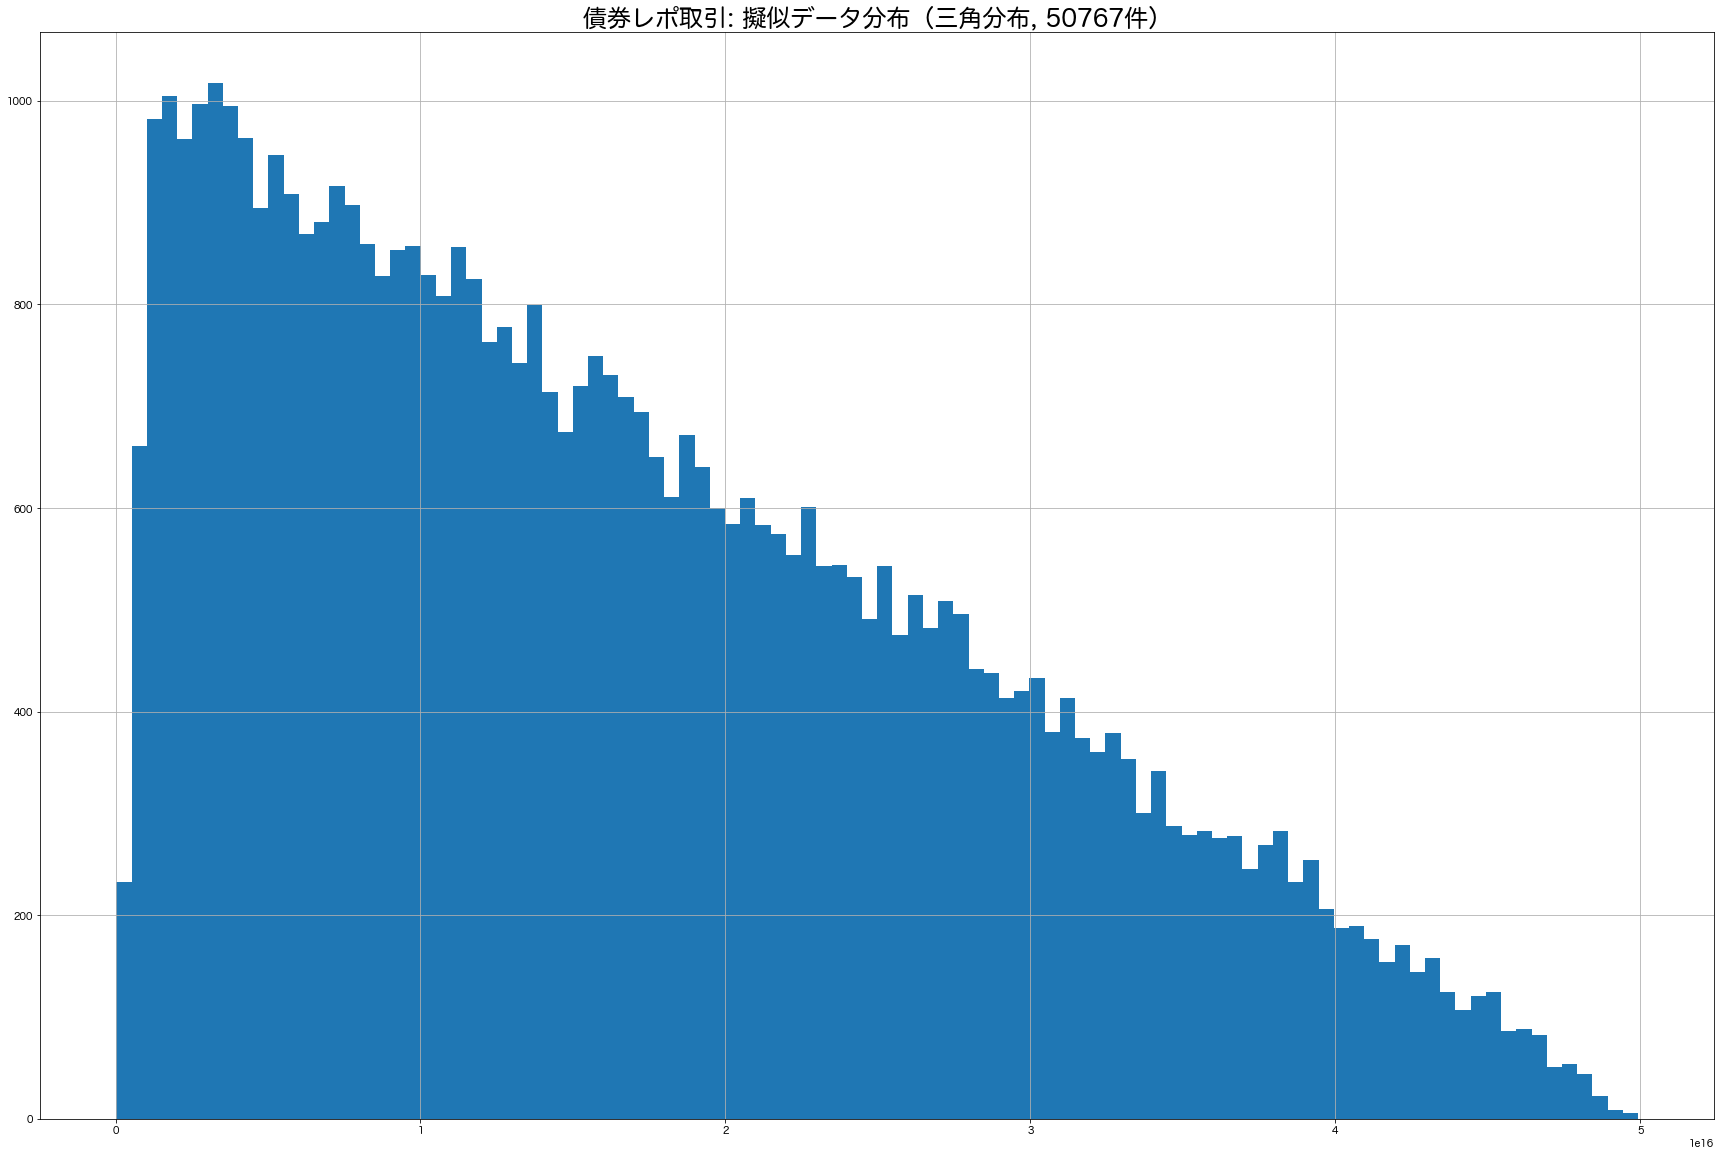

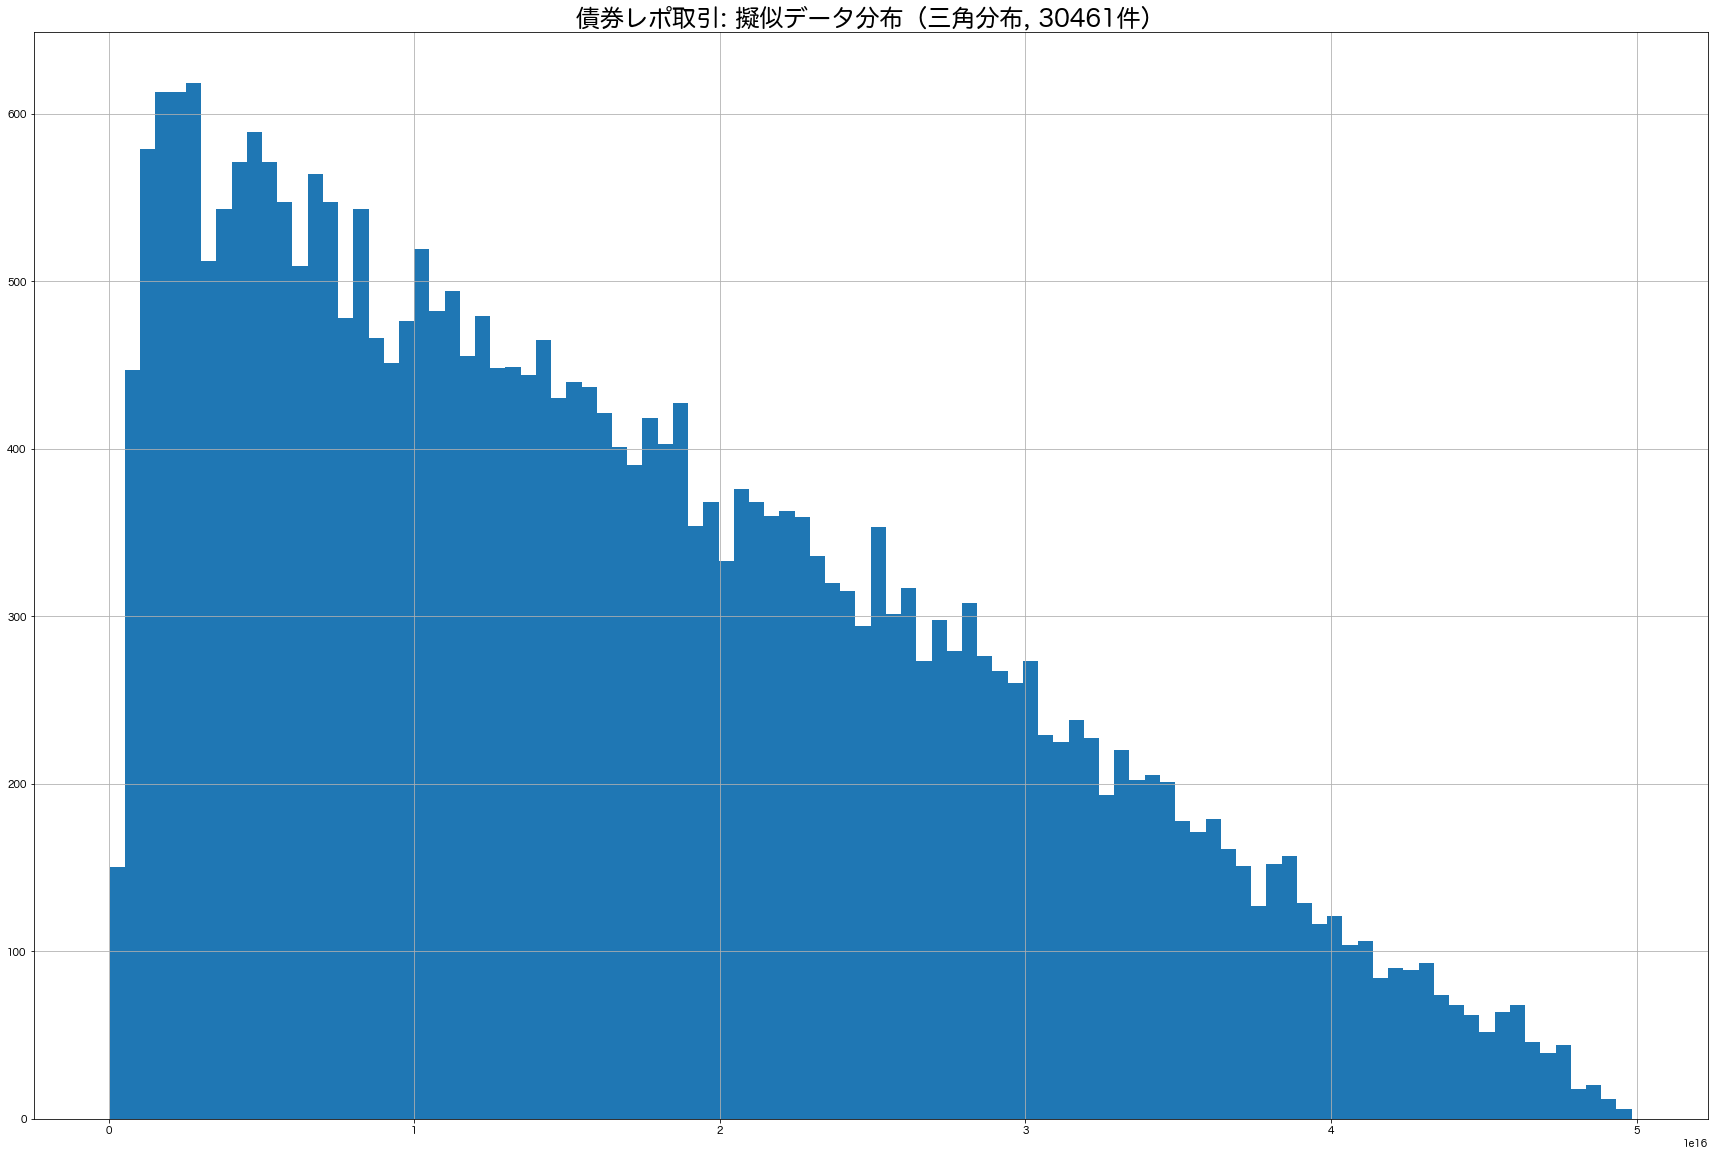

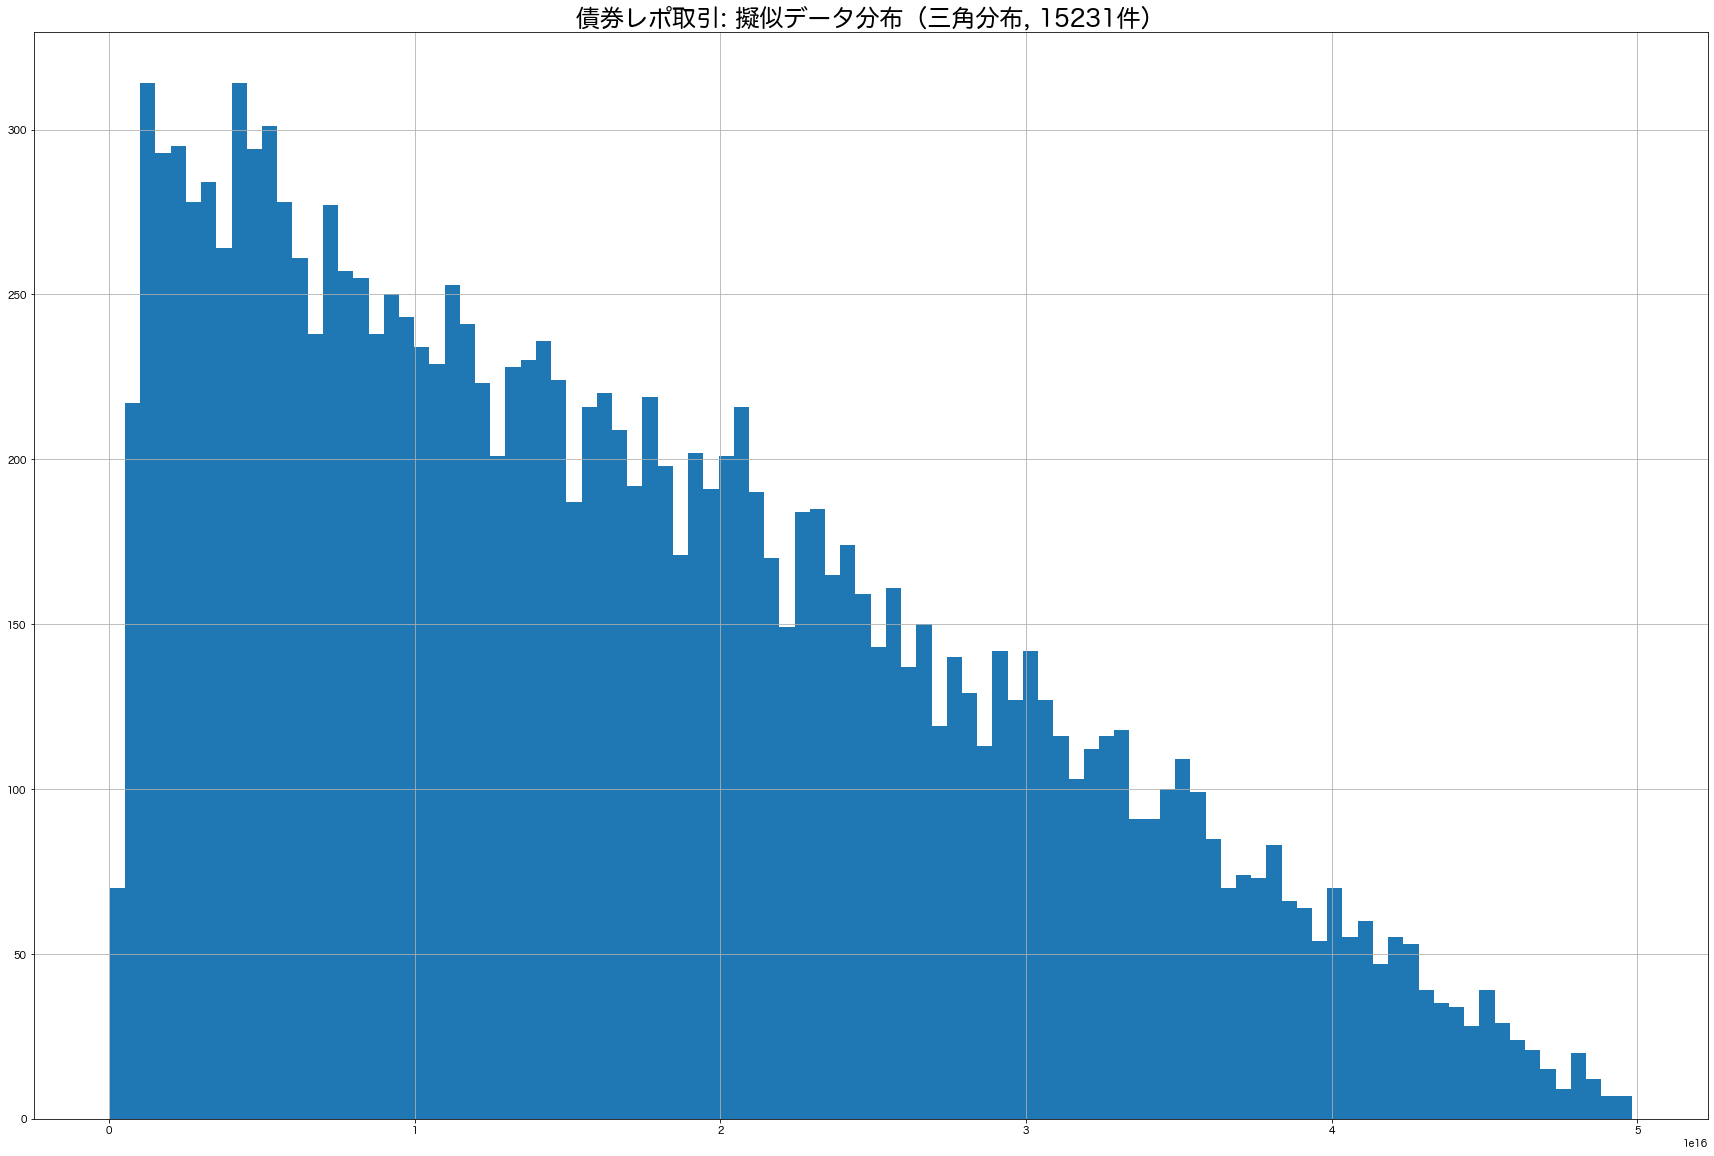

In [83]:
for _key, _value in b_trade_nums.items():
    _num = _value['bond']
    all_price_dfs[_key]['bond'] = get_bond_price_df(_num)
all_price_dfs['100%']

### Number of securities per trade

In [84]:
# security_num_df を格納するobjの初期化
all_security_num_dfs = {
    '100%': {},
    '150%': {},
    '50%': {},
    '30%': {},
    '25%': {},
    '15%': {},
    '7.5%': {},
}

#### GC取引

株レポ: GC取引銘柄数
         1   2~10  11~50  51~100    101~
ratio  0.1   0.45    0.3     0.1    0.05
min    1.0   2.00   11.0    51.0  101.00
max    1.0  10.00   50.0   100.0  200.00


Text(0.5, 1.0, '株レポGC取引: 銘柄数')

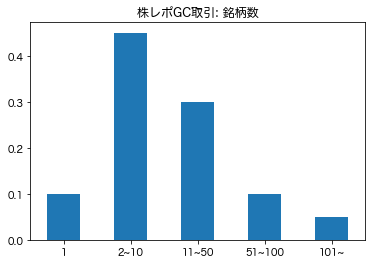

In [41]:
security_num_column_labels = ['1', '2~10', '11~50', '51~100', '101~']
gc_security_num_dist = pd.DataFrame([[0.1, 0.45, 0.3, 0.1, 0.05], [1, 2, 11, 51, 101], [1, 10, 50, 100, 200]],
                             columns=security_num_column_labels,
                             index=['ratio', 'min', 'max'])
gc_security_num_ave = 24.55
print('株レポ: GC取引銘柄数')
pprint(gc_security_num_dist)
print('='*50)

gc_security_num_dist.T['ratio'].plot(kind='bar', rot=0)
plt.title('株レポGC取引: 銘柄数')

Text(0.5, 1.0, '株レポGC取引: ヒストグラム')

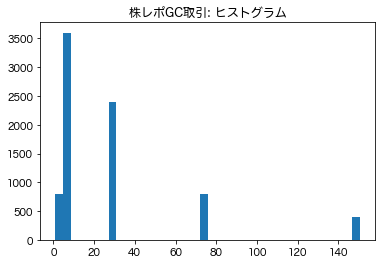

In [42]:
gc_trade_num = 8000
gc_ave_security_num_list = (gc_security_num_dist.T['min'] + gc_security_num_dist.T['max']) / 2
gc_security_num_sample = [[ave]*int(gc_security_num_dist.T['ratio'][index] * gc_trade_num)  for (index, ave) in enumerate(gc_ave_security_num_list)]

plt.hist(list(itertools.chain.from_iterable(gc_security_num_sample)), bins=40)
plt.title('株レポGC取引: ヒストグラム')

In [43]:
def get_gc_num_df(trade_num):
    gc_security_num_max = gc_security_num_dist['101~']['max']
    gc_security_num_min = gc_security_num_dist['1']['min'] - 1
    mock_gc_security_num_df = pd.DataFrame(np.ceil(np.random.triangular(gc_security_num_min, gc_security_num_ave, gc_security_num_max, trade_num)), dtype=int)
    mock_gc_security_num_df.hist(bins=100, figsize=(30, 20), xlabelsize=20, ylabelsize=20)
    plt.title('株レポGC取引: 擬似データ分布（三角分布）')
    return mock_gc_security_num_df

,0
0,106
1,114
2,121
3,39
4,105
...,...
1753,148
1754,138
1755,56
1756,111


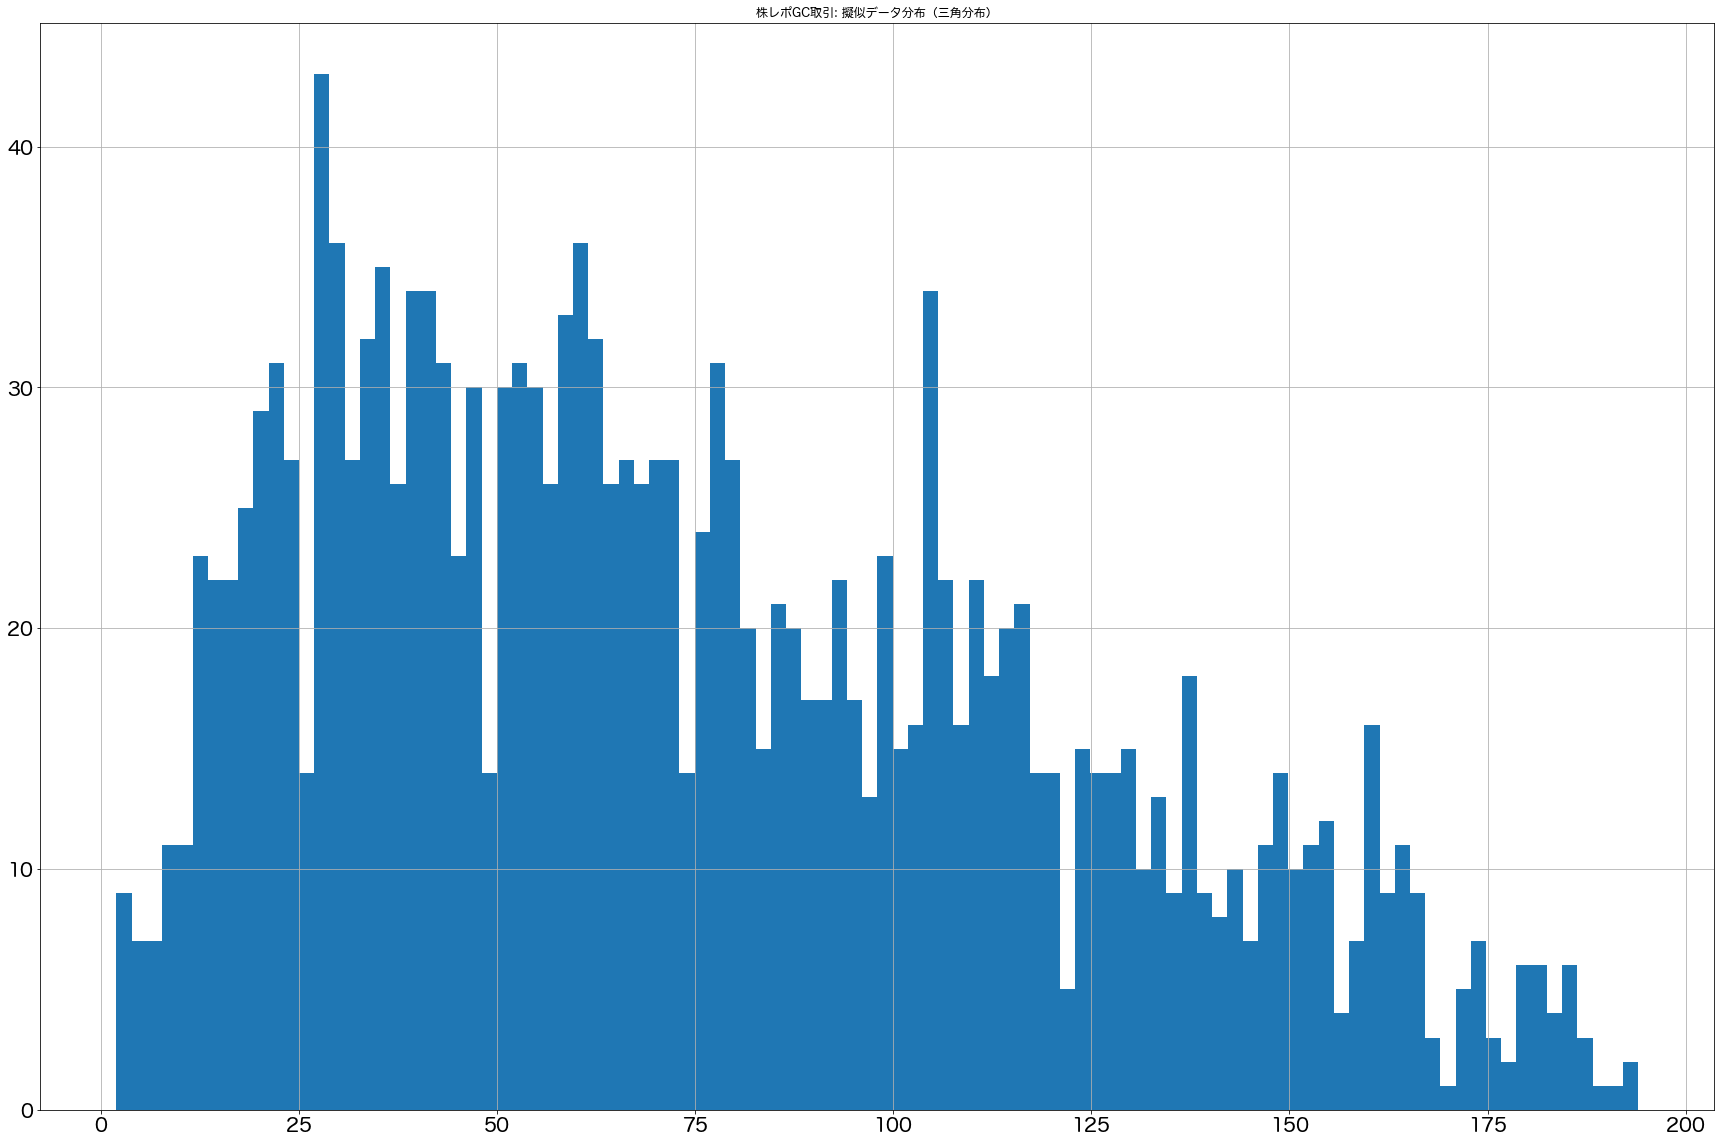

In [45]:
# 三角分布で類似分布を作成
get_gc_num_df(b_security_nums['100%']['stock'])

{'100%': {'gc':         0
  0      72
  1      95
  2      56
  3     107
  4     167
  ...   ...
  6193   57
  6194   29
  6195   42
  6196   82
  6197   46
  
  [6198 rows x 1 columns]},
 '150%': {'gc':         0
  0      31
  1      33
  2      33
  3     138
  4      42
  ...   ...
  9292  115
  9293   68
  9294   25
  9295   49
  9296  147
  
  [9297 rows x 1 columns]},
 '50%': {'gc':         0
  0      22
  1      25
  2     100
  3      77
  4      28
  ...   ...
  3094   28
  3095   44
  3096   37
  3097   29
  3098   99
  
  [3099 rows x 1 columns]},
 '30%': {'gc':         0
  0      74
  1      86
  2      30
  3      45
  4      26
  ...   ...
  1855   72
  1856  107
  1857  111
  1858  117
  1859   38
  
  [1860 rows x 1 columns]},
 '25%': {'gc':         0
  0     111
  1      68
  2      27
  3     125
  4       8
  ...   ...
  1545  131
  1546  152
  1547   47
  1548  124
  1549    8
  
  [1550 rows x 1 columns]},
 '15%': {'gc':        0
  0     21
  1     71
  2     84
 

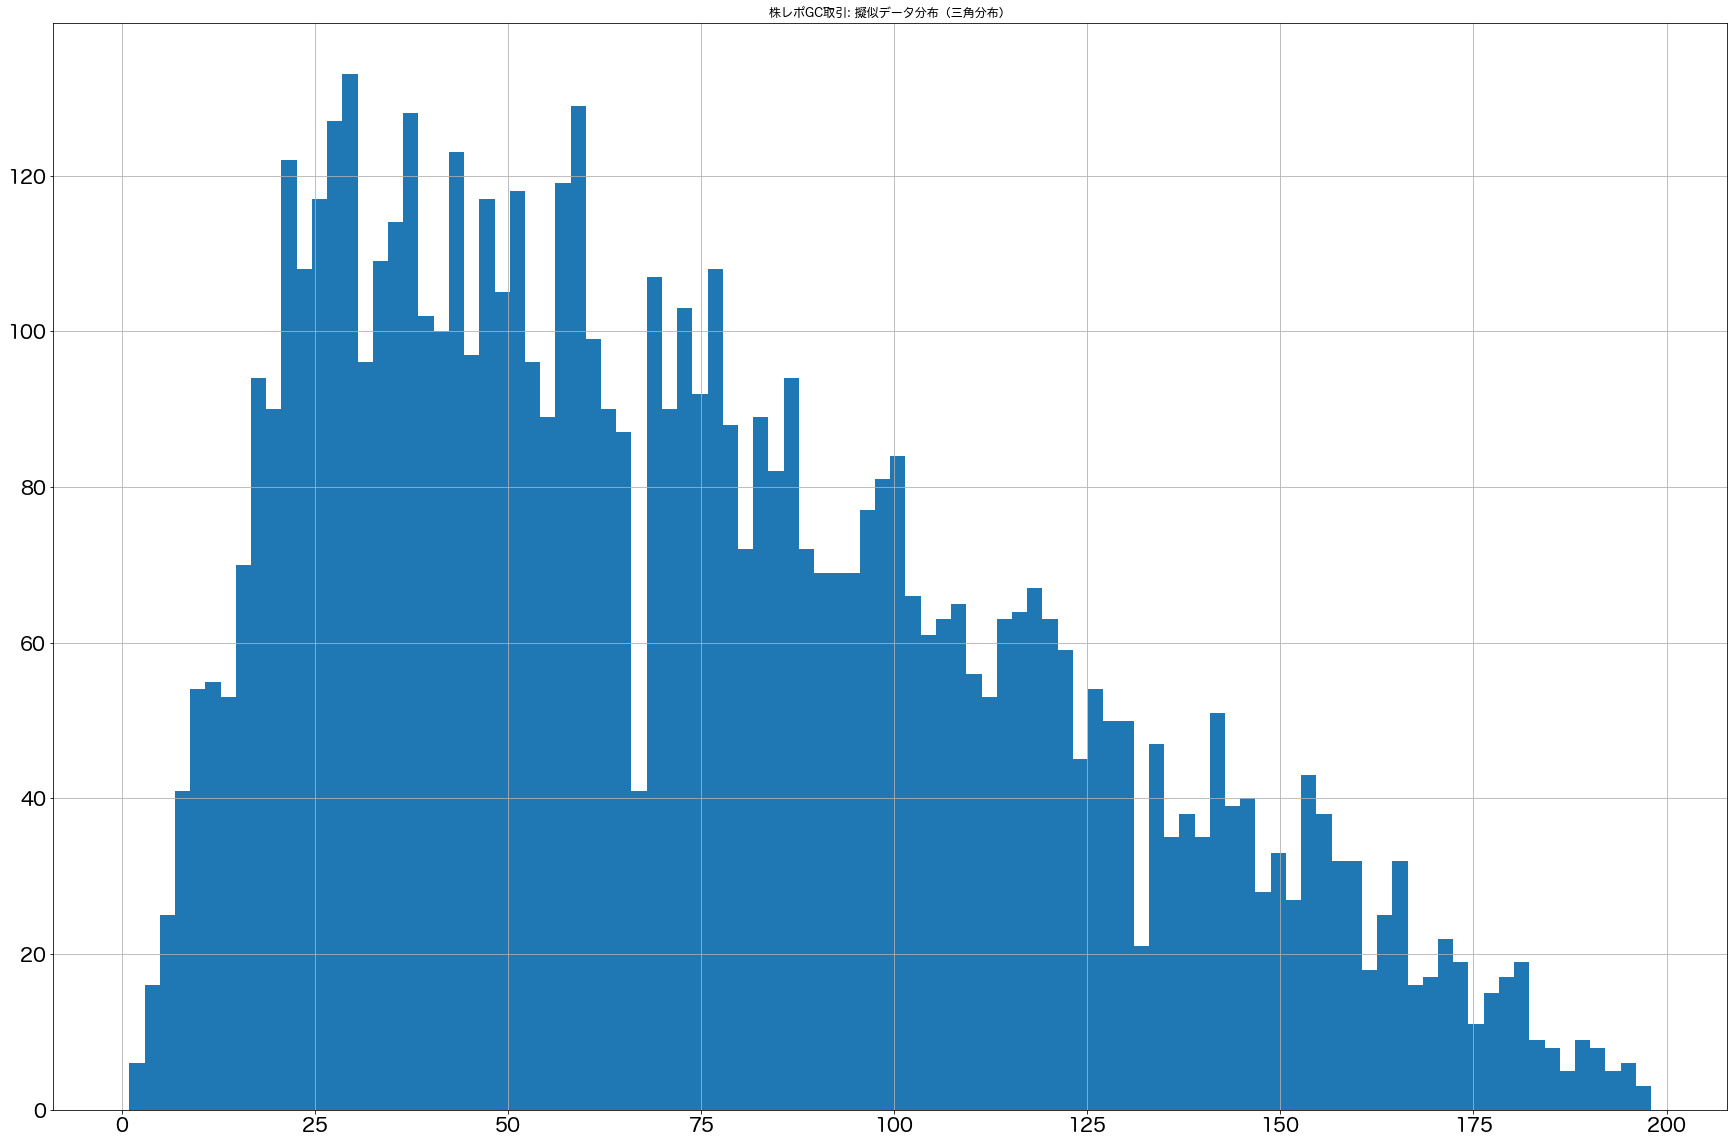

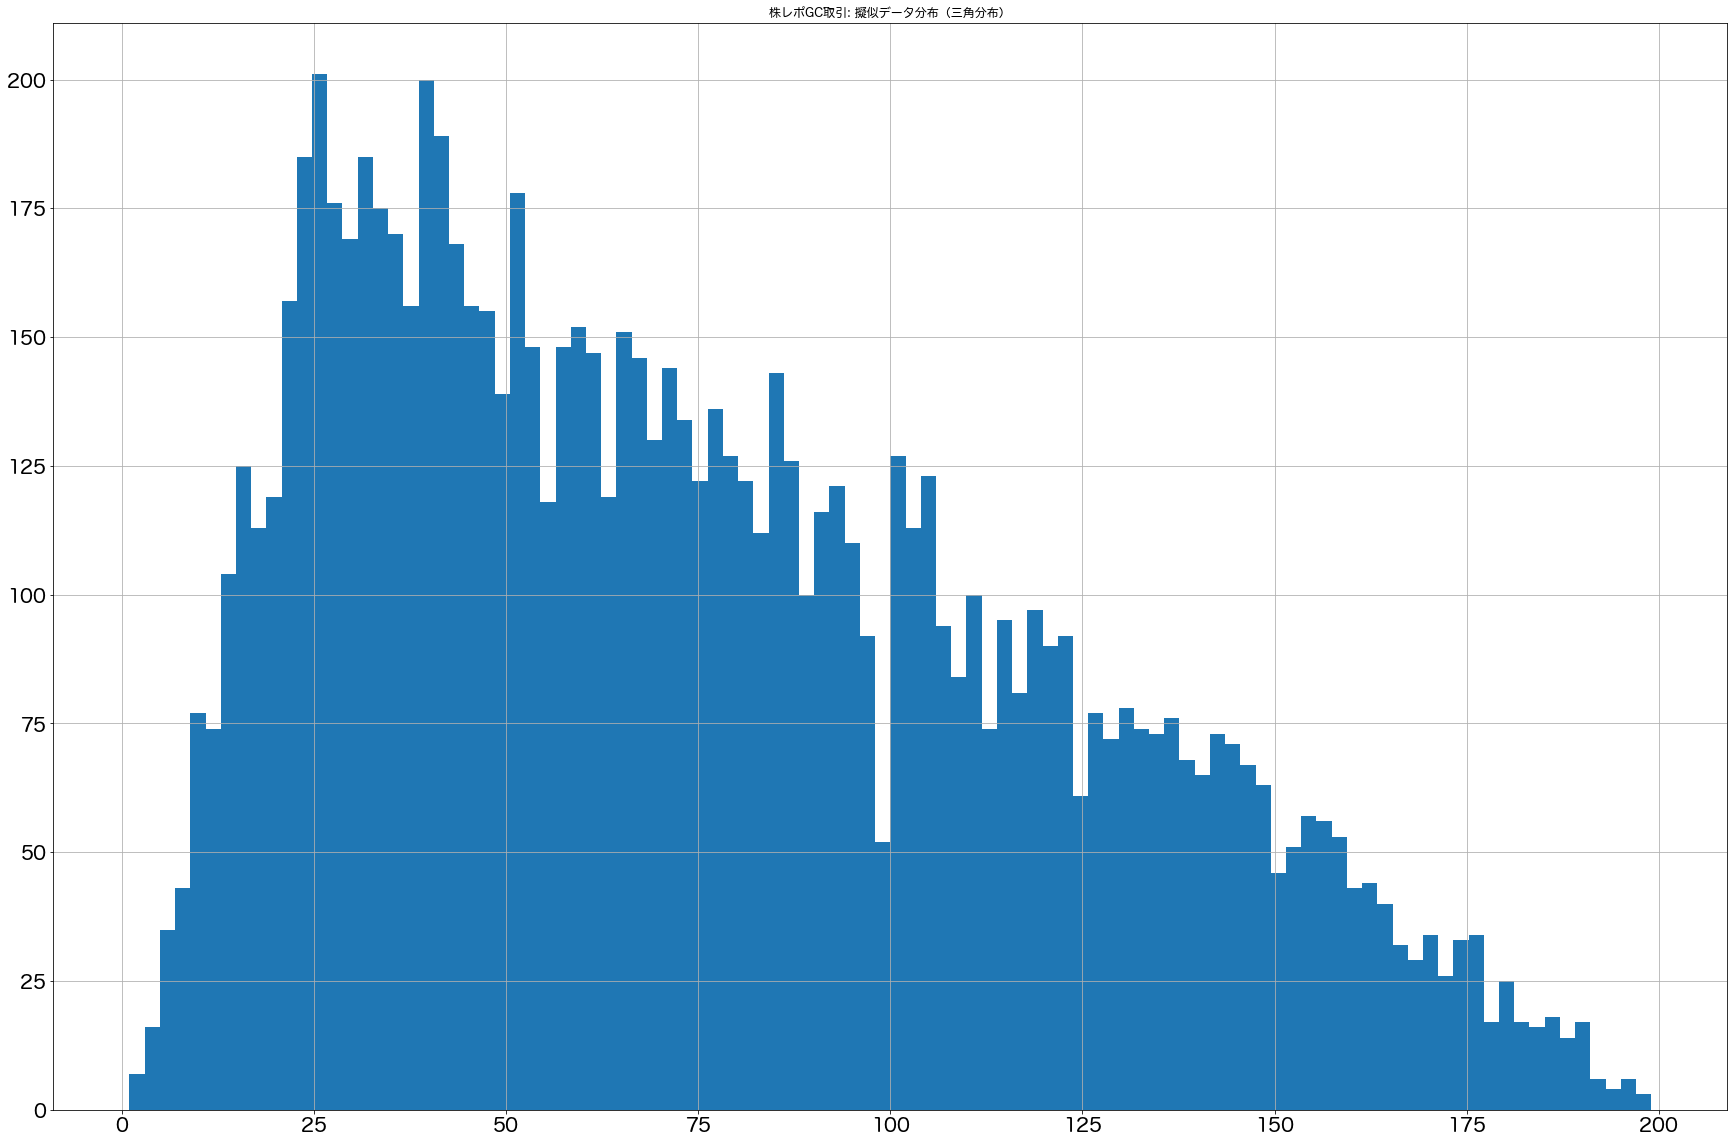

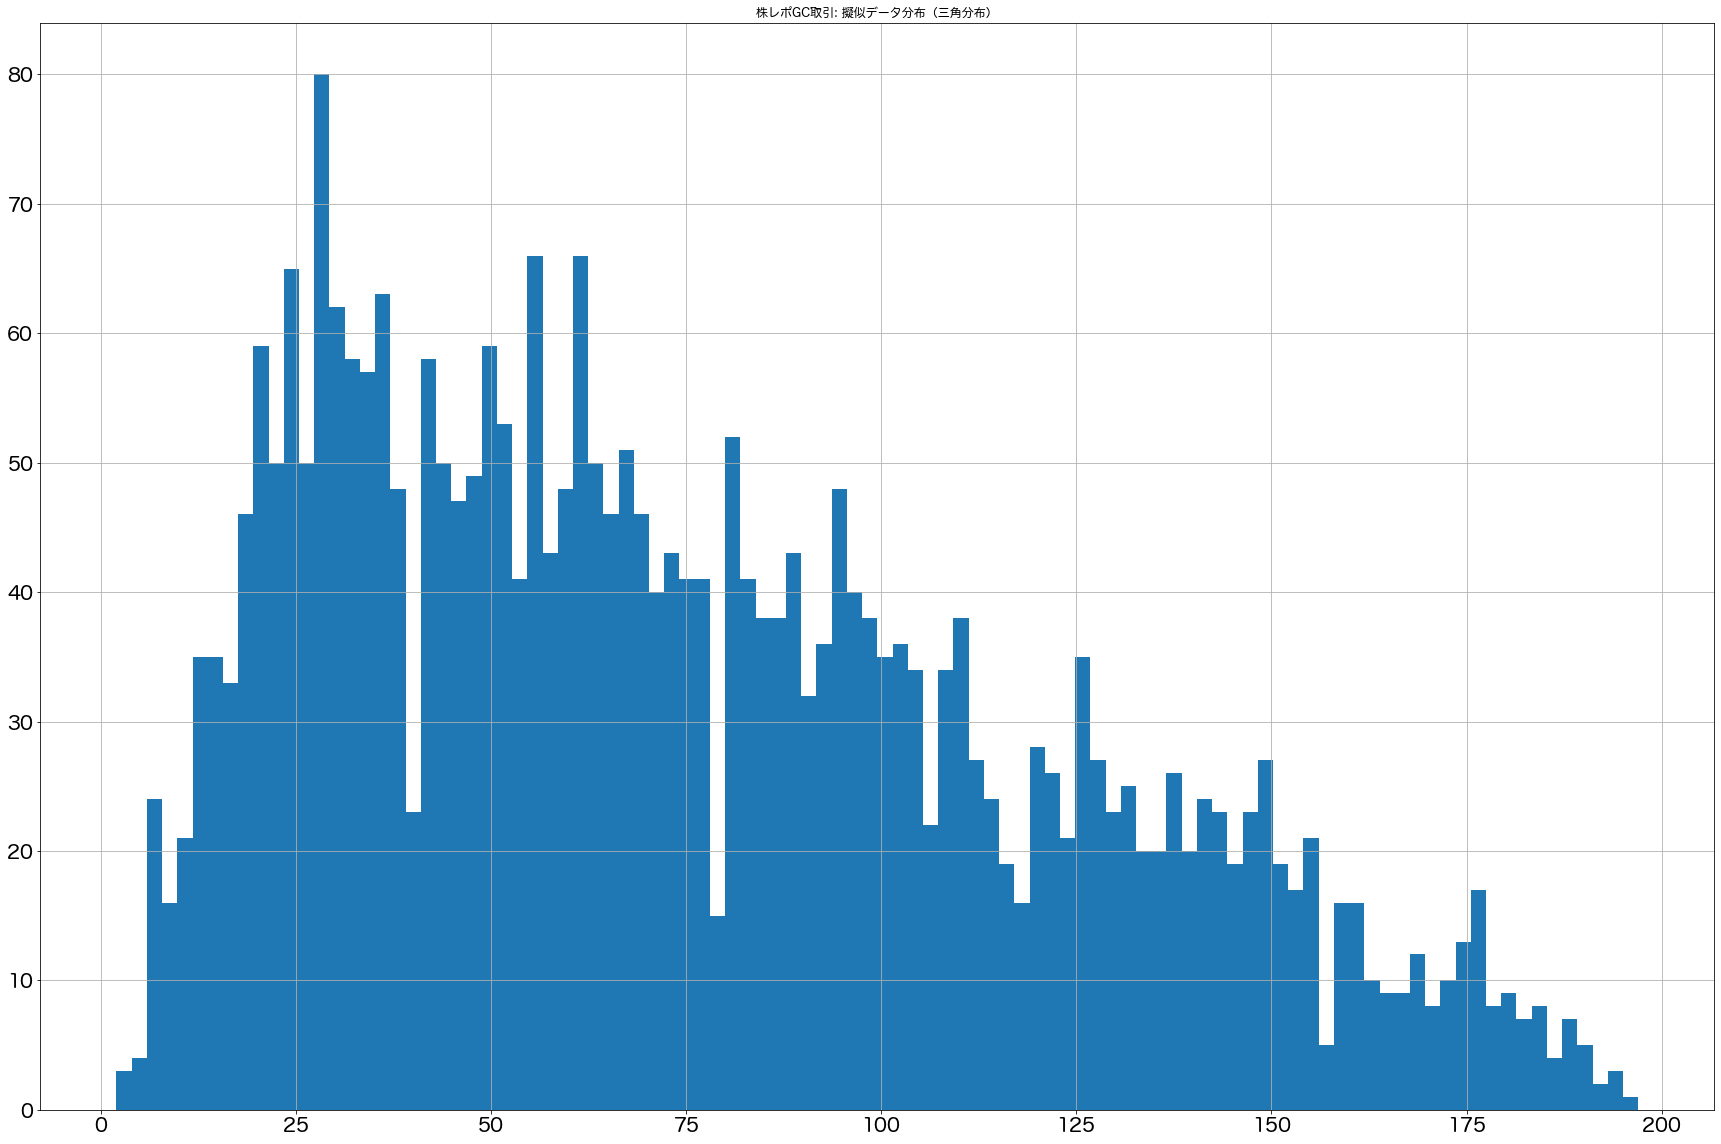

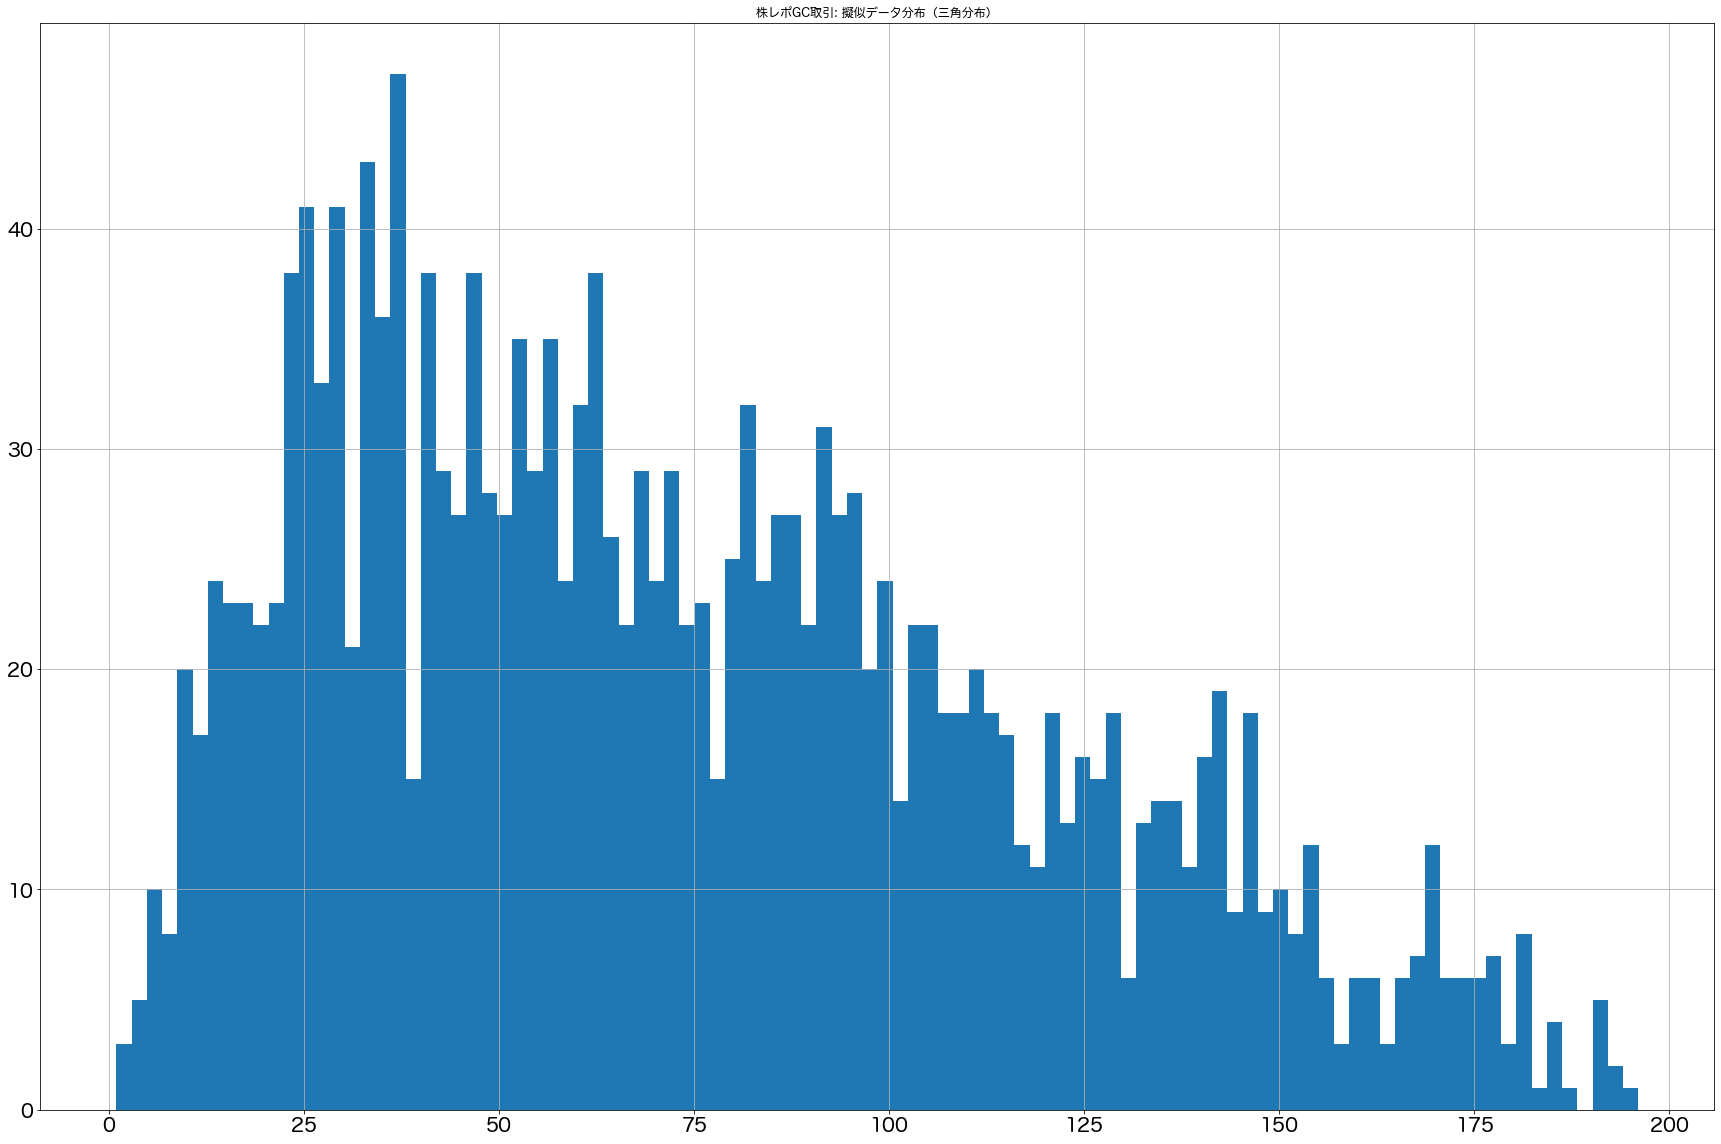

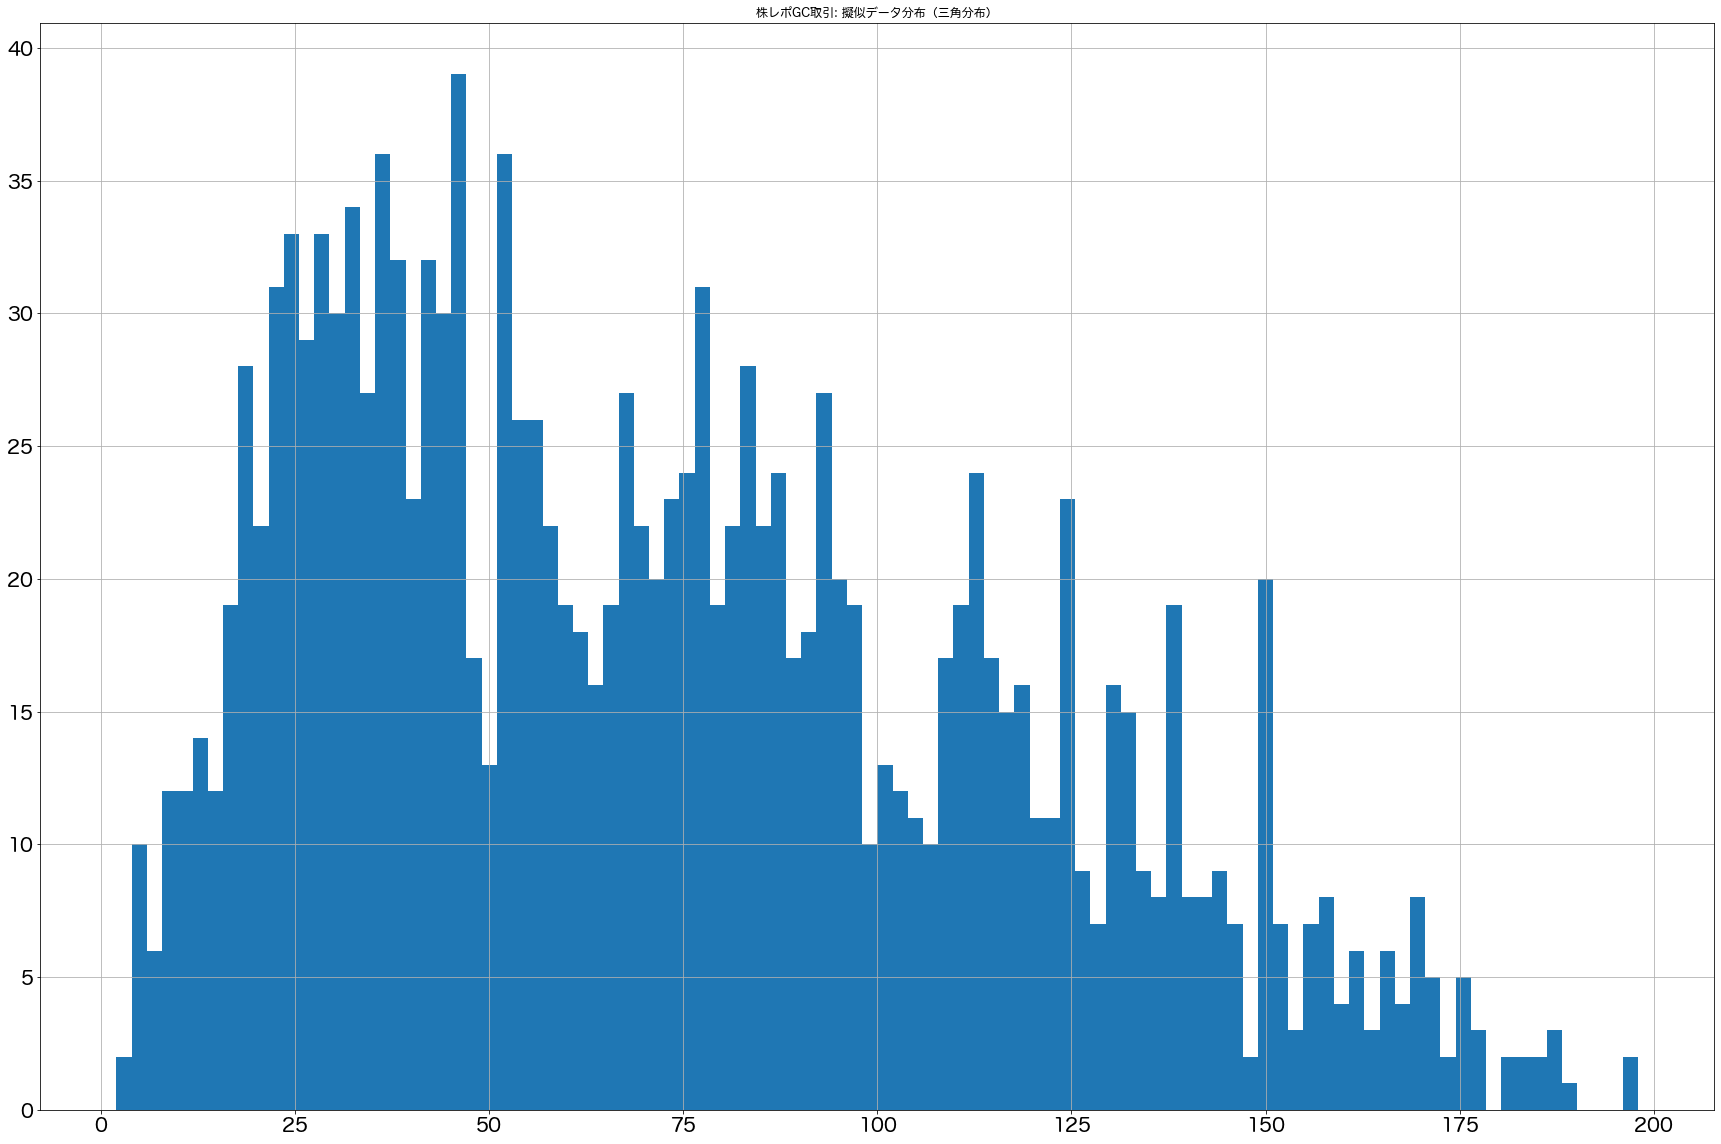

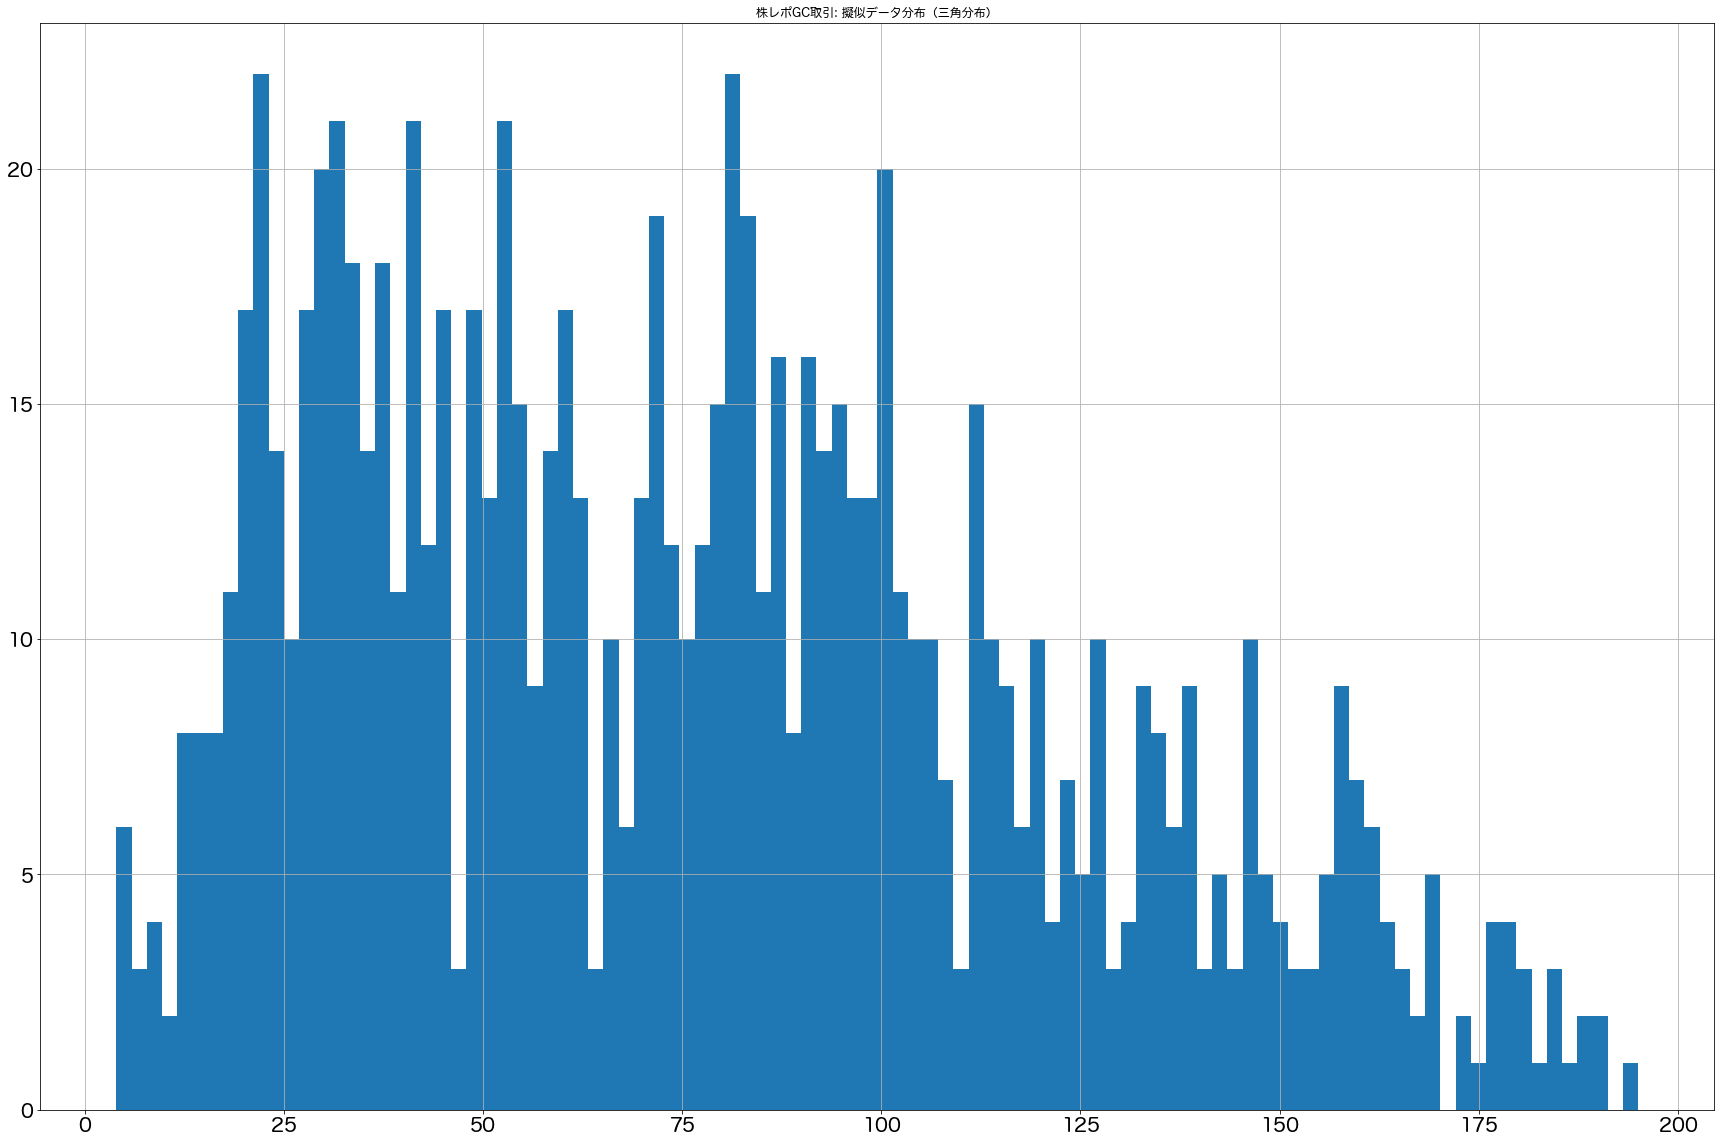

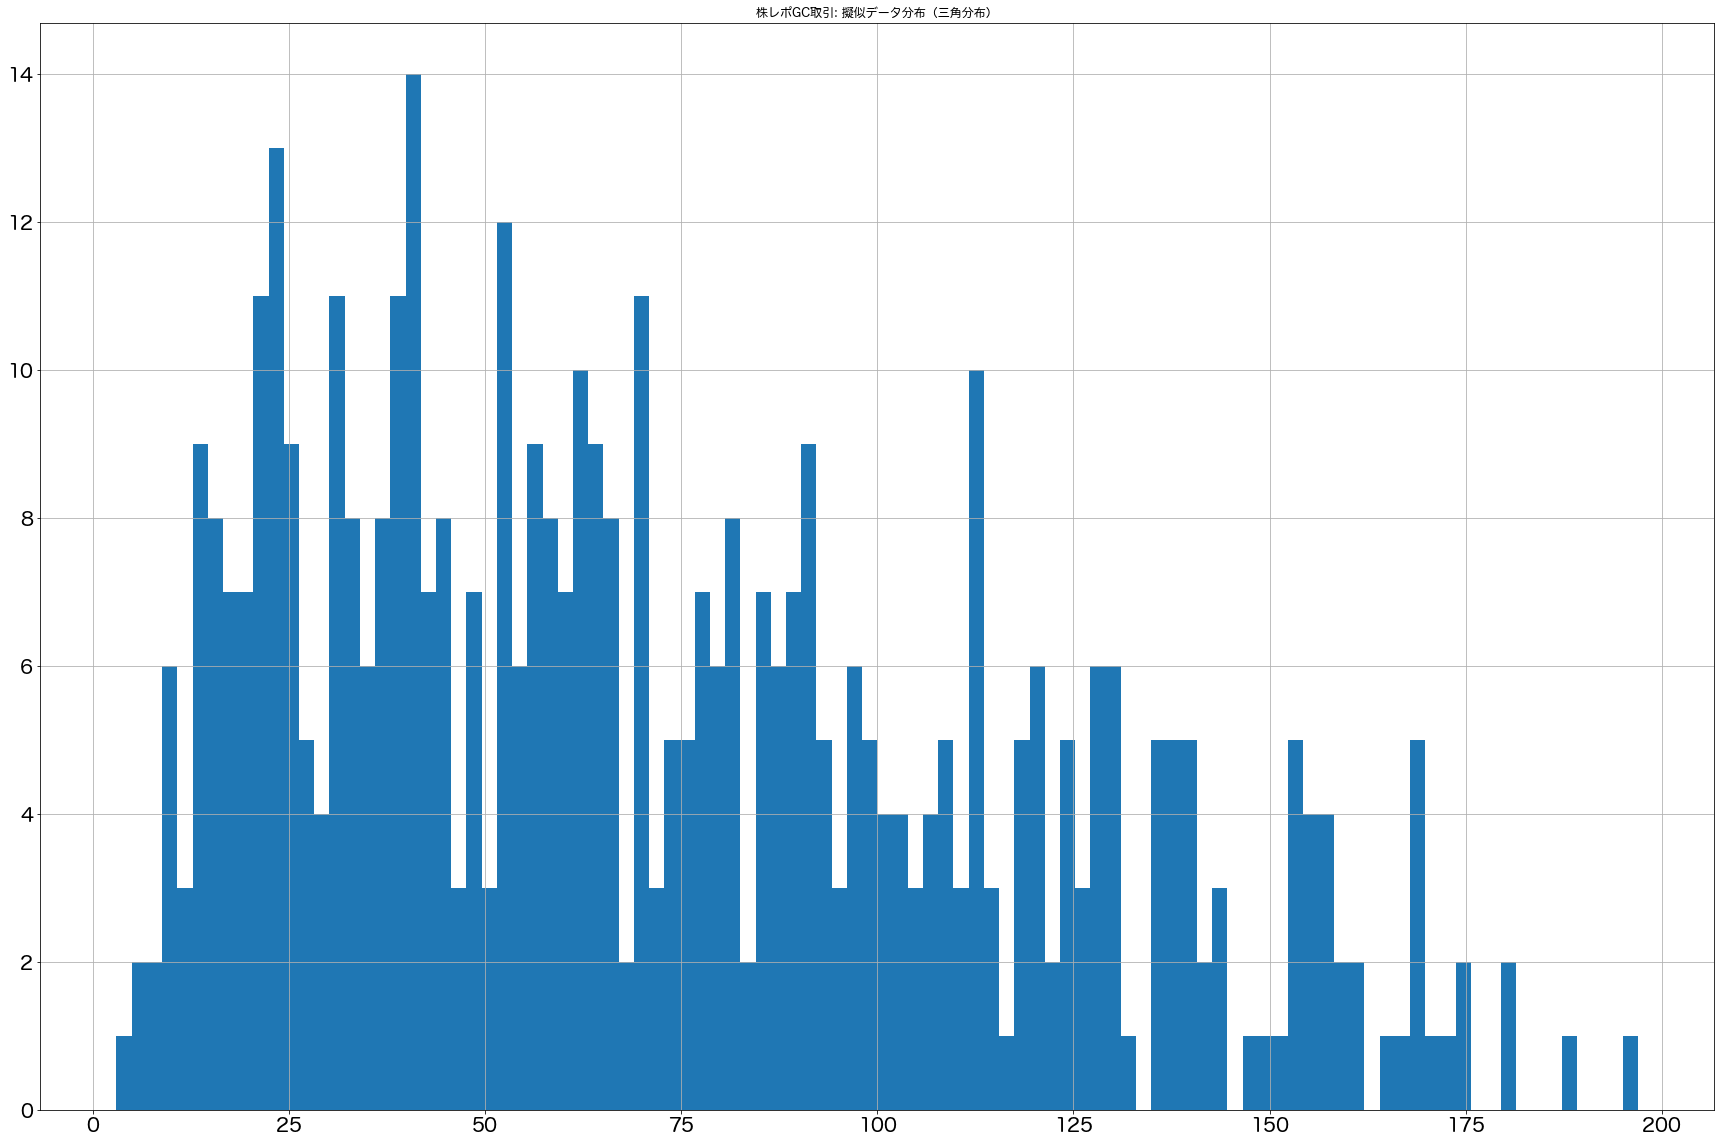

In [87]:
for _key, _value in b_trade_nums.items():
    _num = _value['gc']
    all_security_num_dfs[_key]['gc'] = get_gc_num_df(_num)
all_security_num_dfs

#### SC取引

株レポ: SC取引銘柄数
          1   2~10  11~50  51~100   101~
ratio  0.54   0.36    0.1       0    0.0
min    1.00   2.00   11.0      51  101.0
max    1.00  10.00   50.0     100  200.0
'=================================================='


Text(0.5, 1.0, '株レポSC取引: 銘柄数')

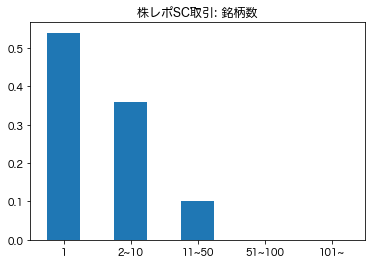

In [46]:
sc_security_num_dist = pd.DataFrame([[0.54, 0.36, 0.1, 0, 0.], [1, 2, 11, 51, 101], [1, 10, 50, 100, 200]],
                             columns=security_num_column_labels,
                             index=['ratio', 'min', 'max'])
sc_security_num_ave = 4.05
print('株レポ: SC取引銘柄数')
pprint(sc_security_num_dist)
pprint('='*50)

sc_security_num_dist.T['ratio'].plot(kind='bar', rot=0)
plt.title('株レポSC取引: 銘柄数')

Text(0.5, 1.0, '株レポSC取引: ヒストグラム')

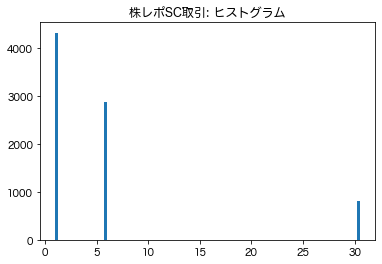

In [47]:
sc_trade_num = 8000
sc_ave_security_num_list = (sc_security_num_dist.T['min'] + sc_security_num_dist.T['max']) / 2
sc_security_num_sample = [[ave]*int(sc_security_num_dist.T['ratio'][index] * sc_trade_num)  for (index, ave) in enumerate(sc_ave_security_num_list)]

plt.hist(list(itertools.chain.from_iterable(sc_security_num_sample)), bins=100)
plt.title('株レポSC取引: ヒストグラム')

In [48]:
def get_sc_num_df(trade_num):
    sc_security_num_max = sc_security_num_dist['101~']['max']
    sc_security_num_min = sc_security_num_dist['1']['min'] - 1
    _nums = []
    for i in range(trade_num):
        _nums.append(np.random.choice(a=[1, np.random.randint(2, 11), np.random.randint(11, 51)],  p=[0.54, 0.36, 0.1]))
       
    mock_sc_security_num_df = pd.DataFrame(_nums, dtype=int)
    mock_sc_security_num_df.hist(bins=100, figsize=(30, 20), xlabelsize=20, ylabelsize=20)
    plt.title('株レポSC取引: 擬似データ分布')
    return mock_sc_security_num_df

,0
0,1
1,8
2,1
3,1
4,1
...,...
1753,1
1754,19
1755,1
1756,3


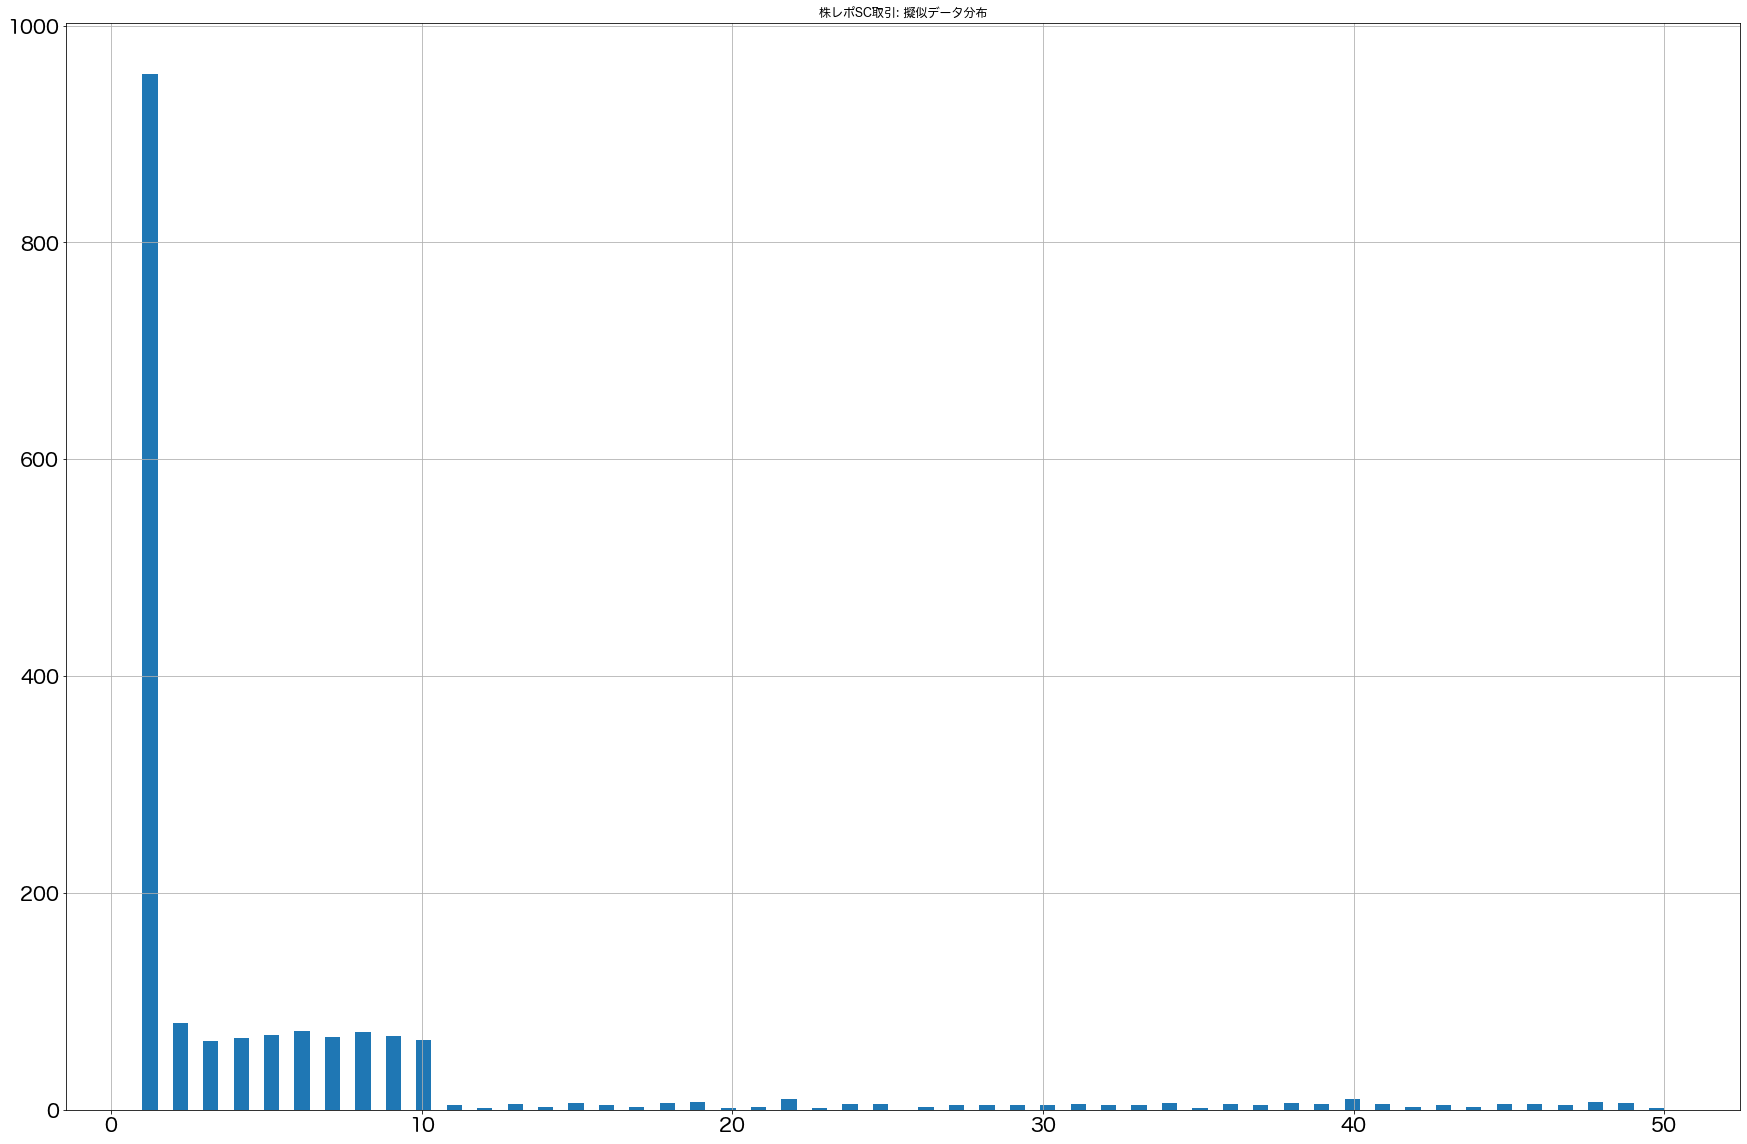

In [51]:
get_sc_num_df(b_security_nums['100%']['stock'])

{'100%': {'gc':         0
  0      72
  1      95
  2      56
  3     107
  4     167
  ...   ...
  6193   57
  6194   29
  6195   42
  6196   82
  6197   46
  
  [6198 rows x 1 columns],
  'sc':        0
  0      1
  1      1
  2      1
  3      2
  4      1
  ...   ..
  40082  1
  40083  1
  40084  1
  40085  1
  40086  1
  
  [40087 rows x 1 columns]},
 '150%': {'gc':         0
  0      31
  1      33
  2      33
  3     138
  4      42
  ...   ...
  9292  115
  9293   68
  9294   25
  9295   49
  9296  147
  
  [9297 rows x 1 columns],
  'sc':        0
  0      2
  1      2
  2      1
  3      8
  4      6
  ...   ..
  60126  1
  60127  1
  60128  1
  60129  4
  60130  1
  
  [60131 rows x 1 columns]},
 '50%': {'gc':         0
  0      22
  1      25
  2     100
  3      77
  4      28
  ...   ...
  3094   28
  3095   44
  3096   37
  3097   29
  3098   99
  
  [3099 rows x 1 columns],
  'sc':         0
  0      28
  1       1
  2       1
  3       6
  4       1
  ...    ..
  20039

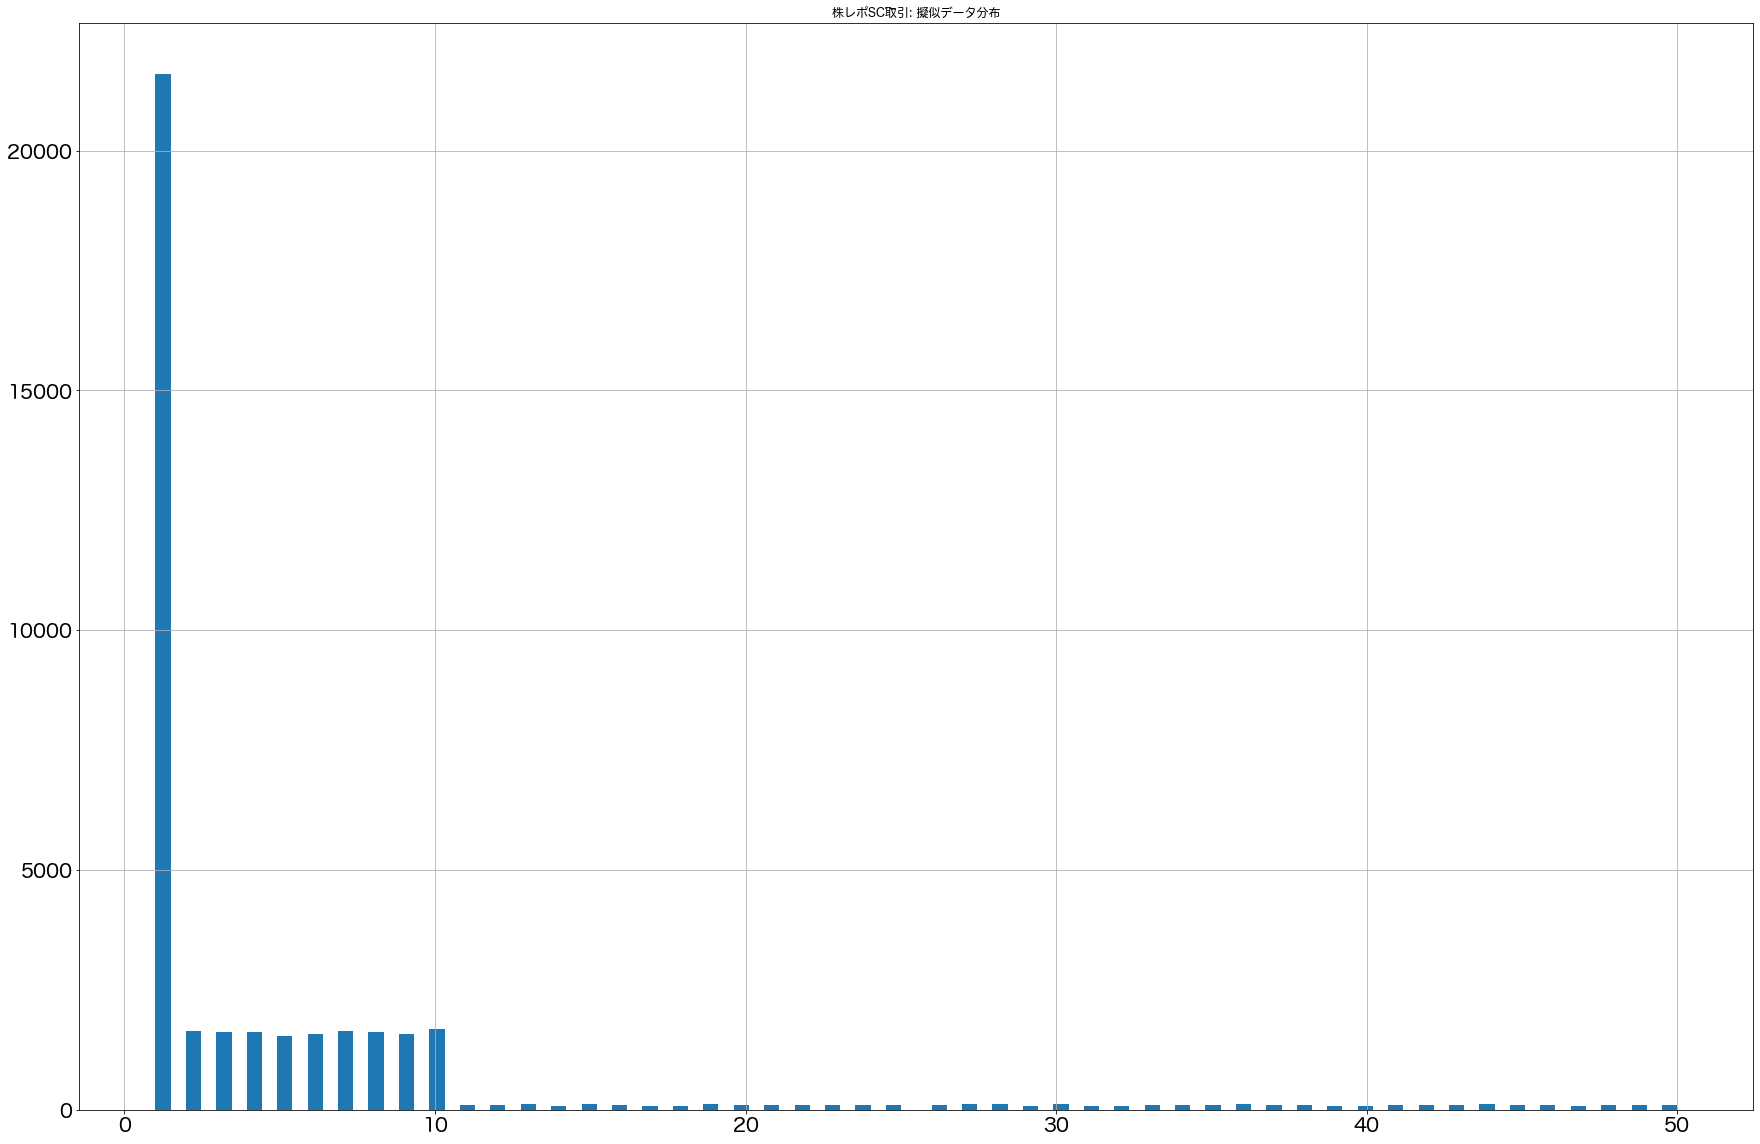

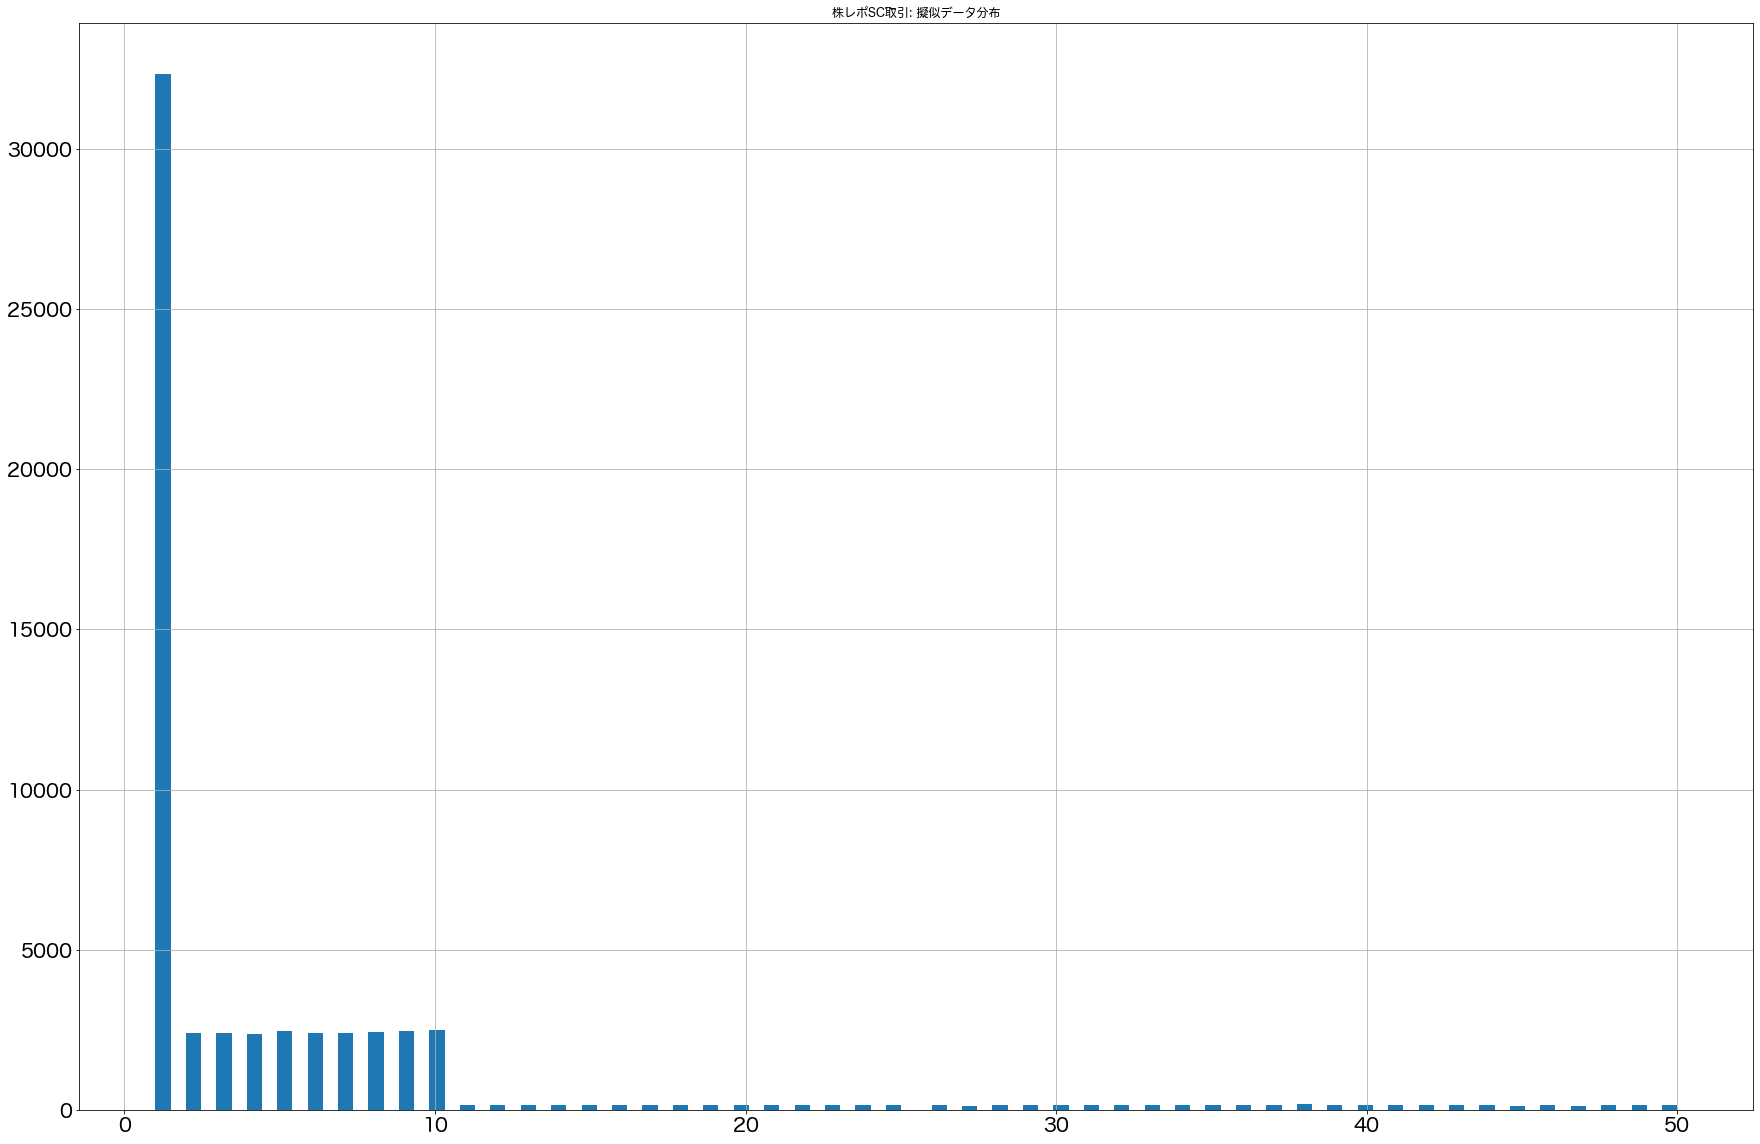

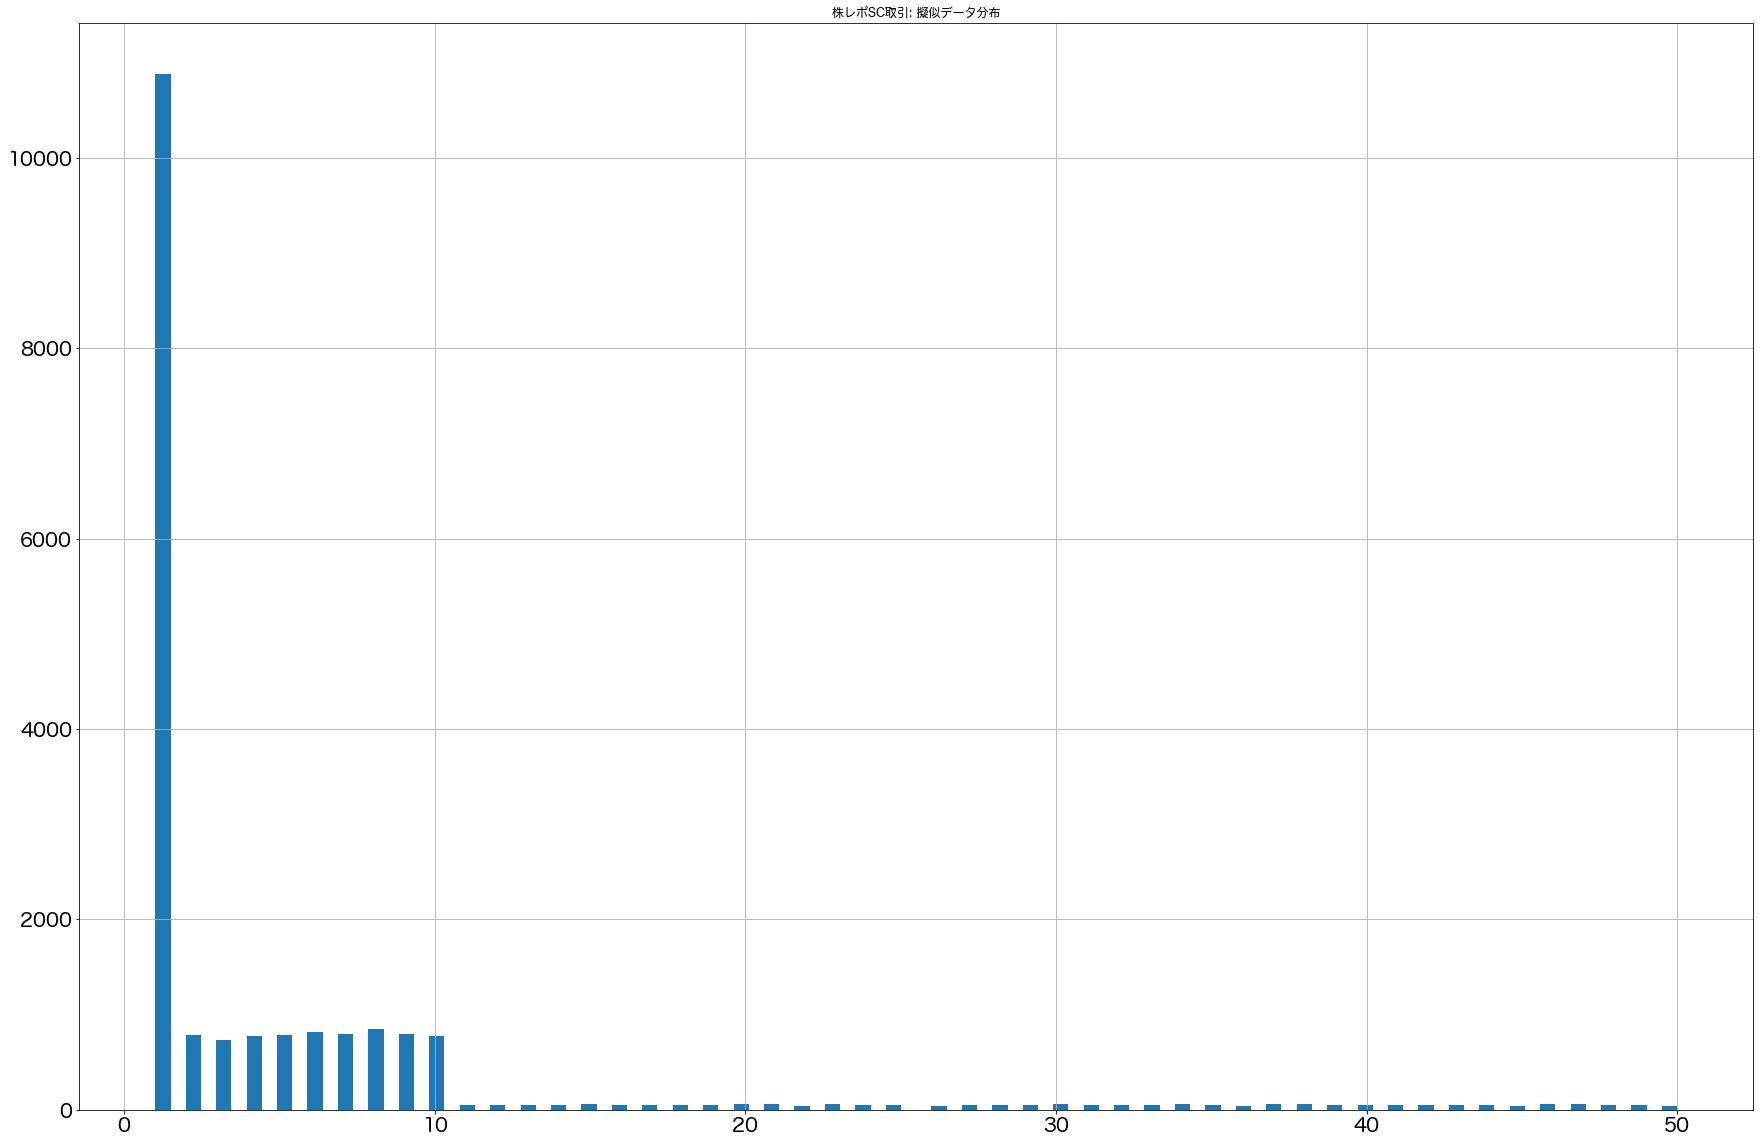

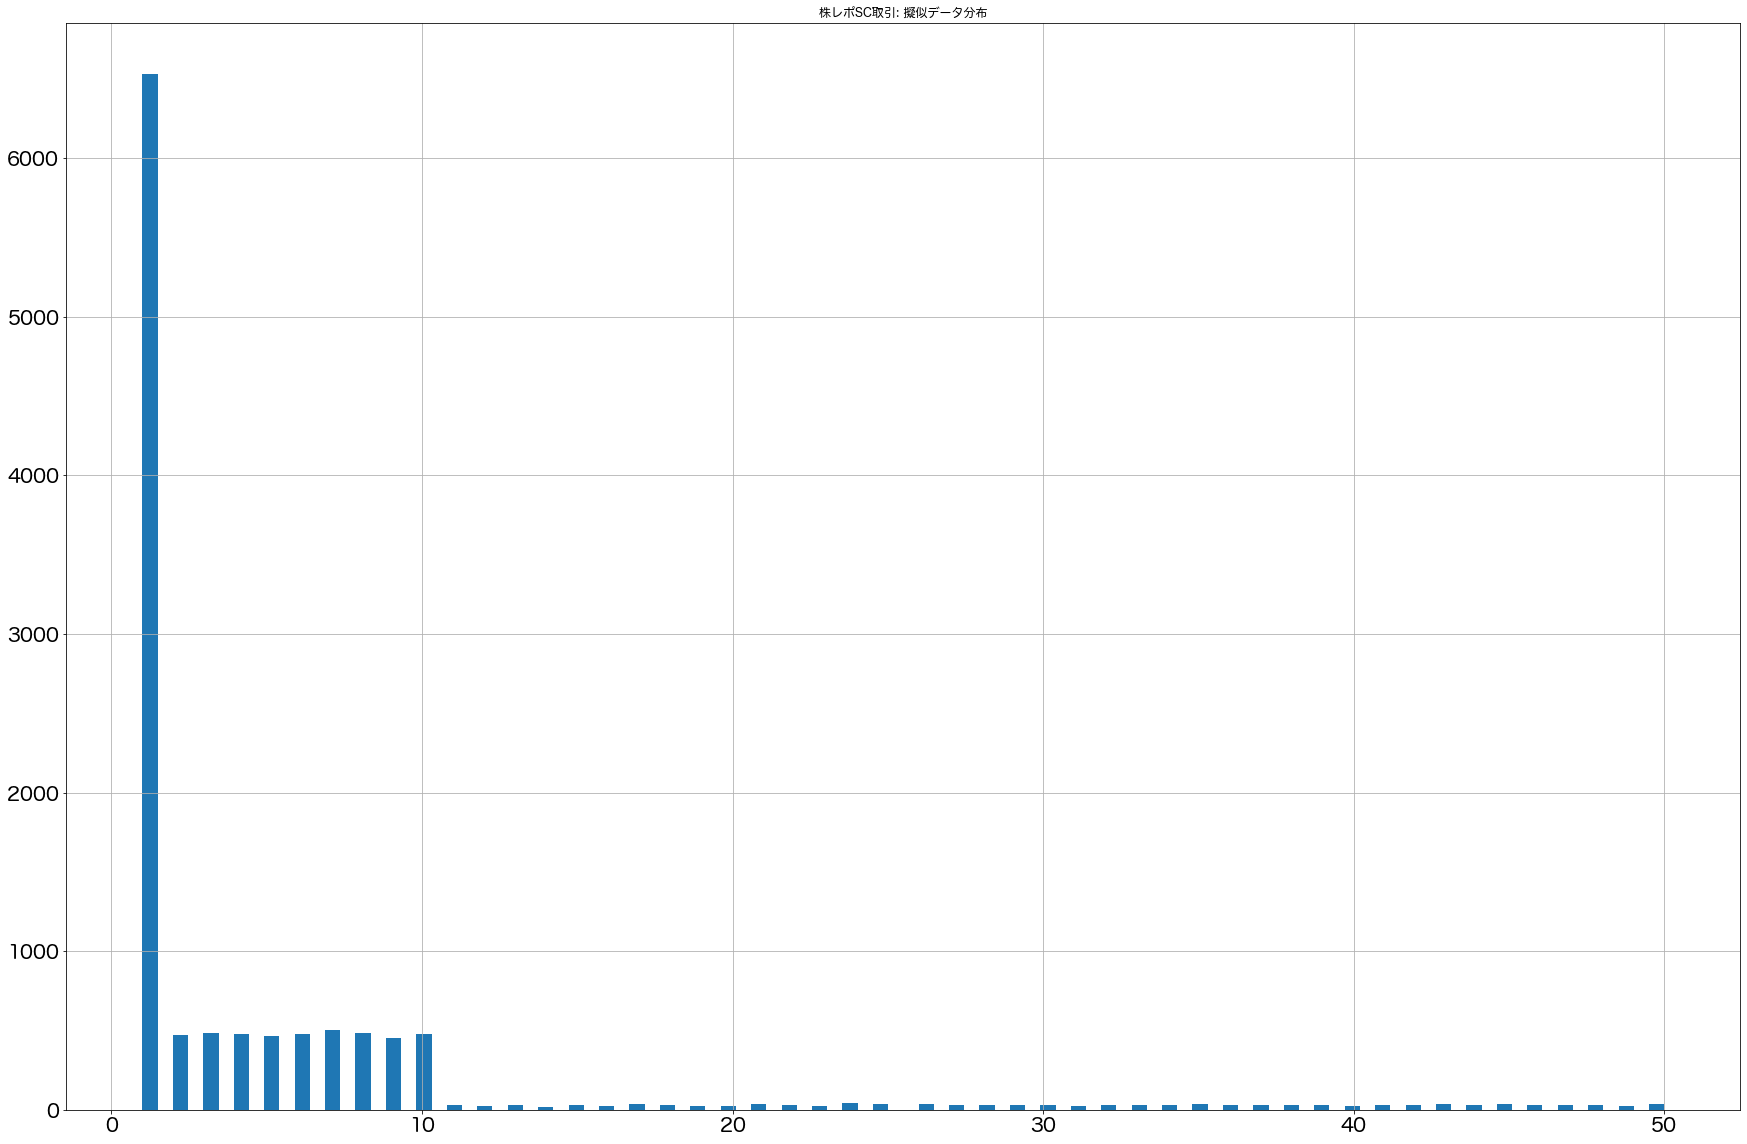

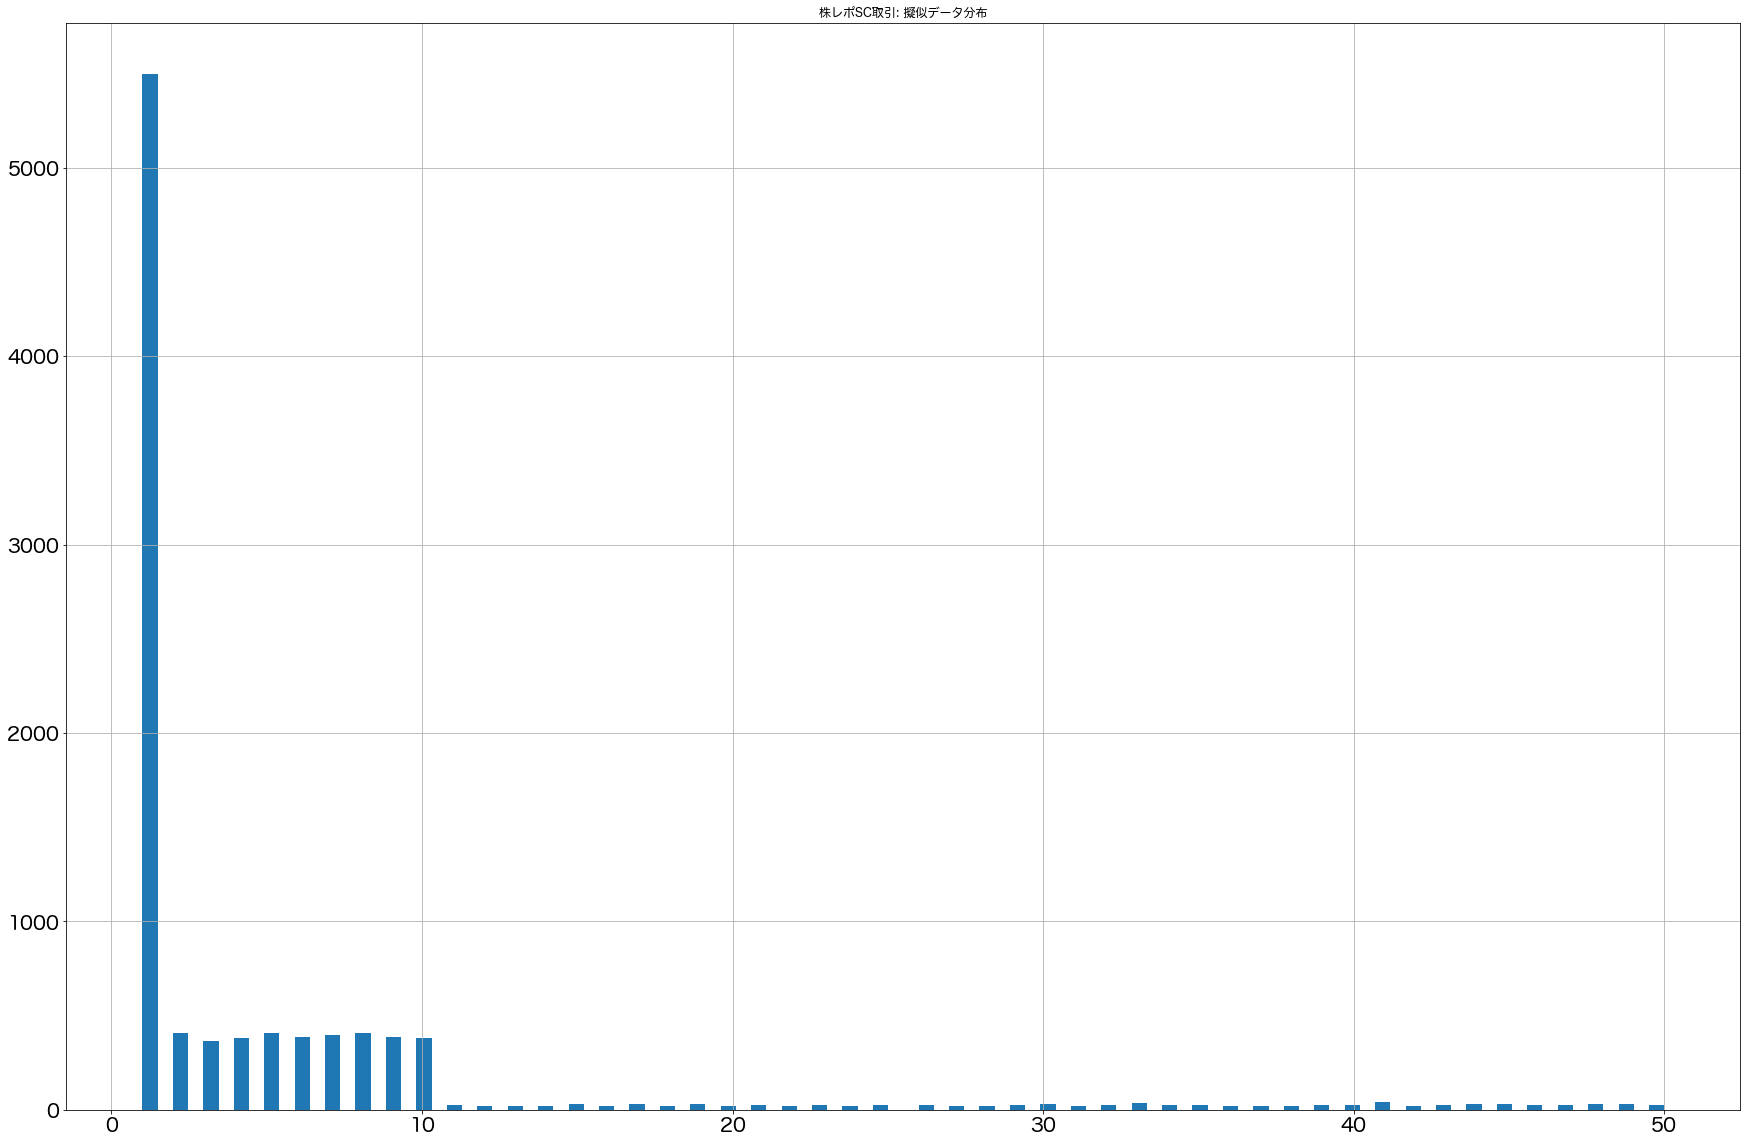

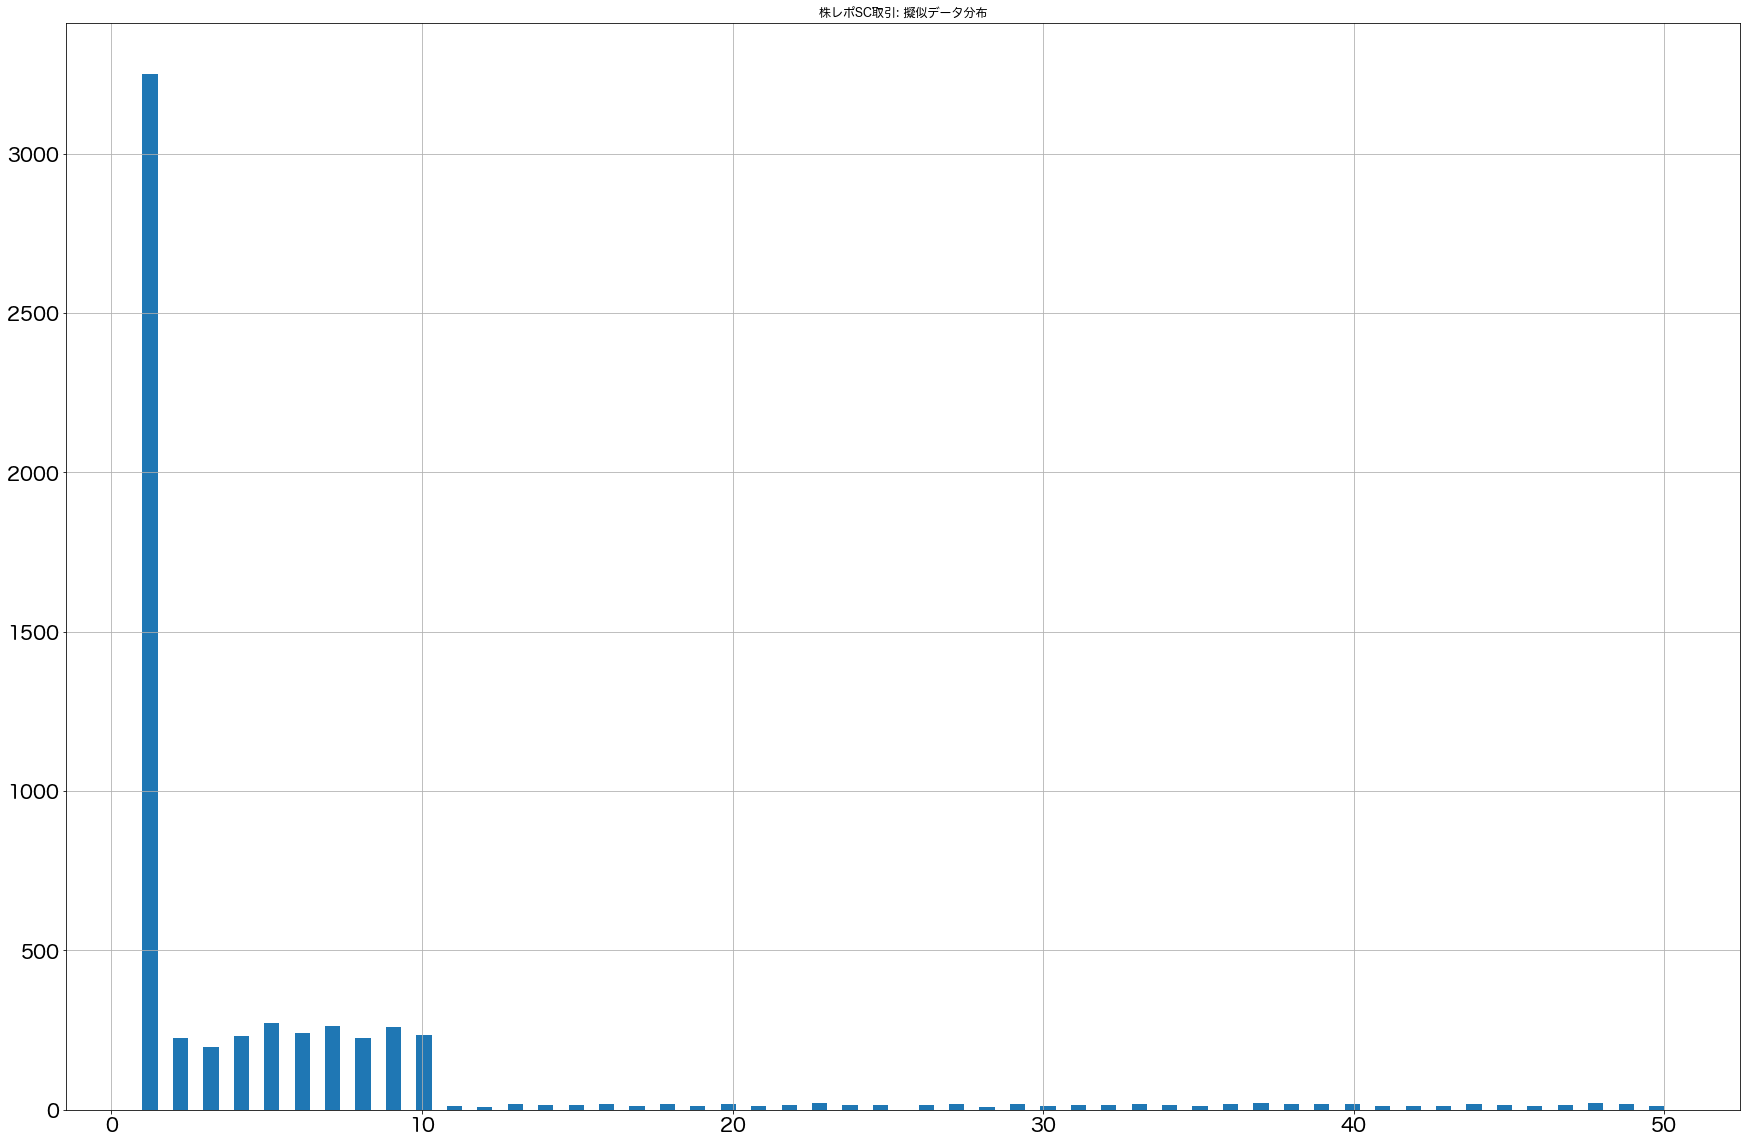

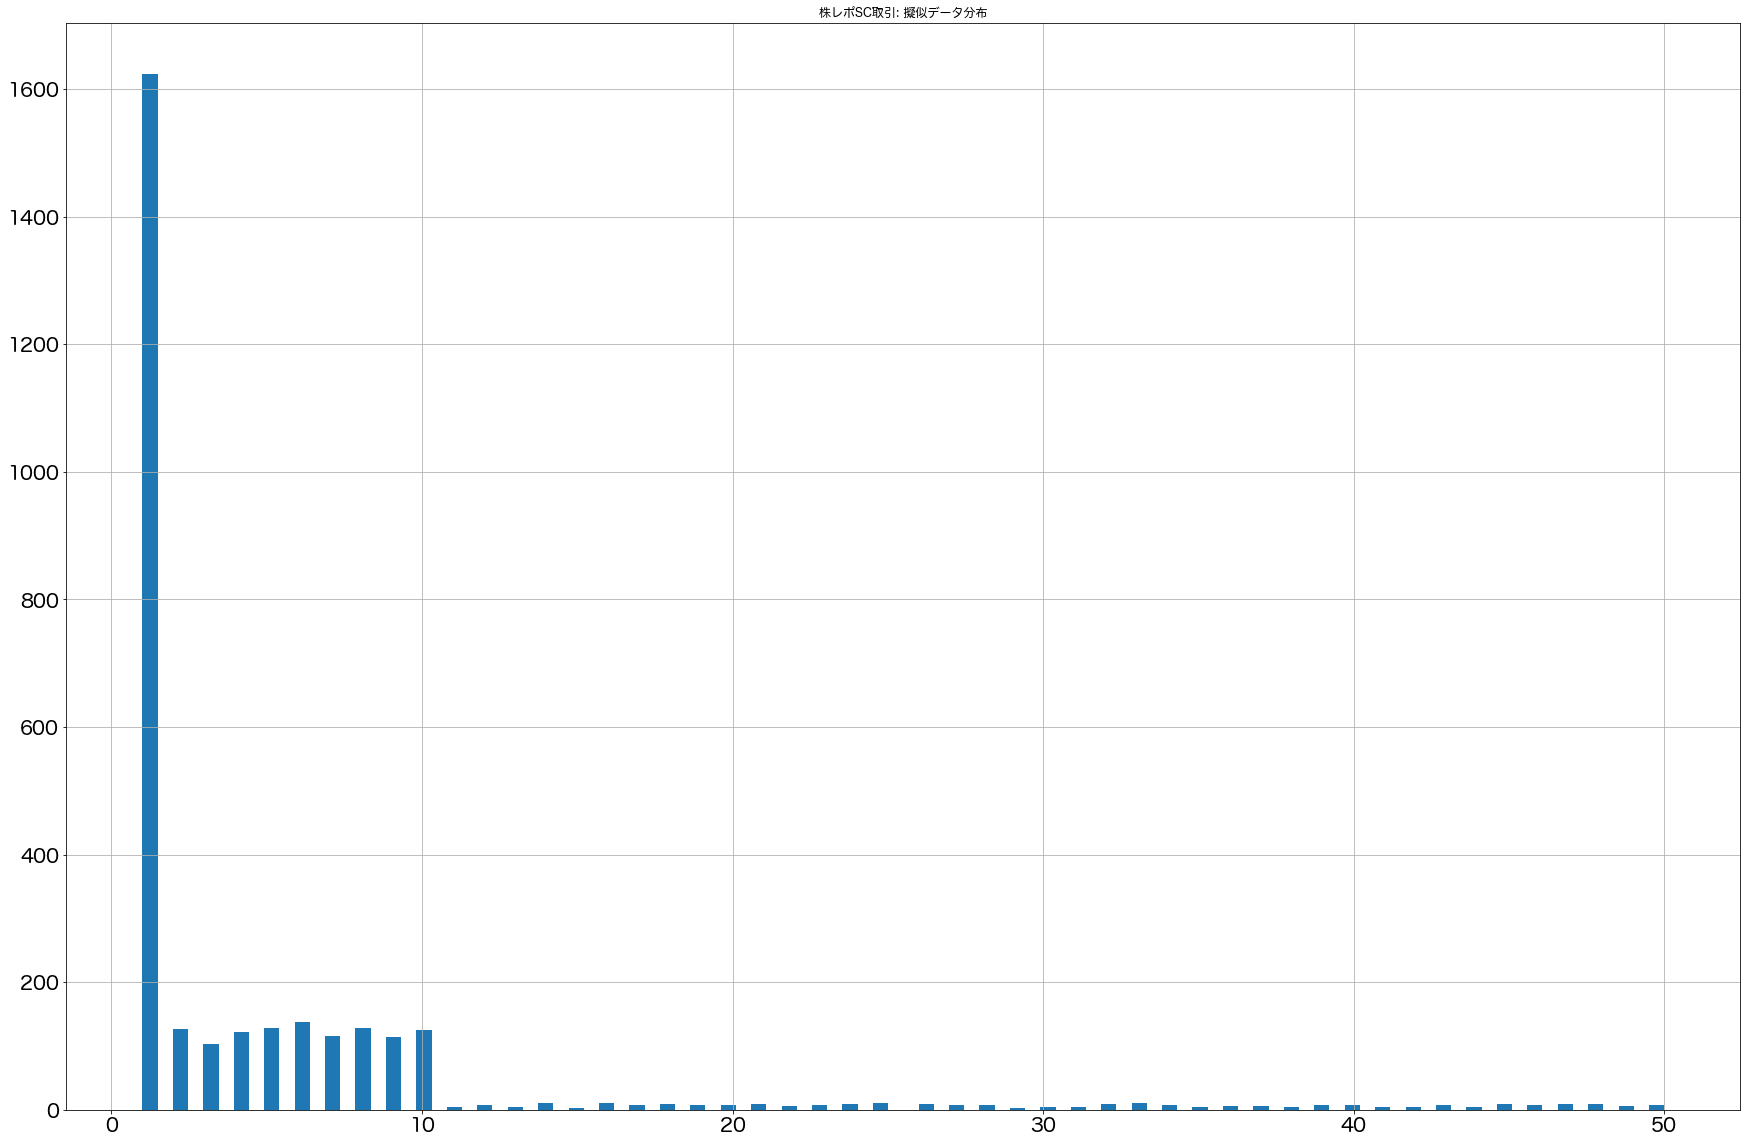

In [88]:
for _key, _value in b_trade_nums.items():
    _num = _value['sc']
    all_security_num_dfs[_key]['sc'] = get_sc_num_df(_num)
all_security_num_dfs

#### 債券レポ

債券レポ: 取引銘柄数
          1   2-5   6-10  11-50
ratio  0.69  0.27   0.03   0.01
min    1.00  2.00   6.00  11.00
max    1.00  5.00  10.00  30.00
'=================================================='


Text(0.5, 1.0, '債券レポ取引: 銘柄数')

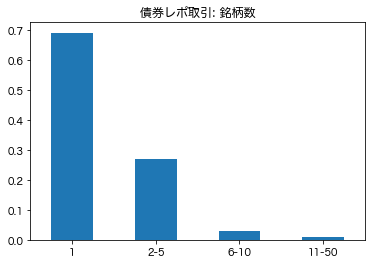

In [52]:
bond_security_num_dist = pd.DataFrame([[0.69, 0.27, 0.03, 0.01], [1, 2, 6, 11], [1, 5, 10, 30]],
                             columns=['1', '2-5', '6-10', '11-50'],
                             index=['ratio', 'min', 'max'])
bond_security_num_ave = 1.87
print('債券レポ: 取引銘柄数')
pprint(bond_security_num_dist)
pprint('='*50)

bond_security_num_dist.T['ratio'].plot(kind='bar', rot=0)
plt.title('債券レポ取引: 銘柄数')

Text(0.5, 1.0, '再建レポ取引: ヒストグラム')

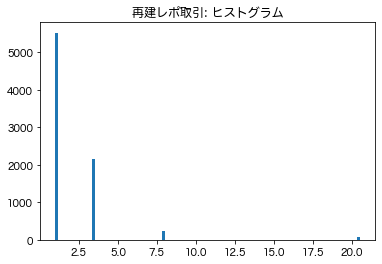

In [53]:
bond_trade_num = 8000
bond_ave_security_num_list = (bond_security_num_dist.T['min'] + bond_security_num_dist.T['max']) / 2
bond_security_num_sample = [[ave]*int(bond_security_num_dist.T['ratio'][index] * bond_trade_num)  for (index, ave) in enumerate(bond_ave_security_num_list)]

plt.hist(list(itertools.chain.from_iterable(bond_security_num_sample)), bins=100)
plt.title('再建レポ取引: ヒストグラム')

In [54]:
def get_bond_num_df(trade_num):
    bond_security_num_max = bond_security_num_dist['11-50']['max']
    bond_security_num_min = bond_security_num_dist['1']['min'] - 1
    _nums = []
    for i in range(trade_num):
        _nums.append(np.random.choice(a=[1, np.random.randint(2, 6), np.random.randint(6, 11), np.random.randint(11, 51)],  p=[0.69, 0.27, 0.03, 0.01]))
       
    mock_bond_security_num_df = pd.DataFrame(_nums, dtype=int)
    mock_bond_security_num_df.hist(bins=1000, figsize=(30, 20))
    plt.title('債券レポ取引: 擬似データ分布（三角分布）')
    return mock_bond_security_num_df

0    50
dtype: int64

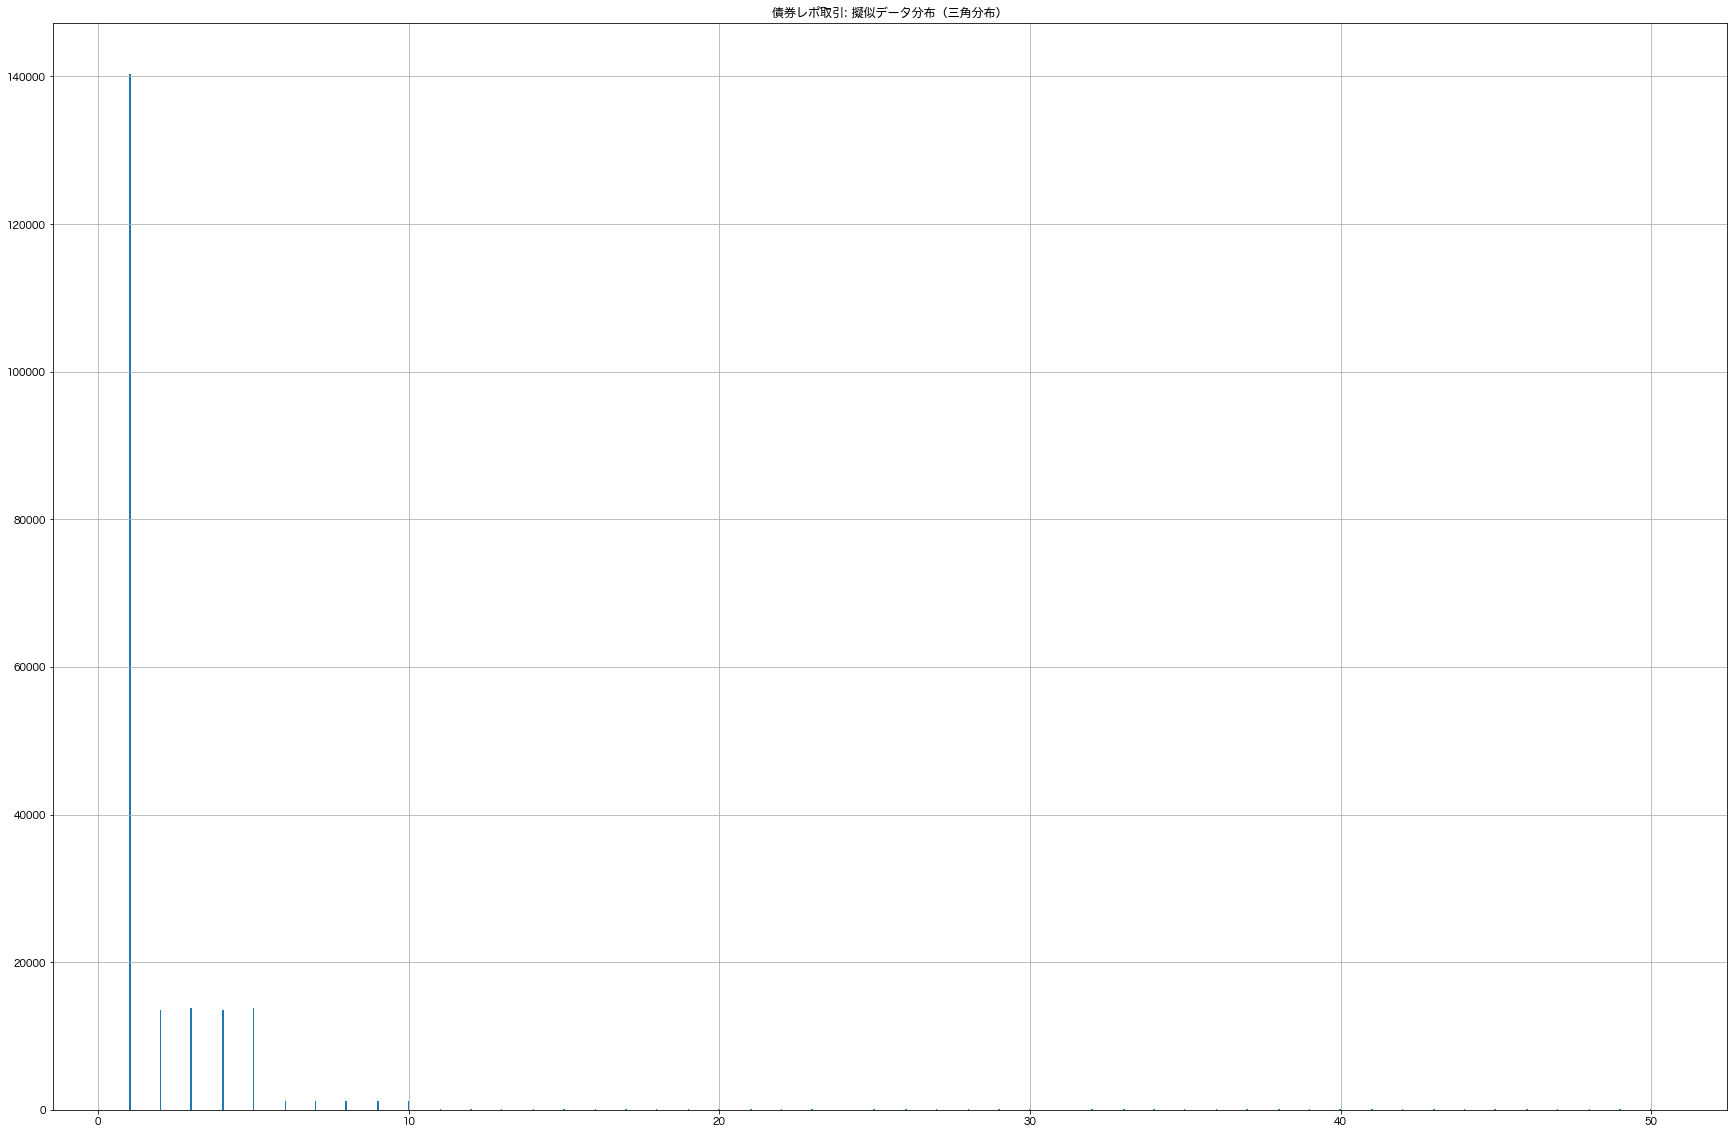

In [55]:
get_bond_num_df(b_trade_nums['100%']['bond']).max()

{'100%': {'gc':         0
  0      72
  1      95
  2      56
  3     107
  4     167
  ...   ...
  6193   57
  6194   29
  6195   42
  6196   82
  6197   46
  
  [6198 rows x 1 columns],
  'sc':        0
  0      1
  1      1
  2      1
  3      2
  4      1
  ...   ..
  40082  1
  40083  1
  40084  1
  40085  1
  40086  1
  
  [40087 rows x 1 columns],
  'bond':         0
  0       1
  1       1
  2       4
  3       1
  4       4
  ...    ..
  203063  1
  203064  1
  203065  1
  203066  1
  203067  4
  
  [203068 rows x 1 columns]},
 '150%': {'gc':         0
  0      31
  1      33
  2      33
  3     138
  4      42
  ...   ...
  9292  115
  9293   68
  9294   25
  9295   49
  9296  147
  
  [9297 rows x 1 columns],
  'sc':        0
  0      2
  1      2
  2      1
  3      8
  4      6
  ...   ..
  60126  1
  60127  1
  60128  1
  60129  4
  60130  1
  
  [60131 rows x 1 columns],
  'bond':         0
  0       1
  1       2
  2       1
  3       1
  4       4
  ...    ..
  304597 

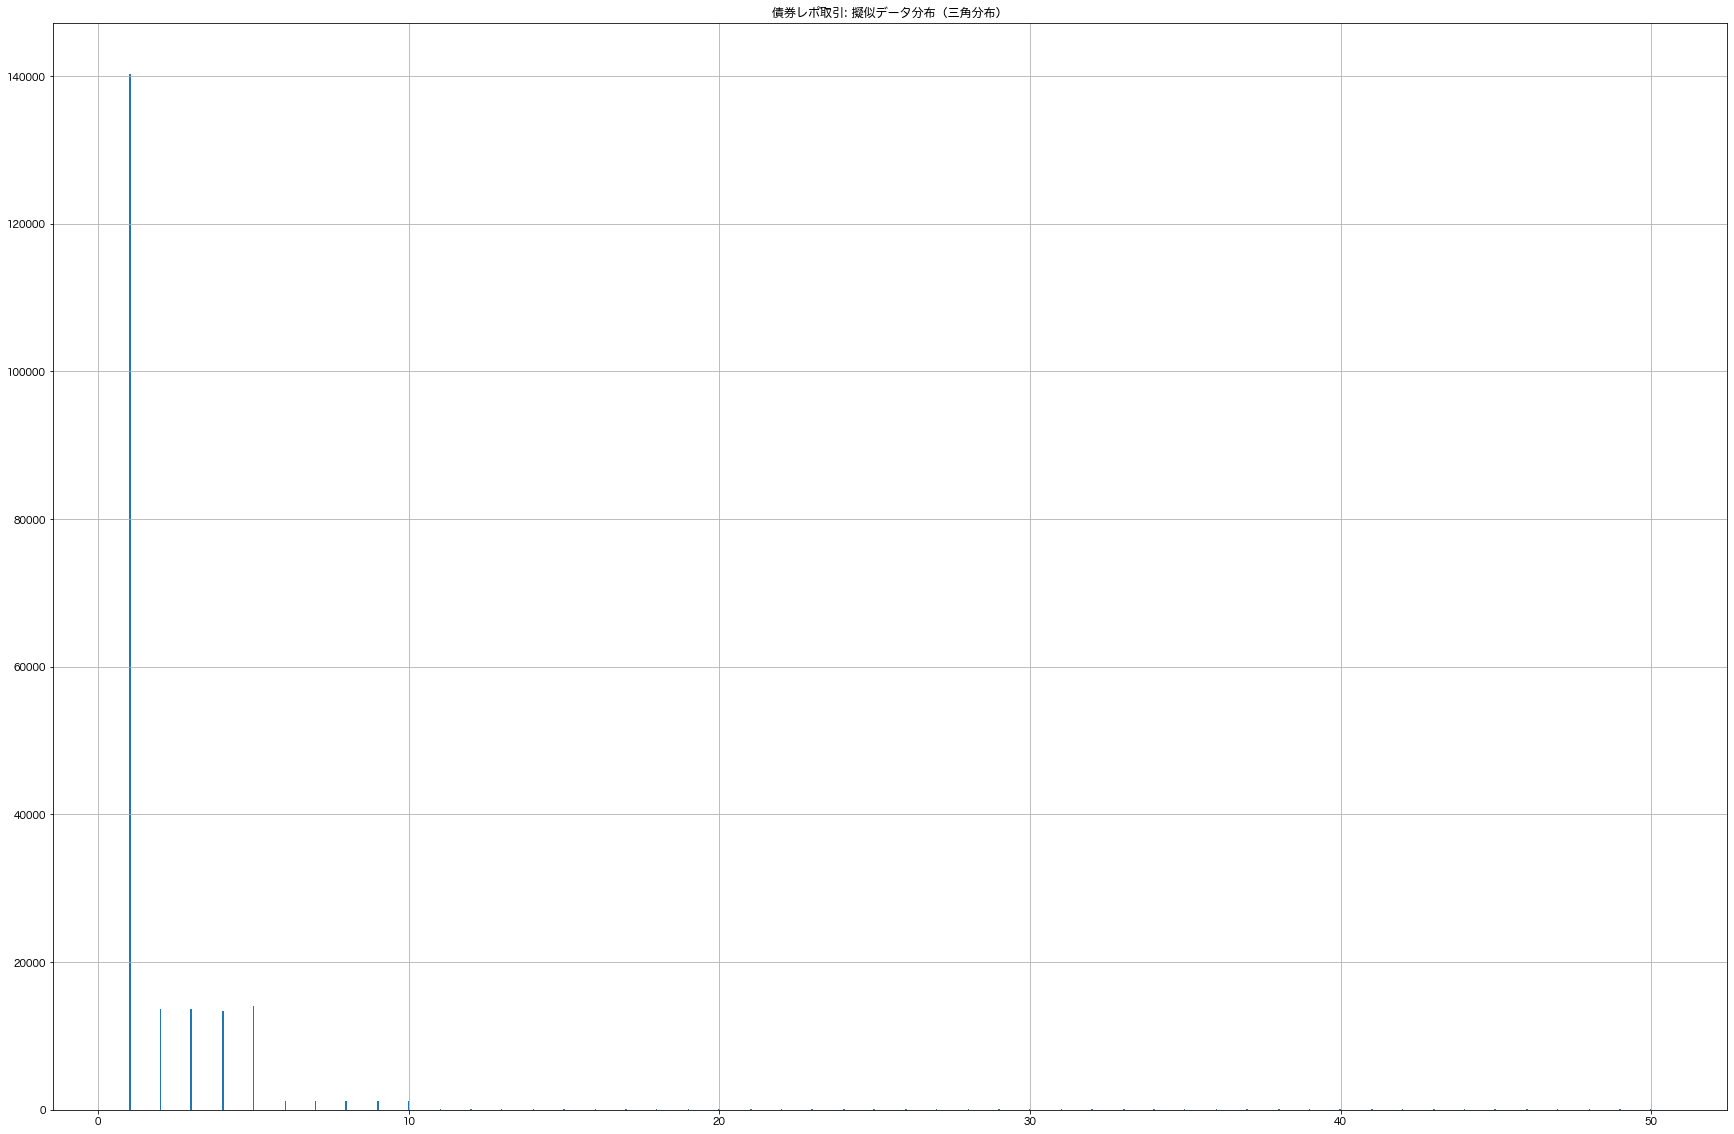

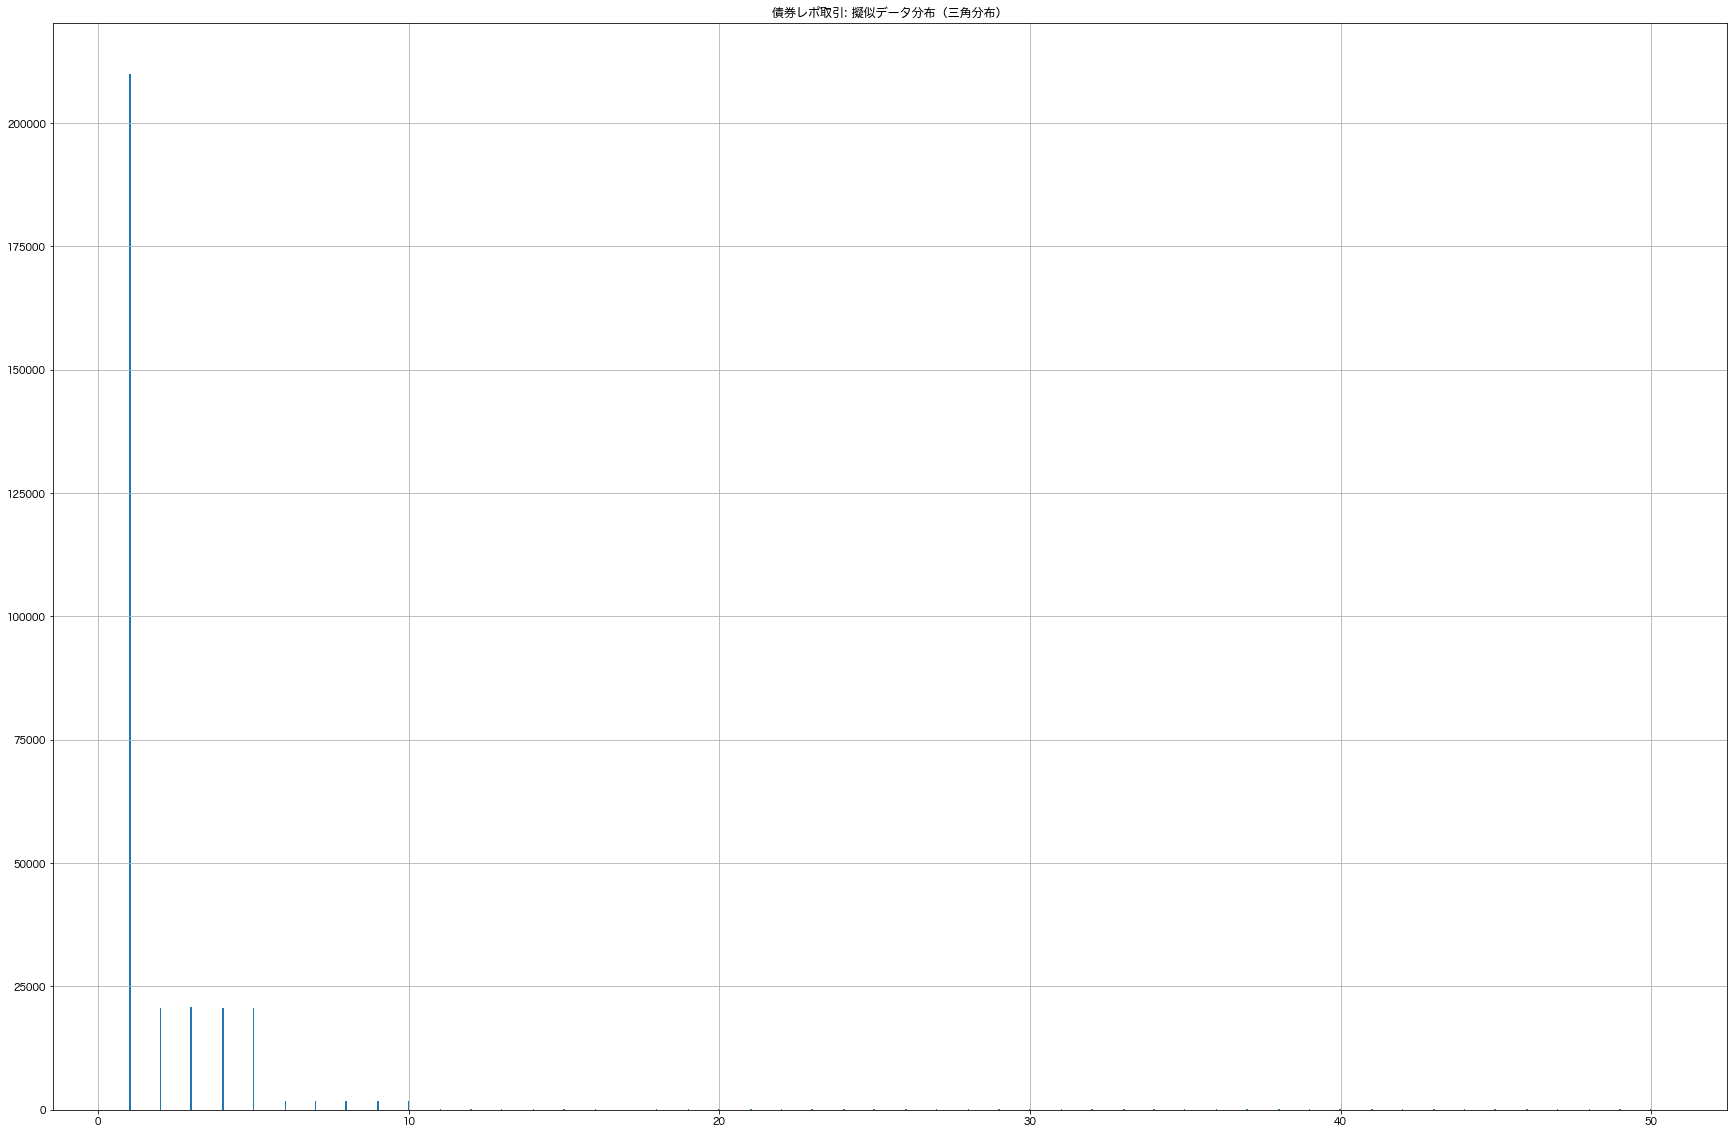

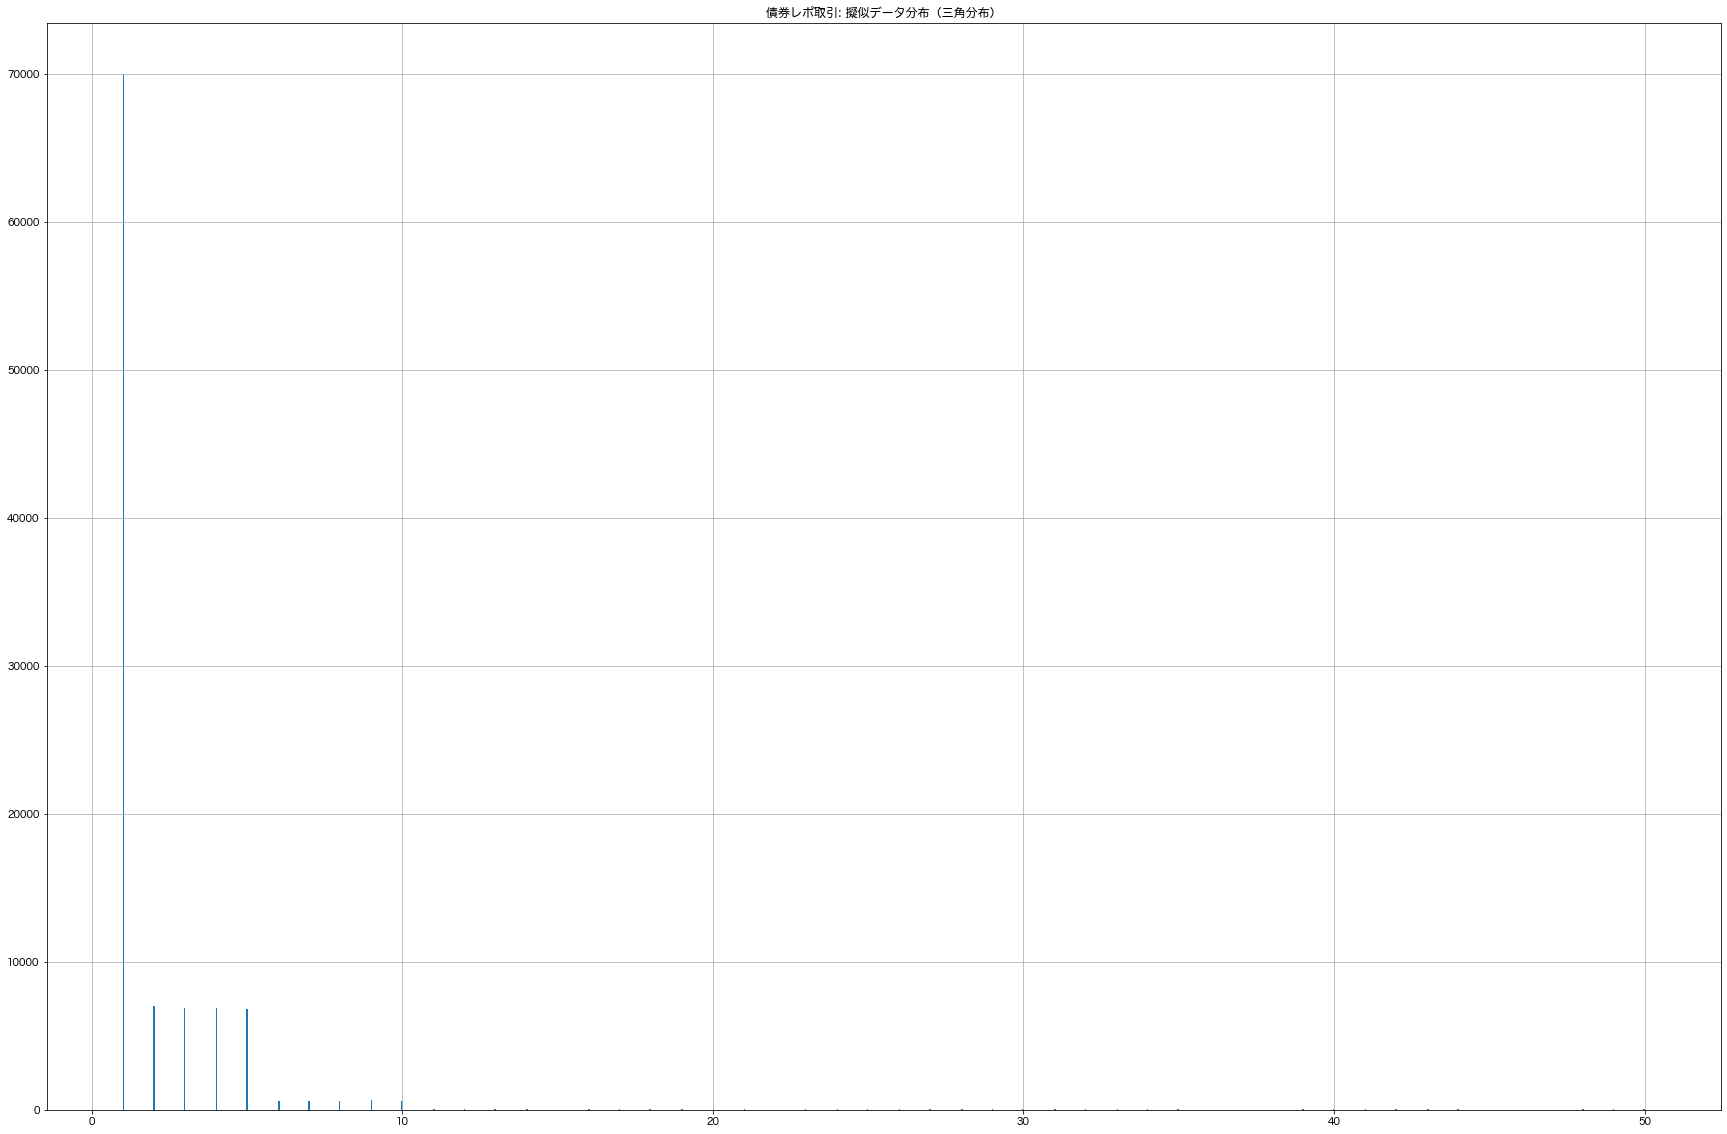

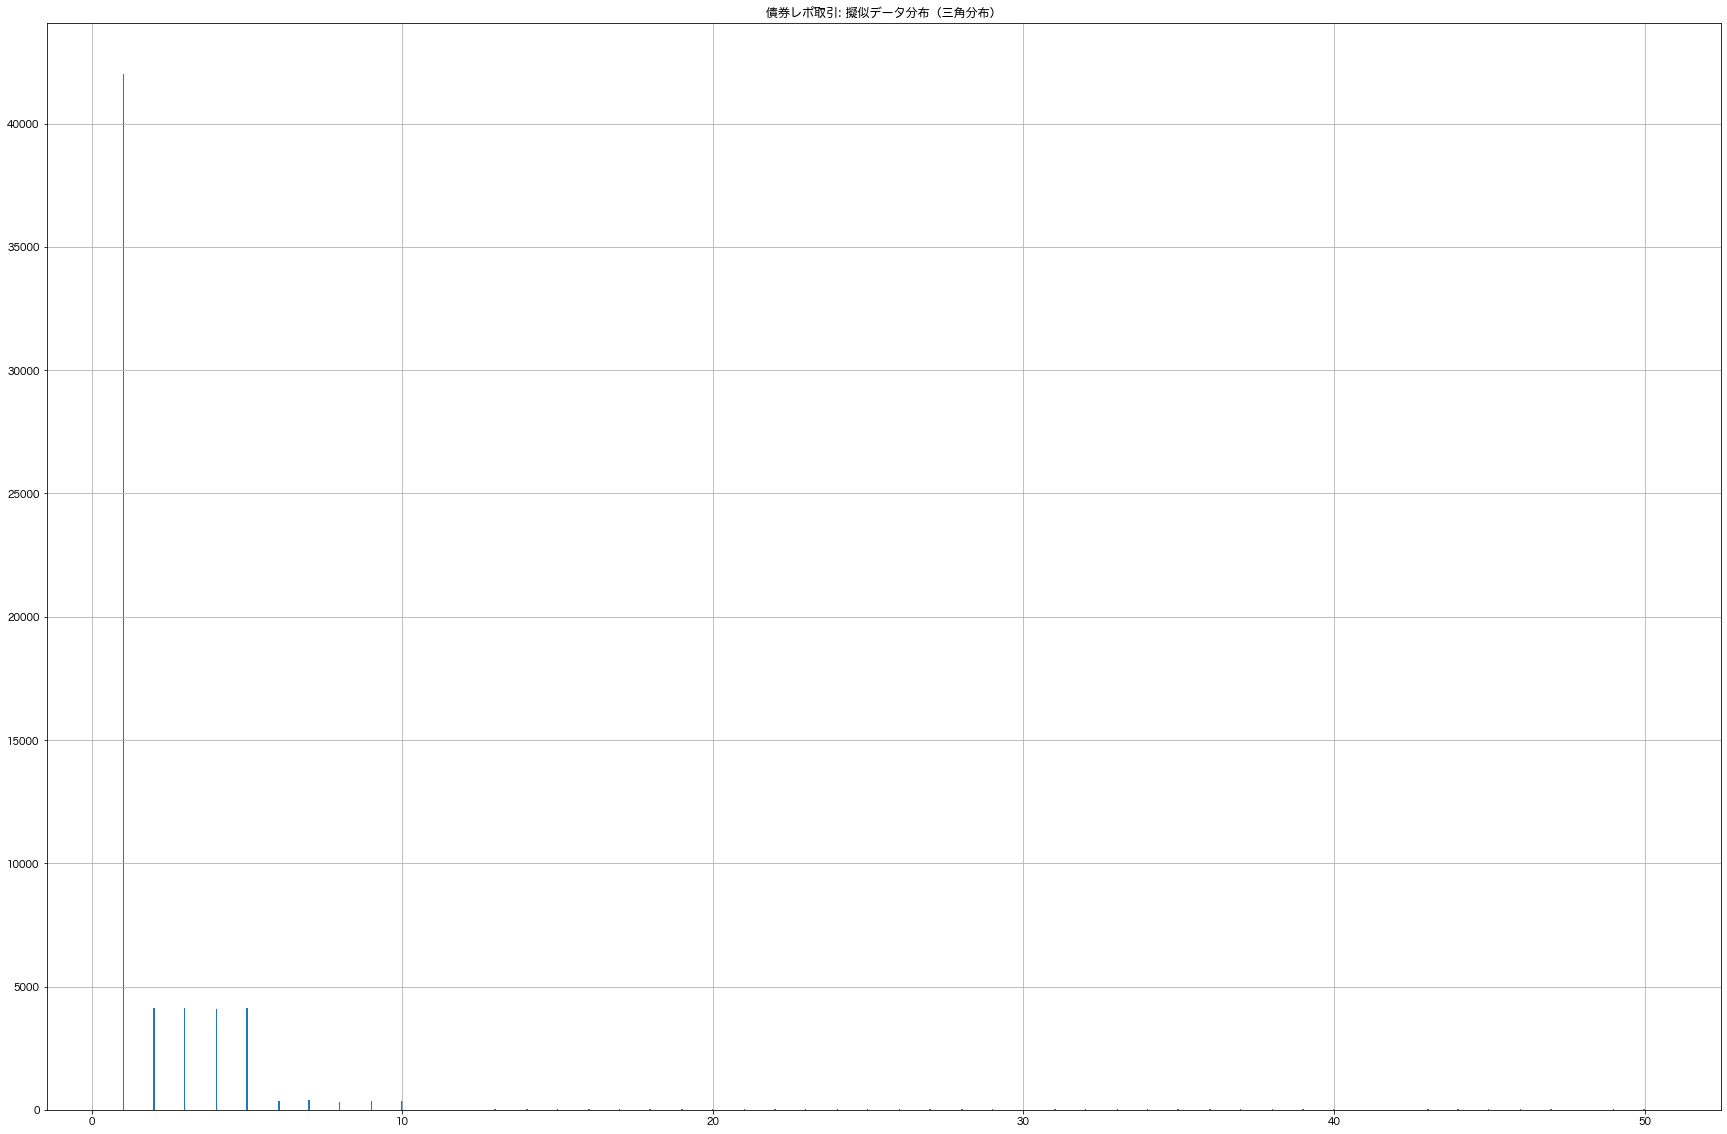

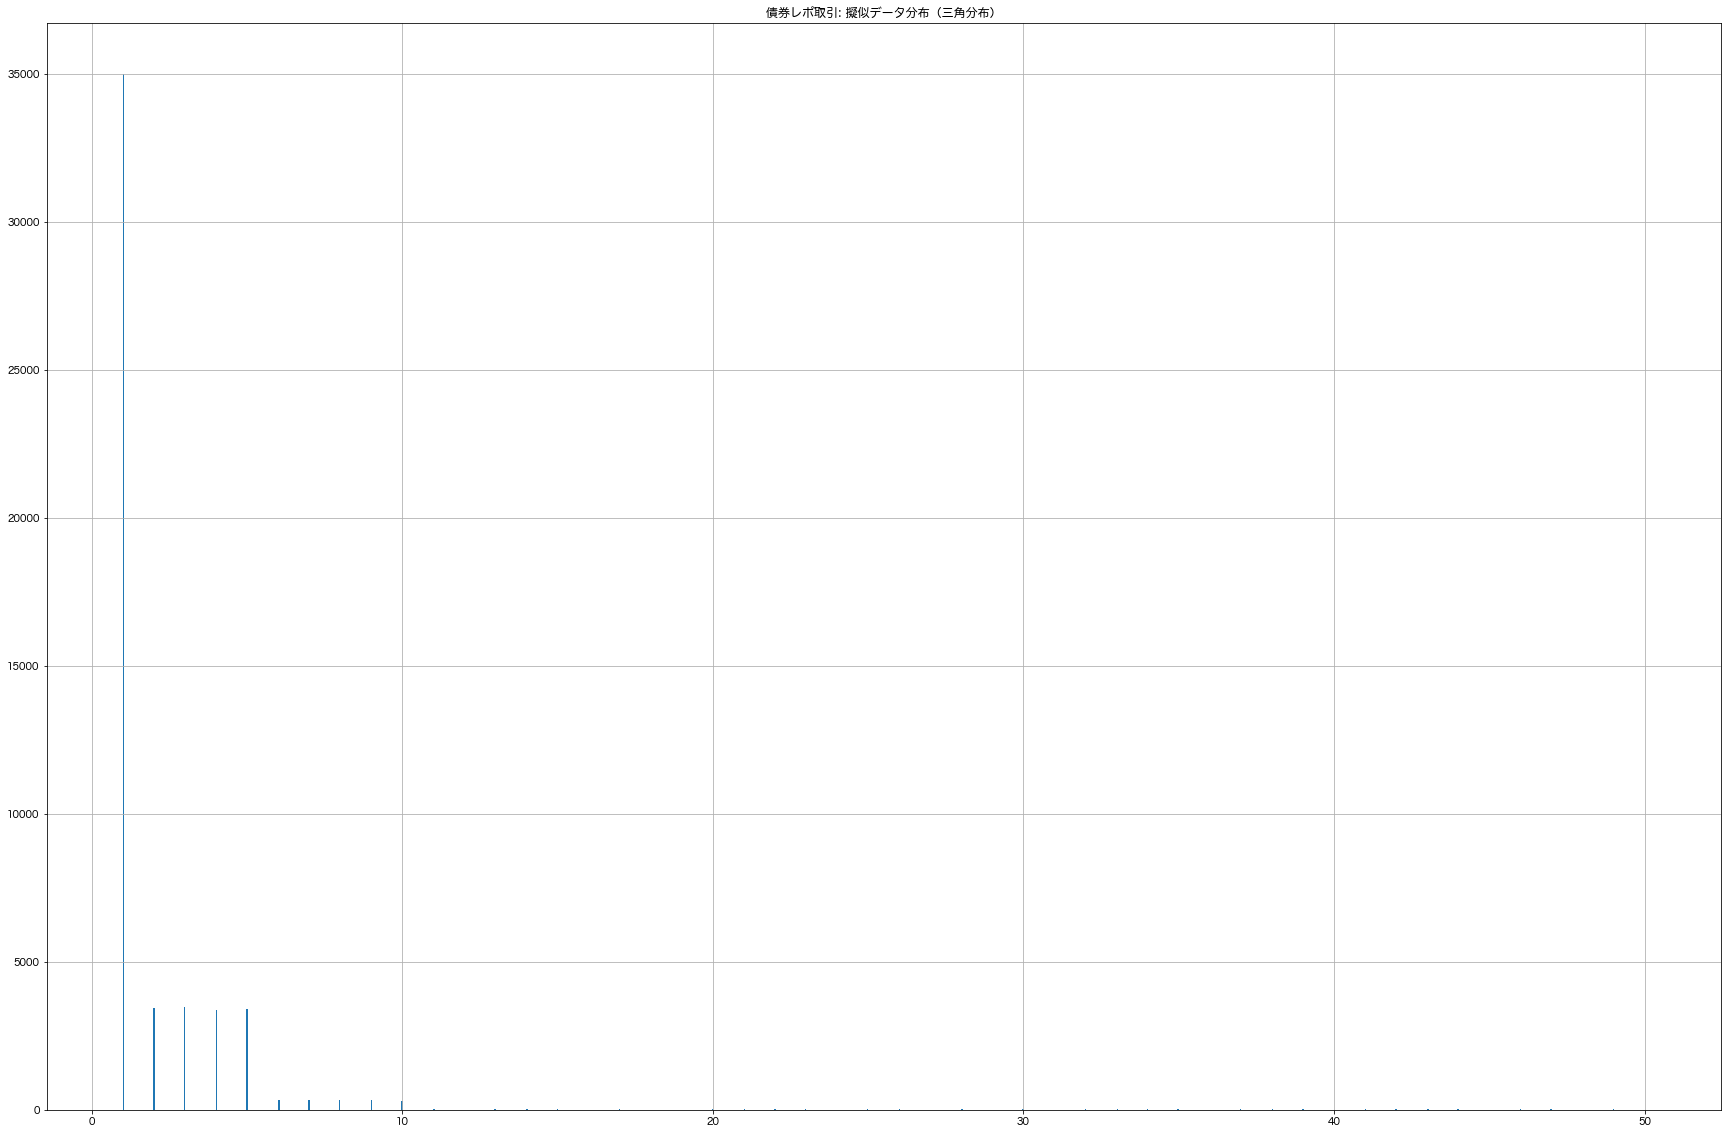

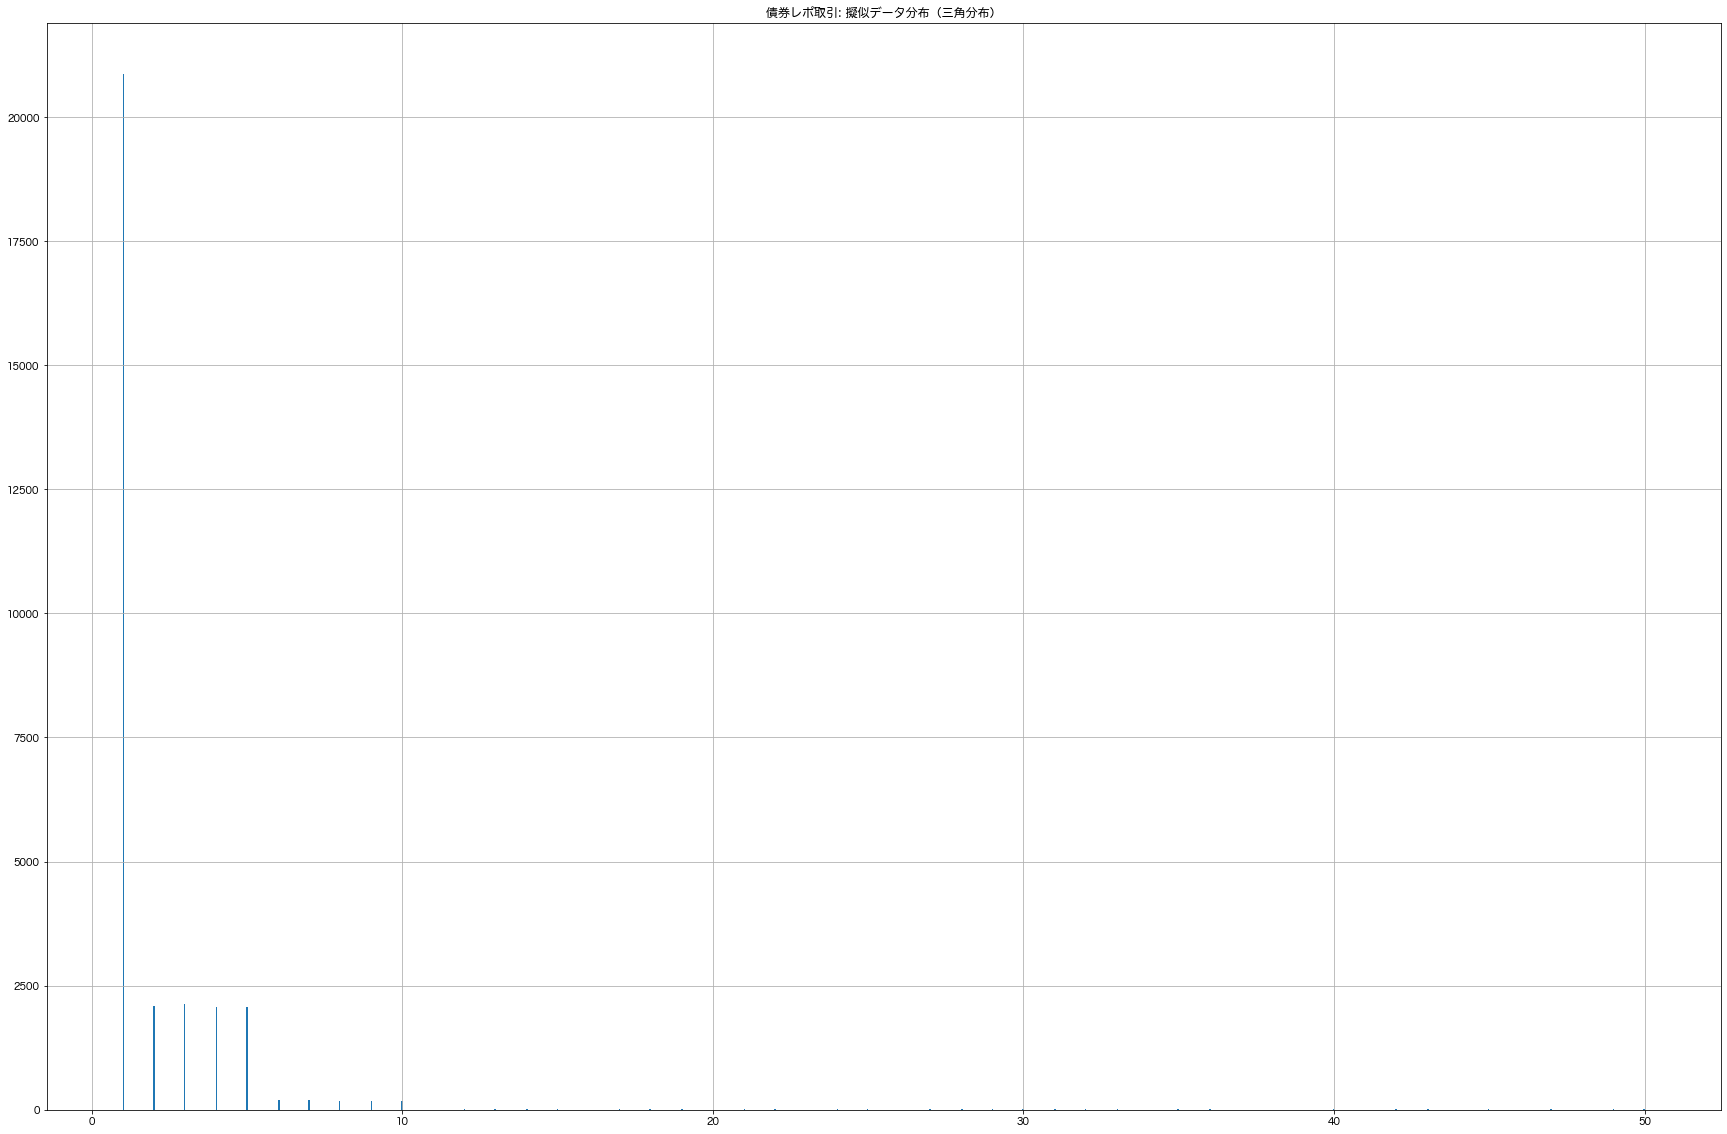

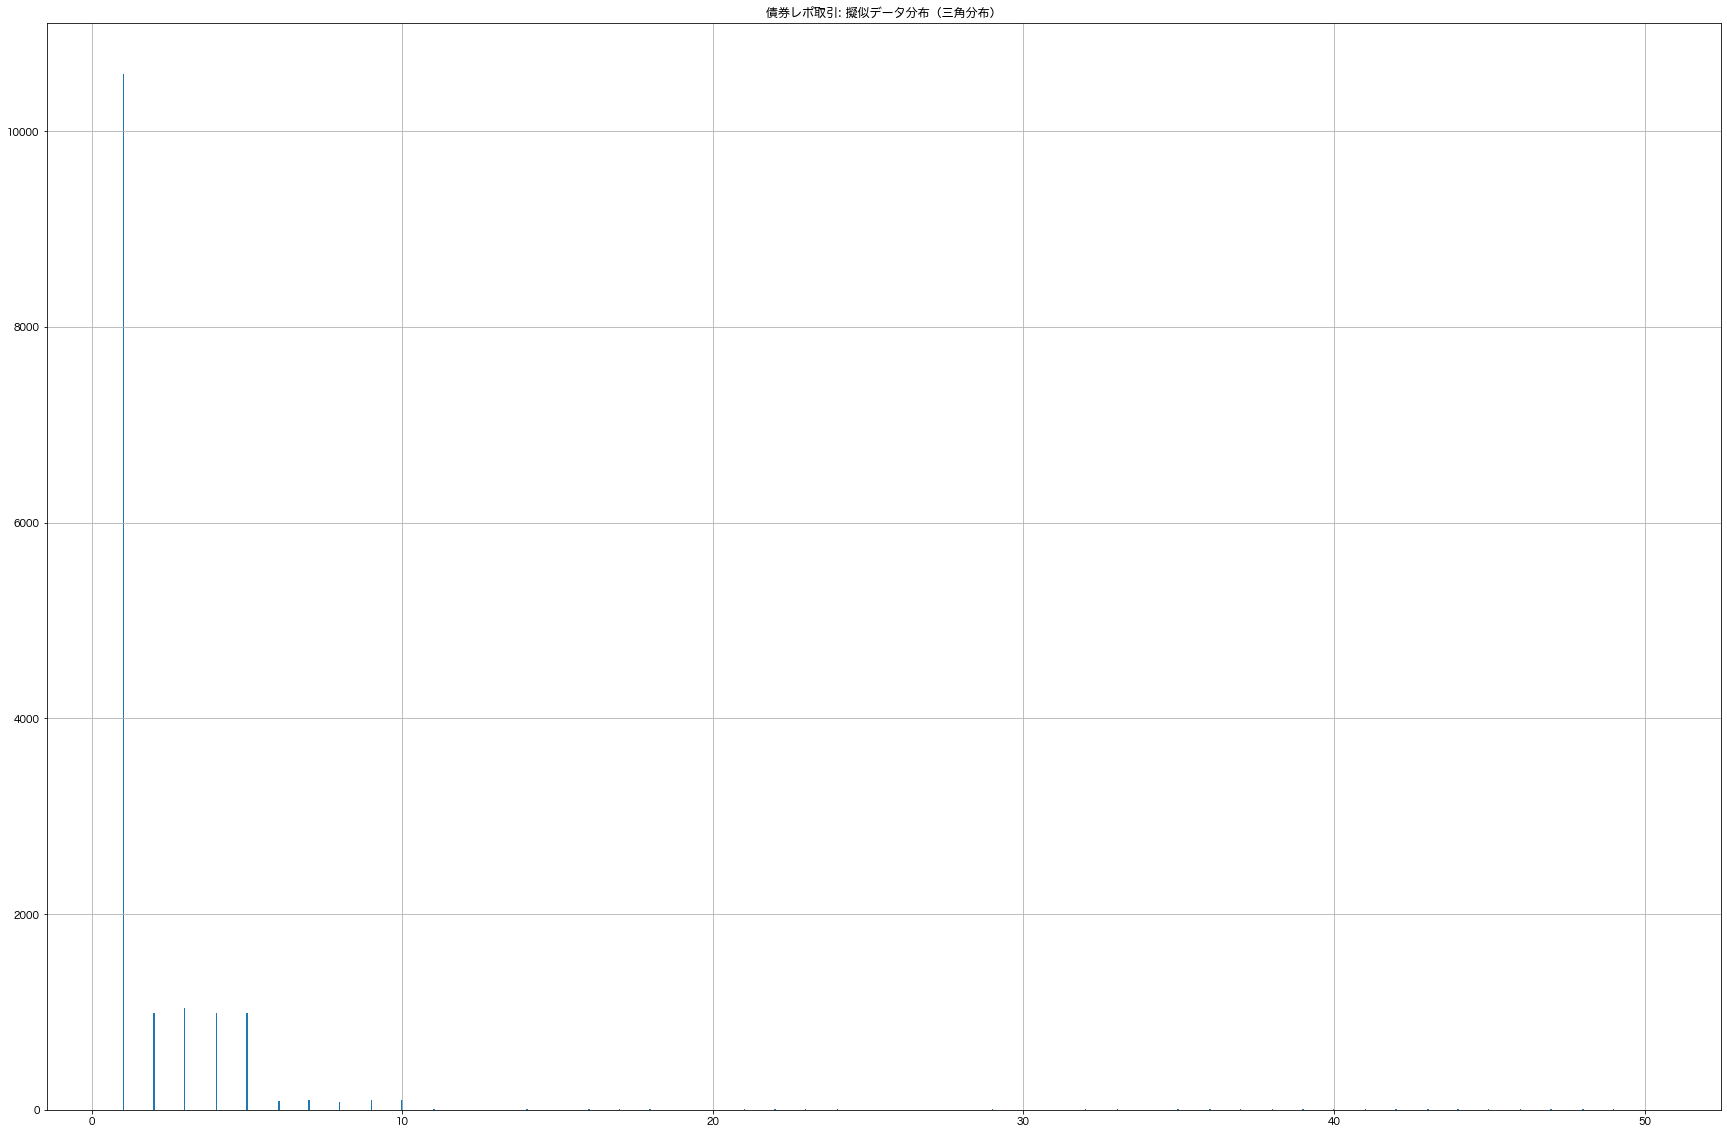

In [89]:
for _key, _value in b_trade_nums.items():
    _num = _value['bond']
    all_security_num_dfs[_key]['bond'] = get_bond_num_df(_num)
all_security_num_dfs

### 実験用CSV作成

#### 株レポ

##### createToken.csv

In [289]:
mock_gc_df = pd.DataFrame({'price': mock_gc_price_df[0], 'security_num': mock_gc_security_num_df[0]}, dtype=int)
mock_gc_df

,price,security_num
0,3305440700622336,20
1,1707084543796280,123
2,2857011356380073,125
3,5951300355394834,41
4,4908988188072279,73
...,...,...
7995,1298591344343924,115
7996,3502446189053312,8
7997,337791785654147,127
7998,7702685145472458,63


In [56]:
stock_token_num = 2800
bond_token_num = 356

print(eval(sample_create_token_df['tokenId'][0]))
hex(eval(sample_create_token_df['tokenId'][1]))

14534201717928672332366944080943963275581073313804200410876330409119688163329


'0x2022111013215200000000000000000000000000000000000000000000000002'

In [57]:
# tokenId
initial_stock_tokenId = 0x2023010917021000000000000000000000000000000000000000000000000001
stock_tokenId_list = [str(hex(initial_stock_tokenId + i)) for i in range(stock_token_num)]

initial_bond_tokenId = 0x2023010917031000000000000000000000000000000000000000000000000001
bond_tokenId_list = [str(hex(initial_bond_tokenId + i)) for i in range(bond_token_num)]

In [61]:
# tokenName
stock_tokenName_list = [f'ST0{str(i).zfill(4)}' for i in range(stock_token_num)]
bond_tokenName_list = [f'ST1{str(i).zfill(4)}' for i in range(bond_token_num)]

In [62]:
# others
tokenTypeId = sample_create_token_df['tokenTypeId'][0]
stock_tokenTypeId_list = [tokenTypeId] * stock_token_num
bond_tokenTypeId_list = [tokenTypeId] * bond_token_num
updateTime = sample_create_token_df['updateTime'][0]
stock_updateTime_list = [updateTime] * stock_token_num
bond_updateTime_list = [updateTime] * bond_token_num
token_price = 5.0e+7
stock_price_list = [token_price] * stock_token_num
bond_price_list = [token_price] * bond_token_num

In [63]:
stock_create_token_df = pd.DataFrame([stock_tokenId_list, stock_tokenName_list, stock_price_list, stock_tokenTypeId_list, stock_updateTime_list], index=sample_create_token_df.columns).T
stock_create_token_df

,tokenId,tokenName,price,tokenTypeId,updateTime
0,0x20230109170210000000000000000000000000000000...,ST00000,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
1,0x20230109170210000000000000000000000000000000...,ST00001,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2,0x20230109170210000000000000000000000000000000...,ST00002,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3,0x20230109170210000000000000000000000000000000...,ST00003,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
4,0x20230109170210000000000000000000000000000000...,ST00004,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
...,...,...,...,...,...
2795,0x20230109170210000000000000000000000000000000...,ST02795,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2796,0x20230109170210000000000000000000000000000000...,ST02796,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2797,0x20230109170210000000000000000000000000000000...,ST02797,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2798,0x20230109170210000000000000000000000000000000...,ST02798,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112


In [64]:
bond_create_token_df = pd.DataFrame([bond_tokenId_list, bond_tokenName_list, bond_price_list, bond_tokenTypeId_list, bond_updateTime_list], index=sample_create_token_df.columns).T
bond_create_token_df

,tokenId,tokenName,price,tokenTypeId,updateTime
0,0x20230109170310000000000000000000000000000000...,ST10000,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
1,0x20230109170310000000000000000000000000000000...,ST10001,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2,0x20230109170310000000000000000000000000000000...,ST10002,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3,0x20230109170310000000000000000000000000000000...,ST10003,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
4,0x20230109170310000000000000000000000000000000...,ST10004,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
...,...,...,...,...,...
351,0x20230109170310000000000000000000000000000000...,ST10351,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
352,0x20230109170310000000000000000000000000000000...,ST10352,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
353,0x20230109170310000000000000000000000000000000...,ST10353,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
354,0x20230109170310000000000000000000000000000000...,ST10354,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112


In [65]:
# JCTの行も追加する
# jct_row = pd.DataFrame({'tokenId': jct_tokenId, 'tokenName': 'JCT00000', 'price': jct_price, 'tokenTypeId': sample_create_token_df['tokenTypeId'][0], 'updateTime': sample_create_token_df['updateTime'][0]}, index=[0])

# total_create_token_df = pd.concat([jct_row, stock_create_token_df, bond_create_token_df], ignore_index=True).reset_index(drop=True)
total_create_token_df = pd.concat([stock_create_token_df, bond_create_token_df], ignore_index=True)
total_create_token_df

,tokenId,tokenName,price,tokenTypeId,updateTime
0,0x20230109170210000000000000000000000000000000...,ST00000,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
1,0x20230109170210000000000000000000000000000000...,ST00001,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2,0x20230109170210000000000000000000000000000000...,ST00002,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3,0x20230109170210000000000000000000000000000000...,ST00003,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
4,0x20230109170210000000000000000000000000000000...,ST00004,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
...,...,...,...,...,...
3151,0x20230109170310000000000000000000000000000000...,ST10351,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3152,0x20230109170310000000000000000000000000000000...,ST10352,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3153,0x20230109170310000000000000000000000000000000...,ST10353,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3154,0x20230109170310000000000000000000000000000000...,ST10354,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112


In [162]:
total_create_token_df.to_csv(f'{data_relative_path}total_create_token.csv', index=False)

##### createTrade.csv

In [68]:
a_trade_num

11938

In [151]:
# 1種類のトークンが最大取引数を取るように調整しつつ、取引ごとにランダムで銘柄をサンプリングする
def sample_with_freq_token(freq_num, token_list, token_num_list):
    if (freq_num > len(token_num_list)):
        raise ValueError('freq_num is larger than the number of trades!!')
    
    tokenIds_list = []
    freq_token_id = token_list[0]
    count = freq_num
    
    for _num in token_num_list:
        if count > 0:
            tokenIds_list.append([freq_token_id] + list(token_list[1:].sample(_num - 1)))
            count -= 1
        else:
            tokenIds_list.append(list(token_list[1:].sample(_num)))
    
    return tokenIds_list

# lenderTokenIds_list = sample_with_freq_token(b_security_nums['100%']['stock'], st_list, all_security_num_dfs['100%']['gc'][0])
# print(lenderTokenIds_list[:5])

In [183]:
def get_trade_df(trade_num, initial_tradingId,  price_df, security_num_df, create_token_df, with_freq=False, freq_num=0):
    # tradingId
    tradingId_list = [str(hex(initial_tradingId + i)) for i in range(trade_num)]

    # lenderTokenIds, lenderTokenAmounts
    st_list = create_token_df['tokenId']
    lenderTokenIds_list = sample_with_freq_token(freq_num, st_list, security_num_df[0]) if with_freq else [list(st_list[1:].sample(security_num)) for security_num in security_num_df[0]]
    lenderTokenAmounts_list = []
    lender_token_total_price_list = []
    for i in range(trade_num):
        each_num = int(math.ceil((price_df[0][i] / token_price ) / security_num_df[0][i]))
        lenderTokenAmounts_list.append([each_num] * security_num_df[0][i])
        lender_token_total_price_list.append(each_num * security_num_df[0][i] * token_price)

    # borrowerTokenAmounts
    borrowerTokenAmounts_list = [[math.ceil(lender_total_price / jct_price)] for lender_total_price in lender_token_total_price_list]
    
    # others
    lender_list = [sample_create_trading_df['lender'][0]] * trade_num
    borrowerTokenIds_list = [sample_create_trading_df['borrowerTokenIds'][0]] * trade_num
    startTime_list = [sample_create_trading_df['startTime'][0]] * trade_num
    finishTime_list = [sample_create_trading_df['finishTime'][0]] * trade_num
    rate_list = [sample_create_trading_df['rate'][0]] * trade_num
    adjustmentToken_list = [sample_create_trading_df['adjustmentToken'][0]] * trade_num
    return pd.DataFrame([tradingId_list, lender_list, borrowerTokenIds_list, lenderTokenIds_list, borrowerTokenAmounts_list, lenderTokenAmounts_list, startTime_list, finishTime_list, rate_list, adjustmentToken_list], index=sample_create_trading_df.columns).T

In [153]:
ex_01 = get_trade_df(b_trade_nums['100%']['gc'], 0x2023010917115000000000000000000000000000000000000000000000000001, all_price_dfs['100%']['gc'], all_security_num_dfs['100%']['gc'], stock_create_token_df, True, 1700)
ex_01

,tradingId,lender,borrowerTokenIds,lenderTokenIds,borrowerTokenAmounts,lenderTokenAmounts,startTime,finishTime,rate,adjustmentToken
0,0x20230109171150000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[47721636000],"[1325601, 1325601, 1325601, 1325601, 1325601, ...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
1,0x20230109171150000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[72395272500],"[1524111, 1524111, 1524111, 1524111, 1524111, ...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
2,0x20230109171150000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[34412308000],"[1229011, 1229011, 1229011, 1229011, 1229011, ...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
3,0x20230109171150000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[78430465000],"[1465990, 1465990, 1465990, 1465990, 1465990, ...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
4,0x20230109171150000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[30227334000],"[362004, 362004, 362004, 362004, 362004, 36200...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
...,...,...,...,...,...,...,...,...,...,...
6193,0x20230109171150000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[52197493500],"[1831491, 1831491, 1831491, 1831491, 1831491, ...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
6194,0x20230109171150000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[15020405000],"[1035890, 1035890, 1035890, 1035890, 1035890, ...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
6195,0x20230109171150000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[28971663000],"[1379603, 1379603, 1379603, 1379603, 1379603, ...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
6196,0x20230109171150000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[19918251000],"[485811, 485811, 485811, 485811, 485811, 48581...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...


In [188]:
# trade_num毎に各種create_trade_dfを作成し結合、csv形式で出力
initial_tradingIds = {
    'gc': 0x2023010918240000000000000000000000000000000000000000000000000001,
    'sc': 0x2023010918241000000000000000000000000000000000000000000000000001,
    'bond': 0x2023010918242000000000000000000000000000000000000000000000000001,
}

results = {}
    
for _percent, _obj in b_trade_nums.items():
    print(f'{_percent} starts:')
    file_name = f'{data_relative_path}create_trade_{_percent}.csv'
    create_trade_df_list = []
    for _type, _num in _obj.items():
        _initial_tradingId = initial_tradingIds[_type]
        _create_token_df = stock_create_token_df if _type in ['gc', 'sc'] else bond_create_token_df
        _security_category = 'stock' if _type in ['gc', 'sc'] else 'bond'
        _with_freq = _type in ['gc', 'bond']
        %time _create_trade_df = get_trade_df(_num, _initial_tradingId, all_price_dfs[_percent][_type], all_security_num_dfs[_percent][_type], _create_token_df, _with_freq, b_security_nums[_percent][_security_category])
        create_trade_df_list.append(_create_trade_df)
    all_create_trades_df = pd.concat(create_trade_df_list, ignore_index=True)
    results[_percent] = all_create_trades_df
    all_create_trades_df.to_csv(file_name, index=False)
    print(f'{_percent} finished!')

100% starts:
CPU times: user 644 ms, sys: 10.6 ms, total: 654 ms
Wall time: 652 ms
CPU times: user 4.08 s, sys: 94.9 ms, total: 4.17 s
Wall time: 4.18 s
CPU times: user 13.4 s, sys: 81.8 ms, total: 13.5 s
Wall time: 13.5 s
100% finished!
150% starts:
CPU times: user 925 ms, sys: 2.93 ms, total: 928 ms
Wall time: 928 ms
CPU times: user 5.96 s, sys: 15.3 ms, total: 5.97 s
Wall time: 5.97 s
CPU times: user 20.1 s, sys: 121 ms, total: 20.2 s
Wall time: 20.2 s
150% finished!
50% starts:
CPU times: user 345 ms, sys: 4.02 ms, total: 349 ms
Wall time: 353 ms
CPU times: user 2.01 s, sys: 8.46 ms, total: 2.02 s
Wall time: 2.02 s
CPU times: user 6.67 s, sys: 32 ms, total: 6.7 s
Wall time: 6.76 s
50% finished!
30% starts:
CPU times: user 188 ms, sys: 1.13 ms, total: 189 ms
Wall time: 189 ms
CPU times: user 1.16 s, sys: 3.12 ms, total: 1.17 s
Wall time: 1.17 s
CPU times: user 4.34 s, sys: 39.6 ms, total: 4.38 s
Wall time: 4.39 s
30% finished!
25% starts:
CPU times: user 162 ms, sys: 1.25 ms, total:

In [202]:
ex3 = results['150%']['lenderTokenIds']
fl_list = []
for _list in ex3:
    fl_list.extend(_list)
print(pd.Series(fl_list).describe())
top = pd.Series(fl_list).describe()['top']
print('=======')
print('top: ', top)
fl_list = list(filter(lambda x: x != top, fl_list))
pd.Series(fl_list).describe()

count                                               1721063
unique                                                 3156
top       0x20230109170310000000000000000000000000000000...
freq                                                   7530
dtype: object
top:  0x2023010917031000000000000000000000000000000000000000000000000001


count                                               1713533
unique                                                 3155
top       0x20230109170210000000000000000000000000000000...
freq                                                   2637
dtype: object

In [186]:
ex02 = create_trade_df_list[0]
fl_list = []
for _list in ex02['lenderTokenIds']:
    fl_list.extend(_list)
fl_list = [_v for _v in fl_list]
fl_list
pd.Series(fl_list).describe()

count                                                 34010
unique                                                 2800
top       0x20230109170210000000000000000000000000000000...
freq                                                    132
dtype: object

In [178]:
b_security_nums

{'100%': {'stock': 1758, 'bond': 5020},
 '150%': {'stock': 2637, 'bond': 7530},
 '50%': {'stock': 879, 'bond': 2510},
 '30%': {'stock': 528, 'bond': 1506},
 '25%': {'stock': 440, 'bond': 1255},
 '15%': {'stock': 264, 'bond': 753},
 '7.5%': {'stock': 132, 'bond': 377}}

In [207]:
results['7.5%'][:a_trade_num].to_csv(f'{data_relative_path}create_trade_A.csv', index=False)

##### updateToken

In [165]:
sample_update_token_df

,tokenId,price,updateTime
0,0x20221110132152000000000000000000000000000000...,9000000,1668054263
1,0x20221110132152000000000000000000000000000000...,9000000,1668054263
2,0x20221110132152000000000000000000000000000000...,9000000,1668054263
3,0x20221110132152000000000000000000000000000000...,9000000,1668054263
4,0x20221110132152000000000000000000000000000000...,9000000,1668054263
...,...,...,...
351,0x20221110132152000000000000000000000000000000...,9000000,1668054263
352,0x20221110132152000000000000000000000000000000...,9000000,1668054263
353,0x20221110132152000000000000000000000000000000...,9000000,1668054263
354,0x20221110132152000000000000000000000000000000...,9000000,1668054263


In [209]:
total_update_token_df = total_create_token_df.copy()
total_update_token_df = total_update_token_df.drop(labels=['tokenName', 'tokenTypeId'], axis=1)
total_update_token_df

,tokenId,price,updateTime
0,0x20230109170210000000000000000000000000000000...,50000000.0,1668054112
1,0x20230109170210000000000000000000000000000000...,50000000.0,1668054112
2,0x20230109170210000000000000000000000000000000...,50000000.0,1668054112
3,0x20230109170210000000000000000000000000000000...,50000000.0,1668054112
4,0x20230109170210000000000000000000000000000000...,50000000.0,1668054112
...,...,...,...
3151,0x20230109170310000000000000000000000000000000...,50000000.0,1668054112
3152,0x20230109170310000000000000000000000000000000...,50000000.0,1668054112
3153,0x20230109170310000000000000000000000000000000...,50000000.0,1668054112
3154,0x20230109170310000000000000000000000000000000...,50000000.0,1668054112


In [210]:
# 日々の価格変化率をランダムで割り当てる
min_daily_change = -0.12
max_daily_change = 0.15
price_change_list = []
for i in range(stock_token_num + bond_token_num):
    price_change_list.append(1 + min_daily_change + np.random.rand() * (max_daily_change - min_daily_change))
price_change_list

[1.0105838006283046,
 1.093200150228183,
 1.0623871260321998,
 0.9183565771154909,
 0.9932651226944892,
 0.9189347917583581,
 0.9412054252854666,
 1.1351912137975337,
 1.097095718074033,
 0.9909858989532538,
 0.9387252447663865,
 0.9493305375445774,
 1.012442893024711,
 1.0050905186984798,
 0.9170285704408236,
 1.1125847333404233,
 1.058180374852674,
 0.909584673595971,
 1.071694236716492,
 0.9836645259964589,
 1.0224084549335015,
 1.1088969306254766,
 0.9050948511510124,
 1.1467664782231815,
 1.0114630046599171,
 1.0891241603221609,
 1.1412734969952572,
 0.9426745569473133,
 1.0752953992765681,
 1.0469877210958625,
 1.105064233561167,
 1.121151764589243,
 1.142878332030813,
 0.9758639341575888,
 1.0876460639579117,
 1.0197172811504607,
 1.089560528347405,
 1.0612213679943776,
 1.1171285728438403,
 1.0773309411112921,
 0.9353157109430871,
 0.8928728197399509,
 0.9404860842155444,
 1.0433183890408044,
 1.1004688064246009,
 1.0251975362383012,
 0.9640329233468113,
 0.914296164916716,
 0.

In [211]:
new_price_list = total_update_token_df['price'] * price_change_list
total_update_token_df['price'] = new_price_list.astype('int')

In [212]:
total_update_token_df

,tokenId,price,updateTime
0,0x20230109170210000000000000000000000000000000...,50529190,1668054112
1,0x20230109170210000000000000000000000000000000...,54660007,1668054112
2,0x20230109170210000000000000000000000000000000...,53119356,1668054112
3,0x20230109170210000000000000000000000000000000...,45917828,1668054112
4,0x20230109170210000000000000000000000000000000...,49663256,1668054112
...,...,...,...
3151,0x20230109170310000000000000000000000000000000...,47617214,1668054112
3152,0x20230109170310000000000000000000000000000000...,48352280,1668054112
3153,0x20230109170310000000000000000000000000000000...,56237489,1668054112
3154,0x20230109170310000000000000000000000000000000...,47322902,1668054112


In [213]:
total_update_token_df.to_csv(f'{data_relative_path}total_update_token.csv', index=False)

## 相談事項

- ### 分布


- ### 銘柄種類


- ### 取引種類の統合


- ### price, update

## その他